# Notes

This notebook investigates whether we can learn about the DM accumulated from each subhalo traversed along each pipe.

It uses code based on:

/u/cwalker/Illustris_Zhang_Method/Paper_Plots_Impact_Factor_Analysis.ipynb
/u/cwalker/Illustris_Zhang_Method/Paper_Plots_Subhalo_Impact_Factor_Tracing.ipynb

And data, stored at:

/u/cwalker/Illustris_Zhang_Method/Impact_Factor_Analysis_Output

And stores output DM, ID and impact factor data at:

/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/

These data will be plotted with:

/u/cwalker/Illustris_Zhang_Method/Paper_Plots_IF_vs_DM.ipynb

NOTE: it is important that to be aware of when the DMs I calculate and plot are PHYSICAL or COMOVING.

# Imports

In [1]:
import os
import numpy as np
import illustris_python as il
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from astropy.cosmology import Planck15 as cosmosource
from astropy import constants as c
from astropy import units as u


# Functions

In [2]:
def TNG_Dens2SI_astropy(dens):
    """
    Like TNG_Dens2SI but does not strip result of units.
    Developed in raven:/u/cwalker/Illustris_FRB_Project/yt-artale-constants.ipynb


    INPUTSRETURNS:

    dens : [values] densities from TNG

    RETURNS:

    dens converted to SI units
    """

    return dens*1E10*c.M_sun.to('kg')/cosmosource.h/(c.kpc.to('m')/cosmosource.h)**3

def sortbyname(item):
    """
    Function to sort the subhaloID data files with names of the format:
    
    sim_TNG300-1_snap_99_pipe_0_true_shID_list.npy
    
    which were created by:
    
    numerically. Code adapted from: 
    
    https://stackoverflow.com/questions/65147113/python-sort-file-list
    
    """
    
    a = int(item.split('_')[5]) #split on the underscores and extract the pipe number
    
    return a

# Begin

## Initialise

In [3]:
#choose simulation to process
sim_to_process = 'TNG300-1'

#number of pipes which were created
npipes = 5125

#choose snapshots to process
snaps_to_process = [99]

#simulation data path
basePath = '/virgotng/universe/IllustrisTNG/{0}/output/'.format(sim_to_process)

#pipe data location
pipe_data_loc = '/ptmp/cwalker/Illustris_FRB_Project/Zhang_backups/pipes/{0}_WHIM_backup_new/'.format(sim_to_process)

#subhalo id list data locations

shID_lists_loc = '/u/cwalker/Illustris_Zhang_Method/SpeedTempTest/'

## Load a pipe (note: contains incorrect subhalo ID information)

In [18]:
#loop over snapshots
for i in range(len(snaps_to_process)):
    
    #get snapshot number
    snap_number = snaps_to_process[i]
    
    #pipe data file name
    pipe_data_file = 'Sim_{0}_Snap_{1}_dDMdz_Output_SpeedTempTest.npy'.format(sim_to_process,snap_number)
    
    #load all pipe data
    pipe_data = np.load(pipe_data_loc+pipe_data_file,allow_pickle=True).tolist()
    

#choose a pipe number to test
testpipenumber = 3#4

print('Snapshot: {0}'.format(snap_number))
print('Pipe data file: {0}'.format(pipe_data_file))
print('Pipe data keys: {0}'.format(pipe_data.keys()))
print('Number of pipes: {0}'.format(len(pipe_data['dDMdz_Pakmor'])))
print('total DM of test pipe (pakmor): {0}'.format(pipe_data['dDMdz_Pakmor'][testpipenumber]))
print('total DM of test pipe (zhang): {0}'.format(pipe_data['dDMdz_Zhang'][testpipenumber]))
print('Densities in test pipe: {0}'.format(len(pipe_data['LoSDensities'][testpipenumber])))
print('Electron Abundances in test pipe: {0}'.format(len(pipe_data['LoSElAbs'][testpipenumber])))
print('Internal Energies in the test pipe: {0}'.format(len(pipe_data['LoSInternalEnergies'][testpipenumber])))
print('NOTE: With densities, electron abundances, and internal energies, we have everything we need to recalculate DM')
print('Unique particle IDs in test pipe: {0}'.format(len(pipe_data['LoSPartIDs'][testpipenumber])))
print('NOTE: With particle IDs and matchlists, we can recreate the true subhaloIDs for the pipes as a check if we like')

Snapshot: 99
Pipe data file: Sim_TNG300-1_Snap_99_dDMdz_Output_SpeedTempTest.npy
Pipe data keys: dict_keys(['dDMdz_Zhang', 'dDMdzHalo_Zhang', 'dDMdzFilament_Zhang', 'dDMdzVoid_Zhang', 'nHalo_Zhang', 'nFilament_Zhang', 'nVoid_Zhang', 'dDMdz_Pakmor', 'dDMdzHalo_Pakmor', 'dDMdzFilament_Pakmor', 'dDMdzVoid_Pakmor', 'nHalo_Pakmor', 'nFilament_Pakmor', 'nVoid_Pakmor', 'firstShID', 'uniqueShIDs', 'closestCoords', 'LoSBinCoords', 'LoSCellCoords', 'LoSDensities', 'LoSInternalEnergies', 'LoSElAbs', 'LoSPartIDs'])
Number of pipes: 5125
total DM of test pipe (pakmor): 973.6060104556386
total DM of test pipe (zhang): 973.6060105260688
Densities in test pipe: 10000
Electron Abundances in test pipe: 10000
Internal Energies in the test pipe: 10000
NOTE: With densities, electron abundances, and internal energies, we have everything we need to recalculate DM
Unique particle IDs in test pipe: 10000
NOTE: With particle IDs and matchlists, we can recreate the true subhaloIDs for the pipes as a check if we 

## Load the correct subhalo IDs traversed by this pipe

In [34]:
#load subhalo ID files list
shID_file_loc = './SpeedTempTest/'
files = os.listdir(shID_file_loc)

#extract subhalo id files for the chosen snapshot
shID_files_snap = [i for i in files if 'snap_{0}_'.format(snap_number) in i]
print(len(shID_files_snap))
shID_files_snap = [i for i in shID_files_snap if 'true' in i]

#sort the subhalo id files into numerical ascending order based on pipe number
shID_files_snap.sort(key=sortbyname)
#print(shID_files_snap)

#extract particle id files for the chosen snapshot


#load the data for test snapshot
true_shData = np.load(shID_file_loc+shID_files_snap[testpipenumber])


print('Number of pipe subhalo ID files: {0}'.format(len(shID_files_snap)))
print('Subhalo IDs in test pipe: {0}'.format(len(true_shData)))
print('NOTE: these subhalo IDs should correspond to the pipe particle IDs, but could check this if we liked by recreating them')

5125
Number of pipe subhalo ID files: 5125
Subhalo IDs in test pipe: 10000
NOTE: these subhalo IDs should correspond to the pipe particle IDs, but could check this if we liked by recreating them


## Test: reproducing pipe ddmdz

In [26]:

#choose snapshot of pipe to test
#snap_number = 99

#load header of snapshot to extract redshift
header = il.groupcat.loadHeader(basePath,snap_number)
print('Header for snap = {0}'.format(header))

#Define the hydrogen mass fraction for dDM/dz calculations
hmassfrac = 3./4.

#Define the mass of a proton for dDM/dz calculations
protonmass = c.m_p.to('kg')

#get electron electron abundances (note: pakmor correction was already applied)
pipe_nearest_elab_p = pipe_data['LoSElAbs'][testpipenumber]

#only use relevant cells (those closest to the line of sight)
#pipe_nearest_elab_p   = np.array(pipe_cell_elab_p[nearest_idxs_p])   

#convert densities from TNG to SI units
pipe_nearest_dens_p_si = TNG_Dens2SI_astropy(pipe_data['LoSDensities'][testpipenumber])

#calculate the proper, or comoving electron density for each cell
pipe_nearest_pne_p = (pipe_nearest_elab_p)*hmassfrac*(pipe_nearest_dens_p_si/protonmass)*((1+header['Redshift'])**3)

#get the mean electron density for the whole pipe
pipe_average_pne_p = np.mean(pipe_nearest_pne_p)
edens_p = pipe_average_pne_p

#calculate parts of ddmdz
outer=c.c/cosmosource.H(0)
Ez = np.sqrt((0.3089*((1+header['Redshift'])**(3)))+(0.6911))
denominator = ((1+header['Redshift'])**(2))*Ez

#calculate ddmdz
ddmdz_p = outer*edens_p/denominator

#convert ddmdz to pc/cc
ddmdz_p = ddmdz_p.to('pc*cm**(-3)').value

print('Test if calculated value == stored value: {0}'.format(ddmdz_p==pipe_data['dDMdz_Pakmor'][testpipenumber]))

Header for snap = {'BoxSize': 205000.0, 'FlagDoubleprecision': 0, 'Git_commit': b'd203ec8b07c7e2bdda5f608aa0babea46d603699', 'Git_date': b'Thu Apr 7 14:14:27 2016 +0200', 'HubbleParam': 0.6774, 'Ngroups_ThisFile': 1, 'Ngroups_Total': 17625892, 'Nids_ThisFile': 20541399, 'Nids_Total': 12766437906, 'Nsubgroups_ThisFile': 11748, 'Nsubgroups_Total': 14485709, 'NumFiles': 600, 'Omega0': 0.3089, 'OmegaLambda': 0.6911, 'Redshift': 2.220446049250313e-16, 'Time': 0.9999999999999998}
Test if calculated value == stored value: True


## Test: creating a ddmdz for each unique subhalo ID

In [46]:
############
#initialise#
############
print('For test pipe number: {0}'.format(testpipenumber))
#load header of snapshot to extract redshift
header = il.groupcat.loadHeader(basePath,snap_number)
print('Which is at redshift = {0:.2f}'.format(header['Redshift']))


#Define the hydrogen mass fraction for dDM/dz calculations
hmassfrac = 3./4.

#Define the mass of a proton for dDM/dz calculations
protonmass = c.m_p.to('kg')

#get each unique subhalo ID in the line of sight
unique_shIDs = np.unique(true_shData).astype(int)
print('And passes through the unique subhalo IDs: {0}'.format(unique_shIDs))

########################
#calculate ddmdz values#
########################

#NOTE: I think we need to use int(ne_dl) rather than the cosmological value for this

DM_array = [] #initialise array to store calculated DMs

#loop over unique subhalo IDs
for i in range(len(unique_shIDs)):
    
    #get the subhalo ID to process
    shID = unique_shIDs[i]
    
    #find cells in LoS which are associated with that subhalo ID
    sh_indices = np.where(true_shData==shID)
    
    #get electron electron abundances (note: pakmor correction was already applied)
    pipe_nearest_elab_p = pipe_data['LoSElAbs'][testpipenumber][sh_indices]
    
    #convert densities from TNG to SI units
    pipe_nearest_dens_p_si = TNG_Dens2SI_astropy(pipe_data['LoSDensities'][testpipenumber][sh_indices])
    
    ##calculate the proper, or comoving electron density for cells
    #pipe_nearest_pne_p = (pipe_nearest_elab_p)*hmassfrac*(pipe_nearest_dens_p_si/protonmass)*((1+header['Redshift'])**3)
    #
    ##get the mean electron density for the subhalo ID
    #pipe_average_pne_p = np.mean(pipe_nearest_pne_p)
    #edens_p = pipe_average_pne_p
    #
    ##calculate parts of ddmdz
    #outer=c.c/cosmosource.H(0)
    #Ez = np.sqrt((0.3089*((1+header['Redshift'])**(3)))+(0.6911))
    #denominator = ((1+header['Redshift'])**(2))*Ez
    #
    ##calculate ddmdz
    #ddmdz_p = outer*edens_p/denominator
    #
    ##convert ddmdz to pc/cc
    #ddmdz_p = ddmdz_p.to('pc*cm**(-3)').value

    #get the coordinates of the bins along the sightline associated with that subhalo ID in
    #TNG coordinates [ckpc/h]
    pipe_sh_coords = pipe_data['LoSBinCoords'][testpipenumber][sh_indices]
    #print(pipe_sh_coords)

    
    #calculate the distance dl travelled between each bin on the sightline
    #Method: distance between two points (xa,ya,ya) and (xb,yb,zb) = sqrt((xb-xa)^2+(yb-ya)^2+(zb-za^2))
    #Note: units will be in ckpc/h and the sum of the distances should be 205cMpc/h
    #Note: as we did np.linspace to generate the pipe, each distance should be the same.
    #therefore, dl should be the same between any two bins on the pipe. However, the output
    #of this analysis shows that these are not completely the same.
    #I think it is small decimal numerical errors due to not doing 10,001 bins:
    #https://stackoverflow.com/questions/64167762/numpy-linspace-not-evenly-spaced
    #but should check with laura, and whether it should be an issue.
    
    distcalc_a = pipe_data['LoSBinCoords'][testpipenumber][0:-1]
    #print(distcalc_a.shape)
    distcalc_b = pipe_data['LoSBinCoords'][testpipenumber][1:]
    subs = distcalc_b-distcalc_a
    #print(subs.shape)
    squares = subs**2
    #print(squares.shape)
    sums = np.sum(squares,axis=1)
    #print(sums.shape)
    sqrts = np.sqrt(sums)
    #print(sqrts.shape)
    #print('Test to see if all distances are the same: {0}\
    #      \n(n uniques actually = {1})'.format(len(np.unique(sqrts))==1,len(np.unique(sqrts))))

    #if they were all unique then you could just take any dl
    dl = sqrts[0] #[ckpc/h]
    #print('dl = {0}ckpc/h'.format(dl))
    
    #convert dl to physical units [kpc/h] (from comoving TNG units ckpc/h)
    #Note: can do this for distance by multiplying by the scale factor a
    # https://www.tng-project.org/data/docs/specifications/
    
    #print('z={0}'.format(header['Redshift']))
    scale_fac = (1.)/(1+header['Redshift'])
    
    dl_physical = dl*scale_fac*u.kpc
    #print(dl_physical)
    
    #calculate the pakmor electron densities (= dDM/dl) for bins associated with chosen subhalo ID
    
    #NOTE: previously, I have written in code comments and paper that the below calculation:
    
    #pipe_nearest_pne_p = (pipe_nearest_elab_p) * 
    #                     hmassfrac *
    #                     (pipe_nearest_dens_p_si/protonmass) *
    #                     ((1+header['Redshift'])**3)
    
    #provides ne in proper, or comoving units. However I am uncertain about this now.
    #the units of TNG density are comoving, and the units of electron abundance
    #are unitless. Therefore, without multiplying by any scale factors, wouldn't the
    #comoving form actually be:
    
    #TNG_elab * hmassfrac * (TNG_dens/protonmass)
    
    #? 
    
    #Then, doing unit analysis, according to TNG specifications:
    
    #(1) physical distance = comoving distance * scalefac
    
    #so it follows that:
    
    #(2) physical volume = comoving volume * scalefac**3
    
    #as density = mass/volume, it follows that:
    
    #(3) comoving density = mass / comoving volume
    #(4) physical density = mass / physical volume
    
    #substituting (2) into (4) gives:
    
    #(5) physical density = mass / (comoving volume * scalefac**3)
    
    #and as scalefac = 1./(1+z), (5) becomes:
    
    #(6) physical density = mass / (comoving volume * (1./(1+z))**3)
    #                     = mass * (1+z)**3 / comoving volume
    
    #which simplifies using (3) to:
    
    #(7) physical density = comoving density * (1+z)**3
    
    #which would mean that, if:
    
    #TNG_elab * hmassfrac * (TNG_dens/protonmass)
    
    #is comoving because TNG density is in comoving units, then:
    
    #TNG_elab * hmassfrac * (TNG_dens/protonmass) * (1+z)**3
    
    #should be PHYSICAL, because the (1+z)**3 factor converts the TNG_dens from comoving to physical density.
    #I should check what is written in papers about this. It may be I am doing the right calculation (integrating)
    #over the physical value, but wrongly calling it comoving.
    
    ne_p = (pipe_nearest_elab_p)*hmassfrac*(pipe_nearest_dens_p_si/protonmass)*((1+header['Redshift'])**3)

    dDMdl = ne_p
    
    #print(dDMdl)
    
    #perform the integral
    
    DM = np.sum(dDMdl*dl_physical).to('pc/(cm**3)')
    print('...subhalo ID: {0} contributes a DM of {1:.3f} in physical units'.format(shID,DM))
    
    DM_array.append(DM)

    
    
    
    
    #print('dDMdz for shID {0} ({1} cells) = {2:.2f}'.format(shID,len(sh_indices[0]),ddmdz_p))
    
    #note: may need to use nedl and los bin coordinates. But does this work???
    
    

For test pipe number: 3
Which is at redshift = 0.00
And passes through the unique subhalo IDs: [     -1 3070497 3336144 3629507 4252938 5165618]
...subhalo ID: -1 contributes a DM of 23.907 pc / cm3 in physical units
...subhalo ID: 3070497 contributes a DM of 0.188 pc / cm3 in physical units
...subhalo ID: 3336144 contributes a DM of 4.431 pc / cm3 in physical units
...subhalo ID: 3629507 contributes a DM of 15.835 pc / cm3 in physical units
...subhalo ID: 4252938 contributes a DM of 0.635 pc / cm3 in physical units
...subhalo ID: 5165618 contributes a DM of 0.107 pc / cm3 in physical units


## Test: load data regarding impact factors for this pipe

In [45]:
#####################################################################
#load all non- -1 subhalo ids for snapshot, and their impact factors#
#####################################################################

#load the subhalo IDs generated by the impact factor code
IF_shIDs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_Analysis_Output/Snap_{0}_IDs_sh.npy'.format(snap_number),allow_pickle=True)

#load their respective impact factors [ckpc/h]
IF_vals = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_Analysis_Output/Snap_{0}_ImpactFacts_sh.npy'.format(snap_number),allow_pickle=True)

###################################################################
#extract  the subhalo IDs and impact factors for the relevant pipe#
#as generated by the impact factor code                           #
###################################################################

#subhalo IDs
pipe_IF_shIDs = np.array(IF_shIDs[testpipenumber]).astype(int)

#their respective impact factors in comoving [ckpc/h]
pipe_IF_vals = np.array(IF_vals[testpipenumber]) #[ckpc/h]

#these impact factors in physical [kpc/h]
pipe_IF_phys = pipe_IF_vals*scale_fac*u.kpc

print('Non- -1 subhalo IDs: {0}'.format(pipe_IF_shIDs))
print('Their impact factors are: {0}'.format(pipe_IF_phys))
print('Check that the subhalo IDs generated by impact factor code are the same\n\
as the subhalo IDs generated here in the DM analysis for pipe {0} snapshot {1}:\n\
{2}'.format(testpipenumber,snap_number,pipe_IF_shIDs==unique_shIDs[np.where(unique_shIDs!=-1)]))

Non- -1 subhalo IDs: [3070497 3336144 3629507 4252938 5165618]
Their impact factors are: [76.38847325  8.75964312  3.79984349 34.50231554 61.210764  ] kpc
Check that the subhalo IDs generated by impact factor code are the same
as the subhalo IDs generated here in the DM analysis for pipe 3 snapshot 99:
[ True  True  True  True  True]


## Finally output all relevant data which will be plotted

In [53]:
#loop over all unique subhalo IDs
for i in range(len(unique_shIDs)):
    print(i)
    #extract subhalo ID
    subhalo_ID = unique_shIDs[i]
    #extract DM [physical units] [pc/cc/h] (note, the /h is due to the physical dl being in kpc/h)
    subhalo_DM = DM_array[i]
    #extract impact factor [physical units] [kpc/h]
    subhalo_IF = pipe_IF_phys[np.where(pipe_IF_shIDs==unique_shIDs[i])]

    print('subhalo ID: {0}'.format(subhalo_ID))
    print('DM acquired: {0:.3f}'.format(subhalo_DM))
    print('impact factor to subhalo: {0}'.format(subhalo_IF))

0
subhalo ID: -1
DM acquired: 23.907 pc / cm3
impact factor to subhalo: [] kpc
1
subhalo ID: 3070497
DM acquired: 0.188 pc / cm3
impact factor to subhalo: [76.38847325] kpc
2
subhalo ID: 3336144
DM acquired: 4.431 pc / cm3
impact factor to subhalo: [8.75964312] kpc
3
subhalo ID: 3629507
DM acquired: 15.835 pc / cm3
impact factor to subhalo: [3.79984349] kpc
4
subhalo ID: 4252938
DM acquired: 0.635 pc / cm3
impact factor to subhalo: [34.50231554] kpc
5
subhalo ID: 5165618
DM acquired: 0.107 pc / cm3
impact factor to subhalo: [61.210764] kpc


# Do the above for all pipes in a given snapshot

In [214]:
#choose simulation to process
sim_to_process = 'TNG300-1'

#number of pipes which were created
npipes = 5125

#choose snapshots to process
snaps_to_process = [17]

#simulation data path
basePath = '/virgotng/universe/IllustrisTNG/{0}/output/'.format(sim_to_process)

#pipe data location
pipe_data_loc = '/ptmp/cwalker/Illustris_FRB_Project/Zhang_backups/pipes/{0}_WHIM_backup_new/'.format(sim_to_process)

#subhalo id list data locations

shID_lists_loc = '/u/cwalker/Illustris_Zhang_Method/SpeedTempTest/'

#############################################
#define constants to be used in calculations#
#############################################

#Define the hydrogen mass fraction for DM calculations
hmassfrac = 3./4.

#Define the mass of a proton for DM calculations
protonmass = c.m_p.to('kg')

In [215]:
#############################################
#loop over snapshots which will be processed#
#############################################

for i in range(len(snaps_to_process)): #for a given snapshot
    
    ###############################
    #initialise arrays to hold the#
    #generated data for this snap #
    ###############################
    
    pipe_final_shIDs = [] #all unique non- -1 subhalo IDs traversed by pipes
    pipe_final_shDMs = [] #the DM acquired from these subhalos [physical units] [pc/cc/h] (note, the /h is due to the physical dl being in kpc/h) 
    pipe_final_shIFs = [] #the impact factors to these subhalos [physical units] [kpc/h]
                          #
    
    ####################
    #load all pipe data#
    ####################
    
    print('Loading pipe data...')
    
    #get snapshot number
    snap_number = snaps_to_process[i]
    
    #pipe data file name
    pipe_data_file = 'Sim_{0}_Snap_{1}_dDMdz_Output_SpeedTempTest.npy'.format(sim_to_process,snap_number)
    
    #load all pipe data
    pipe_data = np.load(pipe_data_loc+pipe_data_file,allow_pickle=True).tolist()
    
    ######################
    #load header data for#
    #this snapshot       #
    ######################
    
    print('Loading TNG header data')
    
    #load header of snapshot (used to extract redshift)
    header = il.groupcat.loadHeader(basePath,snap_number)
    print('Header for snap = {0}'.format(header))
    
    #calculate scale factor for this redshift
    scale_fac = (1.)/(1+header['Redshift'])
    
    ###########################
    #as the pipe data contains#
    #incorrect subhalo IDs,   #
    #load the correct subhalo #
    #ID data for this snap    #
    ###########################
    
    print('Loading true subhalo ID data...')
    
    #load subhalo ID files list
    shID_file_loc = './SpeedTempTest/'
    files = os.listdir(shID_file_loc)
    
    #extract subhalo id files for the chosen snapshot
    shID_files_snap = [i for i in files if 'snap_{0}_'.format(snap_number) in i]
    shID_files_snap = [i for i in shID_files_snap if 'true' in i]
    
    #sort the subhalo id files into numerical ascending order based on pipe number
    shID_files_snap.sort(key=sortbyname)
    
    ##################################
    #load the pipe impact factor data#
    #note that this also loads the a #
    #version of the subhalo IDs which#
    #was created during IF analysis  #
    ##################################
    
    print('Loading impact factor data...')

    #load the non- -1 subhalo IDs generated by the impact factor code
    IF_shIDs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_Analysis_Output/Snap_{0}_IDs_sh.npy'.format(snap_number),allow_pickle=True)

    #load their respective impact factors [ckpc/h]
    IF_vals = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_Analysis_Output/Snap_{0}_ImpactFacts_sh.npy'.format(snap_number),allow_pickle=True)

    #####################
    #loop over each pipe#
    #####################
    
    print('Looping over pipes...')
    
    for j in range(npipes): #for each pipe...
        
        testpipenumber=j
        
        print('Results for pipe: {0}'.format(j))
        
        #############################
        #load pipe true subhalo data#
        #############################
        
        #load the true subhalo ID data for this pipe
        true_shData = np.load(shID_file_loc+shID_files_snap[testpipenumber])
        
        #get each unique subhalo ID in the line of sight
        unique_shIDs = np.unique(true_shData).astype(int)
        
        ##############################
        #load pipe impact factor data#
        ##############################

        #non -1 subhalo IDs as generated by impact factor code
        pipe_IF_shIDs = np.array(IF_shIDs[testpipenumber]).astype(int)

        #their respective impact factors in comoving [ckpc/h]
        pipe_IF_vals = np.array(IF_vals[testpipenumber]) #[ckpc/h]

        #these impact factors in physical [kpc/h]
        pipe_IF_phys = pipe_IF_vals*scale_fac*u.kpc
        
        #initialise array to store calculated DMs
        DM_array = []
        
        #######################################
        #for each subhalo ID, calculate the DM#
        #######################################
        
        #loop over unique subhalo IDs
        for k in range(len(unique_shIDs)):
            
            #get the subhalo ID to process
            shID = unique_shIDs[k]

            #find cells in LoS which are associated with that subhalo ID
            sh_indices = np.where(true_shData==shID)

            #get electron electron abundances (note: pakmor correction was already applied)
            pipe_nearest_elab_p = pipe_data['LoSElAbs'][testpipenumber][sh_indices]

            #convert densities from TNG to SI units
            pipe_nearest_dens_p_si = TNG_Dens2SI_astropy(pipe_data['LoSDensities'][testpipenumber][sh_indices])

            #get the coordinates of the bins along the sightline 
            #associated with that subhalo ID in TNG coordinates [ckpc/h]
            pipe_sh_coords = pipe_data['LoSBinCoords'][testpipenumber][sh_indices]
            #print(pipe_sh_coords)


            #calculate the distance dl travelled between each bin on the sightline
            #Method: distance between two points (xa,ya,ya) and (xb,yb,zb) = sqrt((xb-xa)^2+(yb-ya)^2+(zb-za^2))
            #Note: units will be in ckpc/h and the sum of the distances should be 205cMpc/h
            #Note: as we did np.linspace to generate the pipe, each distance should be the same.
            #therefore, dl should be the same between any two bins on the pipe. However, the output
            #of this analysis shows that these are not completely the same.
            #I think it is small decimal numerical errors due to not doing 10,001 bins:
            #https://stackoverflow.com/questions/64167762/numpy-linspace-not-evenly-spaced
            #but should check with laura, and whether it should be an issue.

            distcalc_a = pipe_data['LoSBinCoords'][testpipenumber][0:-1]
            distcalc_b = pipe_data['LoSBinCoords'][testpipenumber][1:]
            subs = distcalc_b-distcalc_a
            squares = subs**2
            sums = np.sum(squares,axis=1)
            sqrts = np.sqrt(sums)
            dl = sqrts[0] #[ckpc/h]

            #convert dl to physical units (from comoving TNG units ckpc/h)
            #Note: can do this for distance by multiplying by the scale factor a
            # https://www.tng-project.org/data/docs/specifications/
            #Charlie note 13/03/23: by just multiplying by scale factor
            #these units are actually [kpc/h]
            
            dl_physical = dl*scale_fac*u.kpc

            #calculate the pakmor electron densities (= dDM/dl) for bins associated with chosen subhalo ID

            #NOTE: see above tests for
            #notes on physical vs proper/comoving.
            #I currently think the output is a physical
            #quantity
            ne_p = (pipe_nearest_elab_p)*hmassfrac*(pipe_nearest_dens_p_si/protonmass)*((1+header['Redshift'])**3)

            #perform the integral to calculate DM in [pc/cc/h] (note, the /h is due to the physical dl being in kpc/h)
            dDMdl = ne_p
            DM = np.sum(dDMdl*dl_physical).to('pc/(cm**3)')
            DM_array.append(DM)
            
        ########################
        #loop over results     #
        #append to final arrays#
        ########################
        
        #loop over all unique subhalo IDs
        for k in range(len(unique_shIDs)):
            #extract subhalo ID
            subhalo_ID = unique_shIDs[k]
            #extract DM [physical units] [pc/cc/h] (note, the /h is due to the physical dl being in kpc/h)
            subhalo_DM = DM_array[k]
            #extract impact factor [physical units] [kpc/h]
            subhalo_IF = pipe_IF_phys[np.where(pipe_IF_shIDs==unique_shIDs[k])]
            
            pipe_final_shIDs.append(subhalo_ID)
            pipe_final_shDMs.append(subhalo_DM.value) #[physical units] [pc/cc/h] (note, the /h is due to the physical dl being in kpc/h)
            pipe_final_shIFs.append(subhalo_IF.value) #[physical units] [kpc/h]
            
            print('...subhalo ID: {0}'.format(subhalo_ID))
            print('...DM acquired: {0:.3f}'.format(subhalo_DM))
            print('...impact factor to subhalo: {0}'.format(subhalo_IF))
            
    #########################
    #convert to numpy arrays#
    #once all pipes in snap #
    #have been processed    #
    #########################
    
    pipe_final_shIDs = np.array(pipe_final_shIDs)
    pipe_final_shDMs = np.array(pipe_final_shDMs)
    pipe_final_shIFs = np.array(pipe_final_shIFs)
        







Loading pipe data...
Loading TNG header data
Header for snap = {'BoxSize': 205000.0, 'FlagDoubleprecision': 0, 'Git_commit': b'd203ec8b07c7e2bdda5f608aa0babea46d603699', 'Git_date': b'Thu Apr 7 14:14:27 2016 +0200', 'HubbleParam': 0.6774, 'Ngroups_ThisFile': 27400, 'Ngroups_Total': 16419541, 'Nids_ThisFile': 4169522, 'Nids_Total': 2280347416, 'Nsubgroups_ThisFile': 27447, 'Nsubgroups_Total': 15597645, 'NumFiles': 600, 'Omega0': 0.3089, 'OmegaLambda': 0.6911, 'Redshift': 4.995933468164624, 'Time': 0.16677970249494836}
Loading true subhalo ID data...
Loading impact factor data...
Looping over pipes...
Results for pipe: 0
...subhalo ID: -1
...DM acquired: 1278.552 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 761375
...DM acquired: 59.263 pc / cm3
...impact factor to subhalo: [10.58780845] kpc
...subhalo ID: 1025264
...DM acquired: 21.455 pc / cm3
...impact factor to subhalo: [13.12623104] kpc
Results for pipe: 1
...subhalo ID: -1
...DM acquired: 1390.144 pc / cm3
...impact 

...subhalo ID: -1
...DM acquired: 1391.901 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4253370
...DM acquired: 15.216 pc / cm3
...impact factor to subhalo: [6.1888908] kpc
...subhalo ID: 4859585
...DM acquired: 9.767 pc / cm3
...impact factor to subhalo: [7.13382869] kpc
...subhalo ID: 11336050
...DM acquired: 10.817 pc / cm3
...impact factor to subhalo: [7.20081329] kpc
...subhalo ID: 11669135
...DM acquired: 10.285 pc / cm3
...impact factor to subhalo: [3.9534474] kpc
Results for pipe: 21
...subhalo ID: -1
...DM acquired: 1336.300 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 13626538
...DM acquired: 13.344 pc / cm3
...impact factor to subhalo: [2.41866541] kpc
Results for pipe: 22
...subhalo ID: -1
...DM acquired: 1558.846 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2300011
...DM acquired: 0.392 pc / cm3
...impact factor to subhalo: [12.62934135] kpc
...subhalo ID: 4917842
...DM acquired: 1.338 pc / cm3
...impact factor to subhalo: [9.34

...subhalo ID: -1
...DM acquired: 1684.449 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 975064
...DM acquired: 8.818 pc / cm3
...impact factor to subhalo: [10.53912124] kpc
...subhalo ID: 2294795
...DM acquired: 60.463 pc / cm3
...impact factor to subhalo: [11.45750201] kpc
...subhalo ID: 8497378
...DM acquired: 0.696 pc / cm3
...impact factor to subhalo: [8.86459064] kpc
...subhalo ID: 8534787
...DM acquired: 1.882 pc / cm3
...impact factor to subhalo: [8.30401904] kpc
Results for pipe: 48
...subhalo ID: -1
...DM acquired: 1352.178 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 522432
...DM acquired: 14.731 pc / cm3
...impact factor to subhalo: [16.004953] kpc
...subhalo ID: 8392768
...DM acquired: 42.187 pc / cm3
...impact factor to subhalo: [3.11218477] kpc
...subhalo ID: 15281172
...DM acquired: 1.941 pc / cm3
...impact factor to subhalo: [9.50734036] kpc
Results for pipe: 49
...subhalo ID: -1
...DM acquired: 1500.197 pc / cm3
...impact factor to subhalo

...subhalo ID: -1
...DM acquired: 1388.070 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1773480
...DM acquired: 0.572 pc / cm3
...impact factor to subhalo: [13.36540045] kpc
...subhalo ID: 2076786
...DM acquired: 25.581 pc / cm3
...impact factor to subhalo: [3.70913656] kpc
...subhalo ID: 6830253
...DM acquired: 14.575 pc / cm3
...impact factor to subhalo: [6.5201372] kpc
...subhalo ID: 11709070
...DM acquired: 10.463 pc / cm3
...impact factor to subhalo: [4.93512164] kpc
Results for pipe: 71
...subhalo ID: -1
...DM acquired: 1327.410 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 8527837
...DM acquired: 10.888 pc / cm3
...impact factor to subhalo: [7.41021633] kpc
Results for pipe: 72
...subhalo ID: -1
...DM acquired: 1460.250 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4442781
...DM acquired: 66.788 pc / cm3
...impact factor to subhalo: [2.35609214] kpc
...subhalo ID: 6632562
...DM acquired: 0.929 pc / cm3
...impact factor to subhalo: [14.0

...subhalo ID: -1
...DM acquired: 1611.093 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1937306
...DM acquired: 11.373 pc / cm3
...impact factor to subhalo: [8.66823148] kpc
...subhalo ID: 2685382
...DM acquired: 5.206 pc / cm3
...impact factor to subhalo: [8.2757392] kpc
Results for pipe: 96
...subhalo ID: -1
...DM acquired: 1336.159 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2953985
...DM acquired: 16.225 pc / cm3
...impact factor to subhalo: [4.08249018] kpc
...subhalo ID: 8099382
...DM acquired: 7.023 pc / cm3
...impact factor to subhalo: [7.37902188] kpc
...subhalo ID: 11636161
...DM acquired: 25.153 pc / cm3
...impact factor to subhalo: [3.61088157] kpc
Results for pipe: 97
...subhalo ID: -1
...DM acquired: 1463.289 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 98
...subhalo ID: -1
...DM acquired: 1433.679 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1495960
...DM acquired: 35.231 pc / cm3
...impact factor to subhalo

...subhalo ID: -1
...DM acquired: 1470.616 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 9101070
...DM acquired: 8.040 pc / cm3
...impact factor to subhalo: [2.21040955] kpc
...subhalo ID: 9905302
...DM acquired: 2.955 pc / cm3
...impact factor to subhalo: [13.27241687] kpc
...subhalo ID: 14256541
...DM acquired: 0.670 pc / cm3
...impact factor to subhalo: [15.42909757] kpc
...subhalo ID: 14299449
...DM acquired: 25.227 pc / cm3
...impact factor to subhalo: [2.29656159] kpc
Results for pipe: 124
...subhalo ID: -1
...DM acquired: 1342.067 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 8074938
...DM acquired: 6.200 pc / cm3
...impact factor to subhalo: [5.82227097] kpc
Results for pipe: 125
...subhalo ID: -1
...DM acquired: 1704.817 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2017452
...DM acquired: 19.872 pc / cm3
...impact factor to subhalo: [2.29026719] kpc
...subhalo ID: 6104924
...DM acquired: 36.811 pc / cm3
...impact factor to subhalo: [4

...subhalo ID: -1
...DM acquired: 1305.464 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 150
...subhalo ID: -1
...DM acquired: 1572.006 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 286861
...DM acquired: 4.639 pc / cm3
...impact factor to subhalo: [31.6630946] kpc
...subhalo ID: 7526474
...DM acquired: 0.601 pc / cm3
...impact factor to subhalo: [21.70888933] kpc
Results for pipe: 151
...subhalo ID: -1
...DM acquired: 1592.521 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 116080
...DM acquired: 17.093 pc / cm3
...impact factor to subhalo: [22.63644573] kpc
...subhalo ID: 3504058
...DM acquired: 9.146 pc / cm3
...impact factor to subhalo: [11.44549021] kpc
...subhalo ID: 4717930
...DM acquired: 1.125 pc / cm3
...impact factor to subhalo: [14.14921701] kpc
Results for pipe: 152
...subhalo ID: -1
...DM acquired: 1258.605 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 668846
...DM acquired: 31.027 pc / cm3
...impact factor to subha

...subhalo ID: -1
...DM acquired: 1582.903 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2574719
...DM acquired: 7.443 pc / cm3
...impact factor to subhalo: [6.62538783] kpc
...subhalo ID: 8018411
...DM acquired: 1.507 pc / cm3
...impact factor to subhalo: [10.82982469] kpc
...subhalo ID: 10924909
...DM acquired: 13.777 pc / cm3
...impact factor to subhalo: [6.70959349] kpc
...subhalo ID: 12796053
...DM acquired: 10.139 pc / cm3
...impact factor to subhalo: [5.38012126] kpc
Results for pipe: 175
...subhalo ID: -1
...DM acquired: 1340.965 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 176
...subhalo ID: -1
...DM acquired: 1581.084 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 584752
...DM acquired: 7.141 pc / cm3
...impact factor to subhalo: [17.11191746] kpc
...subhalo ID: 2996113
...DM acquired: 11.116 pc / cm3
...impact factor to subhalo: [4.66528273] kpc
...subhalo ID: 6557124
...DM acquired: 1.036 pc / cm3
...impact factor to subhalo: [6.

...subhalo ID: -1
...DM acquired: 1402.563 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 536550
...DM acquired: 93.585 pc / cm3
...impact factor to subhalo: [4.75271646] kpc
...subhalo ID: 3304673
...DM acquired: 0.414 pc / cm3
...impact factor to subhalo: [16.21337356] kpc
...subhalo ID: 6484431
...DM acquired: 1.981 pc / cm3
...impact factor to subhalo: [5.55656922] kpc
...subhalo ID: 11686463
...DM acquired: 5.763 pc / cm3
...impact factor to subhalo: [4.91270977] kpc
...subhalo ID: 12773595
...DM acquired: 6.151 pc / cm3
...impact factor to subhalo: [6.63088514] kpc
Results for pipe: 200
...subhalo ID: -1
...DM acquired: 1336.480 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 634215
...DM acquired: 93.240 pc / cm3
...impact factor to subhalo: [5.61359607] kpc
...subhalo ID: 2543738
...DM acquired: 15.942 pc / cm3
...impact factor to subhalo: [6.50428472] kpc
...subhalo ID: 5930020
...DM acquired: 3.867 pc / cm3
...impact factor to subhalo: [9.67473762] kp

...subhalo ID: -1
...DM acquired: 1371.774 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4662252
...DM acquired: 11.064 pc / cm3
...impact factor to subhalo: [7.21445095] kpc
...subhalo ID: 7741209
...DM acquired: 12.961 pc / cm3
...impact factor to subhalo: [4.9886786] kpc
Results for pipe: 224
...subhalo ID: -1
...DM acquired: 1566.385 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 608626
...DM acquired: 2.585 pc / cm3
...impact factor to subhalo: [19.16178567] kpc
...subhalo ID: 1412287
...DM acquired: 29.032 pc / cm3
...impact factor to subhalo: [6.53407931] kpc
...subhalo ID: 12763787
...DM acquired: 7.947 pc / cm3
...impact factor to subhalo: [7.19976531] kpc
Results for pipe: 225
...subhalo ID: -1
...DM acquired: 1216.259 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 226
...subhalo ID: -1
...DM acquired: 1389.093 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 227
...subhalo ID: -1
...DM acquired: 1429.113 pc / cm3
...im

...subhalo ID: -1
...DM acquired: 1350.452 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 8092015
...DM acquired: 10.839 pc / cm3
...impact factor to subhalo: [7.99200929] kpc
Results for pipe: 250
...subhalo ID: -1
...DM acquired: 1467.628 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4693748
...DM acquired: 1.552 pc / cm3
...impact factor to subhalo: [18.02923168] kpc
Results for pipe: 251
...subhalo ID: -1
...DM acquired: 1302.363 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 8198847
...DM acquired: 33.038 pc / cm3
...impact factor to subhalo: [7.03461332] kpc
...subhalo ID: 12318673
...DM acquired: 9.955 pc / cm3
...impact factor to subhalo: [3.46514749] kpc
...subhalo ID: 14917341
...DM acquired: 19.302 pc / cm3
...impact factor to subhalo: [3.51630975] kpc
Results for pipe: 252
...subhalo ID: -1
...DM acquired: 1497.468 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1727740
...DM acquired: 2.562 pc / cm3
...impact factor to su

...subhalo ID: -1
...DM acquired: 1360.483 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 298450
...DM acquired: 8.148 pc / cm3
...impact factor to subhalo: [19.81413305] kpc
Results for pipe: 277
...subhalo ID: -1
...DM acquired: 1428.205 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1751653
...DM acquired: 17.447 pc / cm3
...impact factor to subhalo: [12.2811087] kpc
...subhalo ID: 2287638
...DM acquired: 0.942 pc / cm3
...impact factor to subhalo: [12.84708381] kpc
...subhalo ID: 2440635
...DM acquired: 5.940 pc / cm3
...impact factor to subhalo: [7.61646545] kpc
...subhalo ID: 3212699
...DM acquired: 14.187 pc / cm3
...impact factor to subhalo: [6.76880346] kpc
...subhalo ID: 8535223
...DM acquired: 11.046 pc / cm3
...impact factor to subhalo: [3.75540457] kpc
Results for pipe: 278
...subhalo ID: -1
...DM acquired: 1405.531 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 279
...subhalo ID: -1
...DM acquired: 1296.905 pc / cm3
...impact fact

...subhalo ID: -1
...DM acquired: 1543.468 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 52336
...DM acquired: 98.184 pc / cm3
...impact factor to subhalo: [21.87580886] kpc
...subhalo ID: 299737
...DM acquired: 56.514 pc / cm3
...impact factor to subhalo: [7.17119915] kpc
...subhalo ID: 2919214
...DM acquired: 2.867 pc / cm3
...impact factor to subhalo: [8.64443651] kpc
Results for pipe: 309
...subhalo ID: -1
...DM acquired: 1103.839 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 310
...subhalo ID: -1
...DM acquired: 1424.580 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3156080
...DM acquired: 11.919 pc / cm3
...impact factor to subhalo: [6.44189605] kpc
Results for pipe: 311
...subhalo ID: -1
...DM acquired: 1266.674 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 312
...subhalo ID: -1
...DM acquired: 1413.689 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2863923
...DM acquired: 38.320 pc / cm3
...impact factor

...subhalo ID: -1
...DM acquired: 1424.937 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 15464423
...DM acquired: 18.415 pc / cm3
...impact factor to subhalo: [1.66674674] kpc
...subhalo ID: 15501998
...DM acquired: 3.002 pc / cm3
...impact factor to subhalo: [5.5491847] kpc
Results for pipe: 329
...subhalo ID: -1
...DM acquired: 1231.994 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 330
...subhalo ID: -1
...DM acquired: 1470.680 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2048060
...DM acquired: 42.614 pc / cm3
...impact factor to subhalo: [5.340147] kpc
...subhalo ID: 2706979
...DM acquired: 48.915 pc / cm3
...impact factor to subhalo: [2.77077356] kpc
...subhalo ID: 3666170
...DM acquired: 0.917 pc / cm3
...impact factor to subhalo: [10.30024315] kpc
...subhalo ID: 5205465
...DM acquired: 4.035 pc / cm3
...impact factor to subhalo: [5.52656338] kpc
Results for pipe: 331
...subhalo ID: -1
...DM acquired: 1162.656 pc / cm3
...impact facto

...subhalo ID: -1
...DM acquired: 1491.794 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1119646
...DM acquired: 46.394 pc / cm3
...impact factor to subhalo: [8.12840046] kpc
...subhalo ID: 4849032
...DM acquired: 6.584 pc / cm3
...impact factor to subhalo: [5.31587965] kpc
...subhalo ID: 6275340
...DM acquired: 20.174 pc / cm3
...impact factor to subhalo: [5.257677] kpc
Results for pipe: 353
...subhalo ID: -1
...DM acquired: 1457.264 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2599870
...DM acquired: 7.867 pc / cm3
...impact factor to subhalo: [7.24810414] kpc
...subhalo ID: 4430354
...DM acquired: 4.409 pc / cm3
...impact factor to subhalo: [9.27772767] kpc
...subhalo ID: 13297984
...DM acquired: 9.514 pc / cm3
...impact factor to subhalo: [4.02954853] kpc
Results for pipe: 354
...subhalo ID: -1
...DM acquired: 1570.812 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1219958
...DM acquired: 8.292 pc / cm3
...impact factor to subhalo: [8.43057

...subhalo ID: -1
...DM acquired: 1201.727 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1029341
...DM acquired: 28.105 pc / cm3
...impact factor to subhalo: [12.40492469] kpc
...subhalo ID: 8052987
...DM acquired: 4.018 pc / cm3
...impact factor to subhalo: [8.64963057] kpc
Results for pipe: 383
...subhalo ID: -1
...DM acquired: 1332.617 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5392992
...DM acquired: 2.147 pc / cm3
...impact factor to subhalo: [4.80301534] kpc
...subhalo ID: 8000523
...DM acquired: 12.141 pc / cm3
...impact factor to subhalo: [4.85423546] kpc
...subhalo ID: 9254339
...DM acquired: 33.455 pc / cm3
...impact factor to subhalo: [2.1911176] kpc
...subhalo ID: 11908469
...DM acquired: 2.694 pc / cm3
...impact factor to subhalo: [6.6143706] kpc
...subhalo ID: 12780249
...DM acquired: 3.584 pc / cm3
...impact factor to subhalo: [8.76221863] kpc
Results for pipe: 384
...subhalo ID: -1
...DM acquired: 1500.496 pc / cm3
...impact factor to subh

...impact factor to subhalo: [4.56300119] kpc
Results for pipe: 406
...subhalo ID: -1
...DM acquired: 1478.059 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 12743729
...DM acquired: 5.969 pc / cm3
...impact factor to subhalo: [6.76477476] kpc
...subhalo ID: 14071758
...DM acquired: 6.319 pc / cm3
...impact factor to subhalo: [6.45786596] kpc
Results for pipe: 407
...subhalo ID: -1
...DM acquired: 1273.678 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1713846
...DM acquired: 43.121 pc / cm3
...impact factor to subhalo: [1.33824041] kpc
...subhalo ID: 9469282
...DM acquired: 4.901 pc / cm3
...impact factor to subhalo: [5.83393712] kpc
Results for pipe: 408
...subhalo ID: -1
...DM acquired: 1440.380 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1888783
...DM acquired: 50.637 pc / cm3
...impact factor to subhalo: [1.70751789] kpc
...subhalo ID: 4344619
...DM acquired: 64.782 pc / cm3
...impact factor to subhalo: [0.13106628] kpc
...subhalo ID: 8319

...subhalo ID: -1
...DM acquired: 1263.731 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 811043
...DM acquired: 36.920 pc / cm3
...impact factor to subhalo: [12.47976671] kpc
...subhalo ID: 4799585
...DM acquired: 6.414 pc / cm3
...impact factor to subhalo: [4.06325692] kpc
...subhalo ID: 8098865
...DM acquired: 19.723 pc / cm3
...impact factor to subhalo: [3.48796502] kpc
Results for pipe: 433
...subhalo ID: -1
...DM acquired: 1640.060 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5100402
...DM acquired: 35.836 pc / cm3
...impact factor to subhalo: [3.15912613] kpc
...subhalo ID: 14475830
...DM acquired: 3.625 pc / cm3
...impact factor to subhalo: [10.27630222] kpc
Results for pipe: 434
...subhalo ID: -1
...DM acquired: 1442.293 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3130432
...DM acquired: 4.674 pc / cm3
...impact factor to subhalo: [10.34627484] kpc
...subhalo ID: 5629214
...DM acquired: 1.441 pc / cm3
...impact factor to subhalo: [16

...subhalo ID: -1
...DM acquired: 1306.218 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 164066
...DM acquired: 2.542 pc / cm3
...impact factor to subhalo: [21.2455862] kpc
...subhalo ID: 14300449
...DM acquired: 4.935 pc / cm3
...impact factor to subhalo: [6.36559846] kpc
Results for pipe: 455
...subhalo ID: -1
...DM acquired: 1209.972 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3521841
...DM acquired: 7.101 pc / cm3
...impact factor to subhalo: [6.19599064] kpc
Results for pipe: 456
...subhalo ID: -1
...DM acquired: 1530.659 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 761645
...DM acquired: 12.997 pc / cm3
...impact factor to subhalo: [11.01197678] kpc
...subhalo ID: 3347695
...DM acquired: 8.852 pc / cm3
...impact factor to subhalo: [5.1104707] kpc
...subhalo ID: 4364183
...DM acquired: 9.998 pc / cm3
...impact factor to subhalo: [6.02596279] kpc
...subhalo ID: 7501982
...DM acquired: 12.383 pc / cm3
...impact factor to subhalo: [6.14427

...subhalo ID: -1
...DM acquired: 1466.523 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2932899
...DM acquired: 22.458 pc / cm3
...impact factor to subhalo: [4.52593407] kpc
...subhalo ID: 4719155
...DM acquired: 40.724 pc / cm3
...impact factor to subhalo: [1.83719105] kpc
...subhalo ID: 5527755
...DM acquired: 47.542 pc / cm3
...impact factor to subhalo: [1.98238706] kpc
...subhalo ID: 15050387
...DM acquired: 4.291 pc / cm3
...impact factor to subhalo: [4.78124153] kpc
Results for pipe: 479
...subhalo ID: -1
...DM acquired: 1470.964 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3843866
...DM acquired: 43.773 pc / cm3
...impact factor to subhalo: [4.40513658] kpc
...subhalo ID: 10088429
...DM acquired: 13.540 pc / cm3
...impact factor to subhalo: [5.14631673] kpc
...subhalo ID: 11675094
...DM acquired: 31.256 pc / cm3
...impact factor to subhalo: [3.07276997] kpc
Results for pipe: 480
...subhalo ID: -1
...DM acquired: 1597.496 pc / cm3
...impact factor to

...subhalo ID: -1
...DM acquired: 1637.380 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 409514
...DM acquired: 22.269 pc / cm3
...impact factor to subhalo: [24.09922815] kpc
...subhalo ID: 662985
...DM acquired: 44.529 pc / cm3
...impact factor to subhalo: [8.72142589] kpc
...subhalo ID: 2134282
...DM acquired: 29.731 pc / cm3
...impact factor to subhalo: [7.22237289] kpc
...subhalo ID: 4431897
...DM acquired: 16.095 pc / cm3
...impact factor to subhalo: [1.47380885] kpc
...subhalo ID: 5746146
...DM acquired: 4.791 pc / cm3
...impact factor to subhalo: [7.78369783] kpc
...subhalo ID: 8617245
...DM acquired: 6.741 pc / cm3
...impact factor to subhalo: [7.09062973] kpc
...subhalo ID: 9170289
...DM acquired: 38.730 pc / cm3
...impact factor to subhalo: [3.66120385] kpc
...subhalo ID: 13311572
...DM acquired: 11.279 pc / cm3
...impact factor to subhalo: [2.63300811] kpc
...subhalo ID: 13879688
...DM acquired: 10.869 pc / cm3
...impact factor to subhalo: [4.00387837] kpc
Resu

...subhalo ID: -1
...DM acquired: 1337.068 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2120215
...DM acquired: 3.856 pc / cm3
...impact factor to subhalo: [16.41722476] kpc
...subhalo ID: 5262268
...DM acquired: 25.485 pc / cm3
...impact factor to subhalo: [4.99337132] kpc
Results for pipe: 526
...subhalo ID: -1
...DM acquired: 1569.575 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 143741
...DM acquired: 40.494 pc / cm3
...impact factor to subhalo: [15.60119135] kpc
...subhalo ID: 178701
...DM acquired: 73.758 pc / cm3
...impact factor to subhalo: [12.53048233] kpc
...subhalo ID: 6815341
...DM acquired: 9.514 pc / cm3
...impact factor to subhalo: [6.52806712] kpc
...subhalo ID: 8523730
...DM acquired: 6.201 pc / cm3
...impact factor to subhalo: [5.31934093] kpc
...subhalo ID: 13785025
...DM acquired: 5.431 pc / cm3
...impact factor to subhalo: [3.61171187] kpc
Results for pipe: 527
...subhalo ID: -1
...DM acquired: 1453.900 pc / cm3
...impact factor to sub

...subhalo ID: -1
...DM acquired: 1623.508 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 6682986
...DM acquired: 7.572 pc / cm3
...impact factor to subhalo: [7.4060249] kpc
...subhalo ID: 7562054
...DM acquired: 46.259 pc / cm3
...impact factor to subhalo: [4.12369301] kpc
...subhalo ID: 8173591
...DM acquired: 1.154 pc / cm3
...impact factor to subhalo: [9.75435433] kpc
...subhalo ID: 9724393
...DM acquired: 4.591 pc / cm3
...impact factor to subhalo: [6.39810808] kpc
...subhalo ID: 10609329
...DM acquired: 1.460 pc / cm3
...impact factor to subhalo: [8.36905537] kpc
...subhalo ID: 13450261
...DM acquired: 12.558 pc / cm3
...impact factor to subhalo: [4.47799848] kpc
Results for pipe: 547
...subhalo ID: -1
...DM acquired: 1784.275 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 28872
...DM acquired: 374.353 pc / cm3
...impact factor to subhalo: [20.46741335] kpc
...subhalo ID: 99686
...DM acquired: 137.273 pc / cm3
...impact factor to subhalo: [11.18361448] k

...subhalo ID: -1
...DM acquired: 1470.360 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4522592
...DM acquired: 33.609 pc / cm3
...impact factor to subhalo: [2.05521699] kpc
Results for pipe: 574
...subhalo ID: -1
...DM acquired: 1556.039 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 124243
...DM acquired: 8.527 pc / cm3
...impact factor to subhalo: [29.66982921] kpc
...subhalo ID: 1871562
...DM acquired: 35.485 pc / cm3
...impact factor to subhalo: [4.69631459] kpc
Results for pipe: 575
...subhalo ID: -1
...DM acquired: 1403.946 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3535286
...DM acquired: 50.324 pc / cm3
...impact factor to subhalo: [3.96013002] kpc
...subhalo ID: 7482279
...DM acquired: 20.715 pc / cm3
...impact factor to subhalo: [2.99467704] kpc
...subhalo ID: 12972982
...DM acquired: 5.256 pc / cm3
...impact factor to subhalo: [6.75951493] kpc
Results for pipe: 576
...subhalo ID: -1
...DM acquired: 1545.332 pc / cm3
...impact fac

...subhalo ID: -1
...DM acquired: 1525.491 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 391770
...DM acquired: 19.212 pc / cm3
...impact factor to subhalo: [15.36880909] kpc
...subhalo ID: 1545129
...DM acquired: 74.316 pc / cm3
...impact factor to subhalo: [2.50784185] kpc
...subhalo ID: 2580095
...DM acquired: 8.484 pc / cm3
...impact factor to subhalo: [8.44247743] kpc
...subhalo ID: 4540423
...DM acquired: 20.350 pc / cm3
...impact factor to subhalo: [2.44860054] kpc
...subhalo ID: 5212386
...DM acquired: 21.020 pc / cm3
...impact factor to subhalo: [4.48816938] kpc
...subhalo ID: 5551132
...DM acquired: 67.198 pc / cm3
...impact factor to subhalo: [1.02080737] kpc
...subhalo ID: 7760785
...DM acquired: 23.931 pc / cm3
...impact factor to subhalo: [4.20584715] kpc
Results for pipe: 601
...subhalo ID: -1
...DM acquired: 1193.823 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3330273
...DM acquired: 5.799 pc / cm3
...impact factor to subhalo: [8.10425952] 

...subhalo ID: -1
...DM acquired: 1477.082 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 308767
...DM acquired: 170.791 pc / cm3
...impact factor to subhalo: [7.71510928] kpc
...subhalo ID: 5608393
...DM acquired: 9.830 pc / cm3
...impact factor to subhalo: [5.17174652] kpc
Results for pipe: 624
...subhalo ID: -1
...DM acquired: 1225.724 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5927488
...DM acquired: 2.466 pc / cm3
...impact factor to subhalo: [7.58078257] kpc
...subhalo ID: 6393439
...DM acquired: 7.467 pc / cm3
...impact factor to subhalo: [9.08853915] kpc
...subhalo ID: 8900833
...DM acquired: 15.702 pc / cm3
...impact factor to subhalo: [2.38734694] kpc
...subhalo ID: 11020503
...DM acquired: 10.055 pc / cm3
...impact factor to subhalo: [6.69760884] kpc
Results for pipe: 625
...subhalo ID: -1
...DM acquired: 1342.906 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4967386
...DM acquired: 1.303 pc / cm3
...impact factor to subhalo: [7.45

...subhalo ID: -1
...DM acquired: 1422.579 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2007736
...DM acquired: 77.061 pc / cm3
...impact factor to subhalo: [3.14181469] kpc
...subhalo ID: 2089543
...DM acquired: 16.848 pc / cm3
...impact factor to subhalo: [11.5374048] kpc
...subhalo ID: 4575991
...DM acquired: 13.878 pc / cm3
...impact factor to subhalo: [7.53706675] kpc
...subhalo ID: 5029657
...DM acquired: 6.029 pc / cm3
...impact factor to subhalo: [8.20019495] kpc
...subhalo ID: 6939899
...DM acquired: 7.272 pc / cm3
...impact factor to subhalo: [6.24690529] kpc
...subhalo ID: 7739265
...DM acquired: 1.466 pc / cm3
...impact factor to subhalo: [11.39153614] kpc
Results for pipe: 648
...subhalo ID: -1
...DM acquired: 1445.090 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2862698
...DM acquired: 4.681 pc / cm3
...impact factor to subhalo: [7.04846148] kpc
...subhalo ID: 5412759
...DM acquired: 16.273 pc / cm3
...impact factor to subhalo: [3.89018843] k

...subhalo ID: -1
...DM acquired: 1371.059 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5315358
...DM acquired: 2.266 pc / cm3
...impact factor to subhalo: [17.45316709] kpc
...subhalo ID: 8862884
...DM acquired: 7.293 pc / cm3
...impact factor to subhalo: [4.98868833] kpc
...subhalo ID: 14946154
...DM acquired: 5.144 pc / cm3
...impact factor to subhalo: [4.57484661] kpc
Results for pipe: 671
...subhalo ID: -1
...DM acquired: 1292.192 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 672
...subhalo ID: -1
...DM acquired: 1505.910 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 10489895
...DM acquired: 1.140 pc / cm3
...impact factor to subhalo: [9.33211489] kpc
...subhalo ID: 10976394
...DM acquired: 13.934 pc / cm3
...impact factor to subhalo: [4.23054357] kpc
Results for pipe: 673
...subhalo ID: -1
...DM acquired: 1311.407 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2860640
...DM acquired: 34.466 pc / cm3
...impact factor to su

...subhalo ID: -1
...DM acquired: 1434.743 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3536726
...DM acquired: 2.777 pc / cm3
...impact factor to subhalo: [12.66524417] kpc
...subhalo ID: 7773000
...DM acquired: 38.662 pc / cm3
...impact factor to subhalo: [3.60879767] kpc
...subhalo ID: 11673685
...DM acquired: 27.234 pc / cm3
...impact factor to subhalo: [0.69954379] kpc
Results for pipe: 696
...subhalo ID: -1
...DM acquired: 1276.238 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3882739
...DM acquired: 6.384 pc / cm3
...impact factor to subhalo: [6.50889872] kpc
...subhalo ID: 9827149
...DM acquired: 9.056 pc / cm3
...impact factor to subhalo: [5.52872934] kpc
...subhalo ID: 11728357
...DM acquired: 11.057 pc / cm3
...impact factor to subhalo: [3.59380979] kpc
Results for pipe: 697
...subhalo ID: -1
...DM acquired: 1298.391 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 37079
...DM acquired: 133.351 pc / cm3
...impact factor to subhalo: [49

...subhalo ID: -1
...DM acquired: 1236.828 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 721
...subhalo ID: -1
...DM acquired: 1551.690 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 692400
...DM acquired: 28.677 pc / cm3
...impact factor to subhalo: [10.50827418] kpc
...subhalo ID: 2600326
...DM acquired: 6.384 pc / cm3
...impact factor to subhalo: [7.89795638] kpc
...subhalo ID: 2663895
...DM acquired: 4.267 pc / cm3
...impact factor to subhalo: [10.06421918] kpc
...subhalo ID: 13328652
...DM acquired: 6.207 pc / cm3
...impact factor to subhalo: [6.68216407] kpc
Results for pipe: 722
...subhalo ID: -1
...DM acquired: 1378.244 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 11036177
...DM acquired: 21.984 pc / cm3
...impact factor to subhalo: [4.24900551] kpc
Results for pipe: 723
...subhalo ID: -1
...DM acquired: 1380.438 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 428221
...DM acquired: 2.269 pc / cm3
...impact factor to subh

...subhalo ID: -1
...DM acquired: 1520.671 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 17714
...DM acquired: 95.672 pc / cm3
...impact factor to subhalo: [23.97305093] kpc
...subhalo ID: 15069407
...DM acquired: 6.126 pc / cm3
...impact factor to subhalo: [6.95906343] kpc
Results for pipe: 749
...subhalo ID: -1
...DM acquired: 1600.206 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 8029821
...DM acquired: 5.049 pc / cm3
...impact factor to subhalo: [8.17726756] kpc
...subhalo ID: 11618161
...DM acquired: 8.251 pc / cm3
...impact factor to subhalo: [6.89793827] kpc
...subhalo ID: 13068686
...DM acquired: 3.595 pc / cm3
...impact factor to subhalo: [5.98576708] kpc
Results for pipe: 750
...subhalo ID: -1
...DM acquired: 1468.166 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2215703
...DM acquired: 2.932 pc / cm3
...impact factor to subhalo: [13.91572666] kpc
...subhalo ID: 4190591
...DM acquired: 69.735 pc / cm3
...impact factor to subhalo: [2.7

...subhalo ID: -1
...DM acquired: 1254.211 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2101212
...DM acquired: 3.437 pc / cm3
...impact factor to subhalo: [8.63723419] kpc
...subhalo ID: 4173560
...DM acquired: 0.669 pc / cm3
...impact factor to subhalo: [10.16458332] kpc
Results for pipe: 772
...subhalo ID: -1
...DM acquired: 1692.144 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 319099
...DM acquired: 0.752 pc / cm3
...impact factor to subhalo: [13.66987436] kpc
...subhalo ID: 9335142
...DM acquired: 6.330 pc / cm3
...impact factor to subhalo: [3.915902] kpc
...subhalo ID: 9959844
...DM acquired: 4.416 pc / cm3
...impact factor to subhalo: [6.56490495] kpc
Results for pipe: 773
...subhalo ID: -1
...DM acquired: 1196.009 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2110537
...DM acquired: 3.531 pc / cm3
...impact factor to subhalo: [9.15647892] kpc
Results for pipe: 774
...subhalo ID: -1
...DM acquired: 1552.396 pc / cm3
...impact factor to

...subhalo ID: -1
...DM acquired: 1308.521 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2469336
...DM acquired: 58.207 pc / cm3
...impact factor to subhalo: [2.50309347] kpc
...subhalo ID: 6350056
...DM acquired: 2.075 pc / cm3
...impact factor to subhalo: [5.91405506] kpc
...subhalo ID: 8193462
...DM acquired: 8.244 pc / cm3
...impact factor to subhalo: [6.30534444] kpc
Results for pipe: 797
...subhalo ID: -1
...DM acquired: 1497.741 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 798
...subhalo ID: -1
...DM acquired: 1188.136 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4667524
...DM acquired: 55.228 pc / cm3
...impact factor to subhalo: [1.95989114] kpc
...subhalo ID: 5917018
...DM acquired: 0.722 pc / cm3
...impact factor to subhalo: [13.37890325] kpc
...subhalo ID: 8995653
...DM acquired: 26.797 pc / cm3
...impact factor to subhalo: [3.87647002] kpc
Results for pipe: 799
...subhalo ID: -1
...DM acquired: 1562.713 pc / cm3
...impact fact

...subhalo ID: -1
...DM acquired: 1259.555 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5749973
...DM acquired: 5.849 pc / cm3
...impact factor to subhalo: [3.15172862] kpc
...subhalo ID: 8363824
...DM acquired: 2.112 pc / cm3
...impact factor to subhalo: [11.16568752] kpc
...subhalo ID: 9086538
...DM acquired: 15.395 pc / cm3
...impact factor to subhalo: [7.07631401] kpc
Results for pipe: 822
...subhalo ID: -1
...DM acquired: 1338.818 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1349824
...DM acquired: 61.175 pc / cm3
...impact factor to subhalo: [3.91524086] kpc
...subhalo ID: 2128069
...DM acquired: 3.777 pc / cm3
...impact factor to subhalo: [7.98334063] kpc
...subhalo ID: 8381713
...DM acquired: 2.637 pc / cm3
...impact factor to subhalo: [6.59803179] kpc
...subhalo ID: 11039551
...DM acquired: 2.585 pc / cm3
...impact factor to subhalo: [9.82514339] kpc
Results for pipe: 823
...subhalo ID: -1
...DM acquired: 1245.399 pc / cm3
...impact factor to subh

...subhalo ID: -1
...DM acquired: 1297.811 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2306857
...DM acquired: 44.145 pc / cm3
...impact factor to subhalo: [5.52204014] kpc
...subhalo ID: 6847751
...DM acquired: 0.942 pc / cm3
...impact factor to subhalo: [8.08724608] kpc
...subhalo ID: 8014939
...DM acquired: 0.915 pc / cm3
...impact factor to subhalo: [9.87002149] kpc
...subhalo ID: 12517183
...DM acquired: 2.203 pc / cm3
...impact factor to subhalo: [8.02899901] kpc
Results for pipe: 847
...subhalo ID: -1
...DM acquired: 1359.502 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 848
...subhalo ID: -1
...DM acquired: 1442.747 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5981653
...DM acquired: 3.531 pc / cm3
...impact factor to subhalo: [10.71194622] kpc
Results for pipe: 849
...subhalo ID: -1
...DM acquired: 1323.796 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 12397018
...DM acquired: 0.246 pc / cm3
...impact factor to subh

...subhalo ID: -1
...DM acquired: 1494.352 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 188536
...DM acquired: 2.549 pc / cm3
...impact factor to subhalo: [19.78654601] kpc
...subhalo ID: 1506245
...DM acquired: 16.666 pc / cm3
...impact factor to subhalo: [3.42736585] kpc
...subhalo ID: 6002433
...DM acquired: 28.531 pc / cm3
...impact factor to subhalo: [1.62463327] kpc
...subhalo ID: 12809993
...DM acquired: 9.049 pc / cm3
...impact factor to subhalo: [8.33089603] kpc
...subhalo ID: 14340196
...DM acquired: 10.221 pc / cm3
...impact factor to subhalo: [9.06817297] kpc
...subhalo ID: 15310598
...DM acquired: 25.637 pc / cm3
...impact factor to subhalo: [2.00133749] kpc
Results for pipe: 878
...subhalo ID: -1
...DM acquired: 1653.958 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1184529
...DM acquired: 3.160 pc / cm3
...impact factor to subhalo: [16.93611684] kpc
...subhalo ID: 3203142
...DM acquired: 4.240 pc / cm3
...impact factor to subhalo: [8.27660386

...subhalo ID: -1
...DM acquired: 1322.499 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1196003
...DM acquired: 8.813 pc / cm3
...impact factor to subhalo: [10.97235705] kpc
...subhalo ID: 9476300
...DM acquired: 27.994 pc / cm3
...impact factor to subhalo: [4.40560747] kpc
...subhalo ID: 9660497
...DM acquired: 13.309 pc / cm3
...impact factor to subhalo: [6.32635641] kpc
...subhalo ID: 10095719
...DM acquired: 2.241 pc / cm3
...impact factor to subhalo: [7.41198232] kpc
Results for pipe: 902
...subhalo ID: -1
...DM acquired: 1813.842 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 180246
...DM acquired: 10.714 pc / cm3
...impact factor to subhalo: [27.57976439] kpc
...subhalo ID: 380053
...DM acquired: 4.956 pc / cm3
...impact factor to subhalo: [36.64727768] kpc
...subhalo ID: 380056
...DM acquired: 69.495 pc / cm3
...impact factor to subhalo: [0.40249398] kpc
...subhalo ID: 459531
...DM acquired: 22.877 pc / cm3
...impact factor to subhalo: [13.62628216] 

...subhalo ID: -1
...DM acquired: 1204.307 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 788832
...DM acquired: 15.506 pc / cm3
...impact factor to subhalo: [19.81728665] kpc
...subhalo ID: 3070499
...DM acquired: 31.870 pc / cm3
...impact factor to subhalo: [3.2206188] kpc
...subhalo ID: 9232986
...DM acquired: 3.247 pc / cm3
...impact factor to subhalo: [12.53049942] kpc
Results for pipe: 925
...subhalo ID: -1
...DM acquired: 1305.226 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4292584
...DM acquired: 6.969 pc / cm3
...impact factor to subhalo: [7.29363529] kpc
...subhalo ID: 4326518
...DM acquired: 22.091 pc / cm3
...impact factor to subhalo: [5.62362754] kpc
...subhalo ID: 4957324
...DM acquired: 1.811 pc / cm3
...impact factor to subhalo: [17.23947701] kpc
Results for pipe: 926
...subhalo ID: -1
...DM acquired: 1311.346 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1070248
...DM acquired: 16.539 pc / cm3
...impact factor to subhalo: [10.

...subhalo ID: -1
...DM acquired: 1595.024 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2214029
...DM acquired: 8.057 pc / cm3
...impact factor to subhalo: [16.44806442] kpc
...subhalo ID: 12999067
...DM acquired: 2.688 pc / cm3
...impact factor to subhalo: [9.54590193] kpc
Results for pipe: 949
...subhalo ID: -1
...DM acquired: 1369.361 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1159463
...DM acquired: 30.973 pc / cm3
...impact factor to subhalo: [9.6916248] kpc
...subhalo ID: 1233827
...DM acquired: 2.478 pc / cm3
...impact factor to subhalo: [10.16154629] kpc
...subhalo ID: 1582071
...DM acquired: 59.370 pc / cm3
...impact factor to subhalo: [5.34166633] kpc
...subhalo ID: 3430050
...DM acquired: 13.501 pc / cm3
...impact factor to subhalo: [13.27718641] kpc
...subhalo ID: 10437375
...DM acquired: 7.494 pc / cm3
...impact factor to subhalo: [3.39213076] kpc
Results for pipe: 950
...subhalo ID: -1
...DM acquired: 1370.967 pc / cm3
...impact factor to s

...subhalo ID: -1
...DM acquired: 1495.042 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 7215441
...DM acquired: 0.742 pc / cm3
...impact factor to subhalo: [8.23670498] kpc
...subhalo ID: 7462430
...DM acquired: 3.610 pc / cm3
...impact factor to subhalo: [12.22970988] kpc
...subhalo ID: 11078295
...DM acquired: 31.762 pc / cm3
...impact factor to subhalo: [3.63058337] kpc
Results for pipe: 973
...subhalo ID: -1
...DM acquired: 1724.436 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 280051
...DM acquired: 43.891 pc / cm3
...impact factor to subhalo: [14.8146692] kpc
...subhalo ID: 8798087
...DM acquired: 2.691 pc / cm3
...impact factor to subhalo: [9.12862596] kpc
...subhalo ID: 9809784
...DM acquired: 10.960 pc / cm3
...impact factor to subhalo: [4.04075857] kpc
...subhalo ID: 10485332
...DM acquired: 11.296 pc / cm3
...impact factor to subhalo: [3.81559525] kpc
Results for pipe: 974
...subhalo ID: -1
...DM acquired: 1206.862 pc / cm3
...impact factor to su

...subhalo ID: -1
...DM acquired: 1512.403 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5858816
...DM acquired: 32.332 pc / cm3
...impact factor to subhalo: [1.70933103] kpc
...subhalo ID: 9211450
...DM acquired: 17.621 pc / cm3
...impact factor to subhalo: [3.49416395] kpc
Results for pipe: 993
...subhalo ID: -1
...DM acquired: 1270.628 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1677457
...DM acquired: 2.243 pc / cm3
...impact factor to subhalo: [15.39515868] kpc
Results for pipe: 994
...subhalo ID: -1
...DM acquired: 1580.972 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 8725410
...DM acquired: 33.934 pc / cm3
...impact factor to subhalo: [2.37518185] kpc
...subhalo ID: 9134421
...DM acquired: 8.895 pc / cm3
...impact factor to subhalo: [4.62866884] kpc
...subhalo ID: 9673045
...DM acquired: 9.325 pc / cm3
...impact factor to subhalo: [5.35369838] kpc
...subhalo ID: 11145163
...DM acquired: 13.733 pc / cm3
...impact factor to subhalo: [4.

...subhalo ID: -1
...DM acquired: 1305.576 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 8844754
...DM acquired: 23.051 pc / cm3
...impact factor to subhalo: [2.06943159] kpc
...subhalo ID: 12012400
...DM acquired: 12.552 pc / cm3
...impact factor to subhalo: [5.88109989] kpc
...subhalo ID: 12815936
...DM acquired: 10.489 pc / cm3
...impact factor to subhalo: [2.26921805] kpc
Results for pipe: 1013
...subhalo ID: -1
...DM acquired: 1336.478 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 7929334
...DM acquired: 17.441 pc / cm3
...impact factor to subhalo: [3.8616858] kpc
Results for pipe: 1014
...subhalo ID: -1
...DM acquired: 1527.005 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 905668
...DM acquired: 51.868 pc / cm3
...impact factor to subhalo: [3.82316446] kpc
...subhalo ID: 2728367
...DM acquired: 54.729 pc / cm3
...impact factor to subhalo: [3.69696708] kpc
...subhalo ID: 4587967
...DM acquired: 28.420 pc / cm3
...impact factor to subhalo: 

...subhalo ID: -1
...DM acquired: 1434.531 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2480707
...DM acquired: 25.677 pc / cm3
...impact factor to subhalo: [2.80990814] kpc
...subhalo ID: 9831915
...DM acquired: 6.191 pc / cm3
...impact factor to subhalo: [3.74049612] kpc
Results for pipe: 1033
...subhalo ID: -1
...DM acquired: 1208.663 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 7700703
...DM acquired: 2.057 pc / cm3
...impact factor to subhalo: [12.56640321] kpc
Results for pipe: 1034
...subhalo ID: -1
...DM acquired: 1182.054 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 1035
...subhalo ID: -1
...DM acquired: 1359.700 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 137407
...DM acquired: 16.642 pc / cm3
...impact factor to subhalo: [24.94263649] kpc
...subhalo ID: 7233702
...DM acquired: 11.151 pc / cm3
...impact factor to subhalo: [10.55331287] kpc
...subhalo ID: 8611179
...DM acquired: 4.110 pc / cm3
...impact factor to 

...impact factor to subhalo: [13.16871595] kpc
...subhalo ID: 5515125
...DM acquired: 5.839 pc / cm3
...impact factor to subhalo: [9.16420659] kpc
...subhalo ID: 6788897
...DM acquired: 3.952 pc / cm3
...impact factor to subhalo: [8.99244697] kpc
...subhalo ID: 6997026
...DM acquired: 55.519 pc / cm3
...impact factor to subhalo: [2.01979207] kpc
...subhalo ID: 8291097
...DM acquired: 0.161 pc / cm3
...impact factor to subhalo: [15.09309518] kpc
...subhalo ID: 9454133
...DM acquired: 27.369 pc / cm3
...impact factor to subhalo: [5.45603136] kpc
Results for pipe: 1053
...subhalo ID: -1
...DM acquired: 1178.071 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2040930
...DM acquired: 1.551 pc / cm3
...impact factor to subhalo: [10.94588532] kpc
...subhalo ID: 3346011
...DM acquired: 8.831 pc / cm3
...impact factor to subhalo: [4.08637035] kpc
Results for pipe: 1054
...subhalo ID: -1
...DM acquired: 1481.885 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 295320
...DM

...subhalo ID: -1
...DM acquired: 1210.548 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1200105
...DM acquired: 21.761 pc / cm3
...impact factor to subhalo: [21.13888203] kpc
Results for pipe: 1079
...subhalo ID: -1
...DM acquired: 1431.561 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1311317
...DM acquired: 35.354 pc / cm3
...impact factor to subhalo: [6.29343468] kpc
...subhalo ID: 4803296
...DM acquired: 2.066 pc / cm3
...impact factor to subhalo: [8.26677656] kpc
...subhalo ID: 11637793
...DM acquired: 3.737 pc / cm3
...impact factor to subhalo: [7.7412362] kpc
Results for pipe: 1080
...subhalo ID: -1
...DM acquired: 1433.676 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 987653
...DM acquired: 4.791 pc / cm3
...impact factor to subhalo: [12.9114127] kpc
...subhalo ID: 1462725
...DM acquired: 4.941 pc / cm3
...impact factor to subhalo: [12.02052323] kpc
...subhalo ID: 2371521
...DM acquired: 1.908 pc / cm3
...impact factor to subhalo: [12.

...subhalo ID: -1
...DM acquired: 1181.307 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 478978
...DM acquired: 2.897 pc / cm3
...impact factor to subhalo: [29.02785816] kpc
...subhalo ID: 11804343
...DM acquired: 12.371 pc / cm3
...impact factor to subhalo: [6.88576923] kpc
...subhalo ID: 15049745
...DM acquired: 4.300 pc / cm3
...impact factor to subhalo: [7.44564221] kpc
Results for pipe: 1103
...subhalo ID: -1
...DM acquired: 1490.766 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1694353
...DM acquired: 50.407 pc / cm3
...impact factor to subhalo: [2.35801075] kpc
Results for pipe: 1104
...subhalo ID: -1
...DM acquired: 1322.608 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3280433
...DM acquired: 9.690 pc / cm3
...impact factor to subhalo: [4.96046441] kpc
...subhalo ID: 5821294
...DM acquired: 9.036 pc / cm3
...impact factor to subhalo: [2.73304289] kpc
...subhalo ID: 6307526
...DM acquired: 2.747 pc / cm3
...impact factor to subhalo: [8.

...subhalo ID: -1
...DM acquired: 1464.716 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5562450
...DM acquired: 3.503 pc / cm3
...impact factor to subhalo: [11.66889236] kpc
...subhalo ID: 7151549
...DM acquired: 22.043 pc / cm3
...impact factor to subhalo: [1.73937276] kpc
Results for pipe: 1125
...subhalo ID: -1
...DM acquired: 1371.783 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 1126
...subhalo ID: -1
...DM acquired: 1616.656 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2828002
...DM acquired: 0.736 pc / cm3
...impact factor to subhalo: [13.74364256] kpc
...subhalo ID: 6886317
...DM acquired: 10.569 pc / cm3
...impact factor to subhalo: [3.86677717] kpc
...subhalo ID: 7219071
...DM acquired: 1.313 pc / cm3
...impact factor to subhalo: [10.80927714] kpc
...subhalo ID: 11263262
...DM acquired: 2.166 pc / cm3
...impact factor to subhalo: [10.77205813] kpc
Results for pipe: 1127
...subhalo ID: -1
...DM acquired: 1396.426 pc / cm3
...impac

...subhalo ID: -1
...DM acquired: 1463.258 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1408509
...DM acquired: 24.479 pc / cm3
...impact factor to subhalo: [5.61338468] kpc
...subhalo ID: 6850819
...DM acquired: 8.319 pc / cm3
...impact factor to subhalo: [4.85635451] kpc
...subhalo ID: 10546915
...DM acquired: 26.056 pc / cm3
...impact factor to subhalo: [4.20144009] kpc
...subhalo ID: 12178345
...DM acquired: 21.522 pc / cm3
...impact factor to subhalo: [3.54810246] kpc
Results for pipe: 1153
...subhalo ID: -1
...DM acquired: 1621.070 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 307076
...DM acquired: 24.319 pc / cm3
...impact factor to subhalo: [16.10189408] kpc
...subhalo ID: 1915935
...DM acquired: 2.596 pc / cm3
...impact factor to subhalo: [16.86700043] kpc
Results for pipe: 1154
...subhalo ID: -1
...DM acquired: 1372.404 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1093458
...DM acquired: 10.684 pc / cm3
...impact factor to subhalo:

...subhalo ID: -1
...DM acquired: 1407.266 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3327340
...DM acquired: 3.926 pc / cm3
...impact factor to subhalo: [14.56600678] kpc
...subhalo ID: 3480809
...DM acquired: 33.578 pc / cm3
...impact factor to subhalo: [6.0940857] kpc
...subhalo ID: 4949670
...DM acquired: 29.858 pc / cm3
...impact factor to subhalo: [2.31302673] kpc
...subhalo ID: 9316282
...DM acquired: 6.040 pc / cm3
...impact factor to subhalo: [4.11019087] kpc
Results for pipe: 1176
...subhalo ID: -1
...DM acquired: 1533.438 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 120131
...DM acquired: 61.234 pc / cm3
...impact factor to subhalo: [14.24387638] kpc
...subhalo ID: 218770
...DM acquired: 27.615 pc / cm3
...impact factor to subhalo: [10.28770383] kpc
...subhalo ID: 5230482
...DM acquired: 3.512 pc / cm3
...impact factor to subhalo: [5.69090225] kpc
...subhalo ID: 7569275
...DM acquired: 1.599 pc / cm3
...impact factor to subhalo: [8.38050586] k

...subhalo ID: -1
...DM acquired: 1247.786 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2753993
...DM acquired: 6.373 pc / cm3
...impact factor to subhalo: [9.25397694] kpc
...subhalo ID: 8554353
...DM acquired: 4.525 pc / cm3
...impact factor to subhalo: [7.66855733] kpc
...subhalo ID: 8823905
...DM acquired: 5.252 pc / cm3
...impact factor to subhalo: [7.5719402] kpc
...subhalo ID: 13638384
...DM acquired: 8.877 pc / cm3
...impact factor to subhalo: [4.78703581] kpc
Results for pipe: 1201
...subhalo ID: -1
...DM acquired: 1477.720 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 421725
...DM acquired: 9.142 pc / cm3
...impact factor to subhalo: [13.61951473] kpc
...subhalo ID: 1515886
...DM acquired: 80.169 pc / cm3
...impact factor to subhalo: [3.59261927] kpc
...subhalo ID: 2812531
...DM acquired: 3.696 pc / cm3
...impact factor to subhalo: [5.71170927] kpc
...subhalo ID: 5875747
...DM acquired: 3.468 pc / cm3
...impact factor to subhalo: [12.31713788] kpc

...subhalo ID: -1
...DM acquired: 1266.285 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4995442
...DM acquired: 7.473 pc / cm3
...impact factor to subhalo: [5.58677839] kpc
...subhalo ID: 6352151
...DM acquired: 14.739 pc / cm3
...impact factor to subhalo: [3.77758012] kpc
Results for pipe: 1228
...subhalo ID: -1
...DM acquired: 1520.867 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 446591
...DM acquired: 12.635 pc / cm3
...impact factor to subhalo: [30.61748873] kpc
...subhalo ID: 2952252
...DM acquired: 35.364 pc / cm3
...impact factor to subhalo: [5.45970573] kpc
...subhalo ID: 7577683
...DM acquired: 4.075 pc / cm3
...impact factor to subhalo: [9.78084097] kpc
...subhalo ID: 9562804
...DM acquired: 21.944 pc / cm3
...impact factor to subhalo: [3.17499292] kpc
Results for pipe: 1229
...subhalo ID: -1
...DM acquired: 1106.374 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3351033
...DM acquired: 3.242 pc / cm3
...impact factor to subhalo: [12

...subhalo ID: -1
...DM acquired: 1542.410 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2393463
...DM acquired: 2.408 pc / cm3
...impact factor to subhalo: [10.10421981] kpc
...subhalo ID: 3355936
...DM acquired: 6.289 pc / cm3
...impact factor to subhalo: [4.90681649] kpc
...subhalo ID: 6743048
...DM acquired: 4.410 pc / cm3
...impact factor to subhalo: [8.09463372] kpc
...subhalo ID: 11439372
...DM acquired: 20.202 pc / cm3
...impact factor to subhalo: [5.58796125] kpc
Results for pipe: 1253
...subhalo ID: -1
...DM acquired: 1255.320 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 990838
...DM acquired: 16.908 pc / cm3
...impact factor to subhalo: [8.92363212] kpc
...subhalo ID: 1039893
...DM acquired: 25.295 pc / cm3
...impact factor to subhalo: [16.33135207] kpc
...subhalo ID: 1565129
...DM acquired: 5.588 pc / cm3
...impact factor to subhalo: [19.7145509] kpc
...subhalo ID: 2543426
...DM acquired: 2.002 pc / cm3
...impact factor to subhalo: [12.39231498]

...subhalo ID: -1
...DM acquired: 1590.284 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1143060
...DM acquired: 13.585 pc / cm3
...impact factor to subhalo: [6.24867336] kpc
Results for pipe: 1278
...subhalo ID: -1
...DM acquired: 1298.905 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 1279
...subhalo ID: -1
...DM acquired: 1373.915 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 1280
...subhalo ID: -1
...DM acquired: 1172.217 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3526961
...DM acquired: 11.898 pc / cm3
...impact factor to subhalo: [7.14128657] kpc
...subhalo ID: 6011590
...DM acquired: 3.805 pc / cm3
...impact factor to subhalo: [9.0170065] kpc
Results for pipe: 1281
...subhalo ID: -1
...DM acquired: 1296.115 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 9031370
...DM acquired: 20.307 pc / cm3
...impact factor to subhalo: [4.12362135] kpc
...subhalo ID: 9225771
...DM acquired: 4.542 pc / cm3
...impact fa

...subhalo ID: -1
...DM acquired: 1648.094 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1361240
...DM acquired: 18.828 pc / cm3
...impact factor to subhalo: [23.31687523] kpc
...subhalo ID: 6181588
...DM acquired: 8.840 pc / cm3
...impact factor to subhalo: [5.77895947] kpc
...subhalo ID: 9407791
...DM acquired: 21.207 pc / cm3
...impact factor to subhalo: [3.44228065] kpc
Results for pipe: 1299
...subhalo ID: -1
...DM acquired: 1445.168 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 6371336
...DM acquired: 12.692 pc / cm3
...impact factor to subhalo: [4.54991715] kpc
...subhalo ID: 7213219
...DM acquired: 35.339 pc / cm3
...impact factor to subhalo: [4.8926275] kpc
Results for pipe: 1300
...subhalo ID: -1
...DM acquired: 1309.931 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5130081
...DM acquired: 16.168 pc / cm3
...impact factor to subhalo: [4.71417516] kpc
...subhalo ID: 8521591
...DM acquired: 29.063 pc / cm3
...impact factor to subhalo: [

...subhalo ID: -1
...DM acquired: 1467.426 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5205291
...DM acquired: 14.360 pc / cm3
...impact factor to subhalo: [8.9598717] kpc
...subhalo ID: 5730274
...DM acquired: 52.672 pc / cm3
...impact factor to subhalo: [1.03337355] kpc
...subhalo ID: 7119511
...DM acquired: 17.177 pc / cm3
...impact factor to subhalo: [4.5669997] kpc
...subhalo ID: 9865872
...DM acquired: 0.116 pc / cm3
...impact factor to subhalo: [27.64020294] kpc
...subhalo ID: 11202577
...DM acquired: 7.549 pc / cm3
...impact factor to subhalo: [4.76835472] kpc
...subhalo ID: 15432134
...DM acquired: 4.153 pc / cm3
...impact factor to subhalo: [5.30762391] kpc
Results for pipe: 1320
...subhalo ID: -1
...DM acquired: 1436.991 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5937911
...DM acquired: 7.302 pc / cm3
...impact factor to subhalo: [5.87905929] kpc
...subhalo ID: 6075399
...DM acquired: 8.334 pc / cm3
...impact factor to subhalo: [8.30612459] k

...subhalo ID: -1
...DM acquired: 1572.623 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 603918
...DM acquired: 21.251 pc / cm3
...impact factor to subhalo: [14.53143584] kpc
...subhalo ID: 4690631
...DM acquired: 14.059 pc / cm3
...impact factor to subhalo: [3.8079431] kpc
...subhalo ID: 7805598
...DM acquired: 0.499 pc / cm3
...impact factor to subhalo: [9.86780252] kpc
...subhalo ID: 9297595
...DM acquired: 9.691 pc / cm3
...impact factor to subhalo: [6.32427373] kpc
...subhalo ID: 13199428
...DM acquired: 8.079 pc / cm3
...impact factor to subhalo: [5.52462817] kpc
...subhalo ID: 14000238
...DM acquired: 2.154 pc / cm3
...impact factor to subhalo: [9.19897133] kpc
Results for pipe: 1347
...subhalo ID: -1
...DM acquired: 1672.502 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 340225
...DM acquired: 20.748 pc / cm3
...impact factor to subhalo: [23.71750098] kpc
...subhalo ID: 1860461
...DM acquired: 1.553 pc / cm3
...impact factor to subhalo: [9.95000436] k

...subhalo ID: -1
...DM acquired: 1265.724 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1249825
...DM acquired: 48.855 pc / cm3
...impact factor to subhalo: [15.6585111] kpc
Results for pipe: 1374
...subhalo ID: -1
...DM acquired: 1310.103 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 6871421
...DM acquired: 11.301 pc / cm3
...impact factor to subhalo: [7.71155071] kpc
Results for pipe: 1375
...subhalo ID: -1
...DM acquired: 1597.673 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 946730
...DM acquired: 9.110 pc / cm3
...impact factor to subhalo: [18.03660755] kpc
...subhalo ID: 2736663
...DM acquired: 21.800 pc / cm3
...impact factor to subhalo: [3.35194886] kpc
...subhalo ID: 8057497
...DM acquired: 2.939 pc / cm3
...impact factor to subhalo: [6.32851506] kpc
...subhalo ID: 8537746
...DM acquired: 14.806 pc / cm3
...impact factor to subhalo: [5.51386197] kpc
...subhalo ID: 13909579
...DM acquired: 7.270 pc / cm3
...impact factor to subhalo: [3

...subhalo ID: -1
...DM acquired: 1470.992 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 1396
...subhalo ID: -1
...DM acquired: 1279.050 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5098993
...DM acquired: 11.514 pc / cm3
...impact factor to subhalo: [4.68266543] kpc
...subhalo ID: 11174788
...DM acquired: 21.030 pc / cm3
...impact factor to subhalo: [4.67611919] kpc
...subhalo ID: 12393857
...DM acquired: 2.470 pc / cm3
...impact factor to subhalo: [8.22685504] kpc
Results for pipe: 1397
...subhalo ID: -1
...DM acquired: 1527.723 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2463963
...DM acquired: 34.409 pc / cm3
...impact factor to subhalo: [5.40799541] kpc
...subhalo ID: 5881948
...DM acquired: 23.925 pc / cm3
...impact factor to subhalo: [6.26673234] kpc
...subhalo ID: 7362477
...DM acquired: 20.130 pc / cm3
...impact factor to subhalo: [4.67070086] kpc
...subhalo ID: 10422870
...DM acquired: 11.720 pc / cm3
...impact factor to subhalo

...subhalo ID: -1
...DM acquired: 1201.406 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3987545
...DM acquired: 28.841 pc / cm3
...impact factor to subhalo: [4.62422729] kpc
...subhalo ID: 4258001
...DM acquired: 1.732 pc / cm3
...impact factor to subhalo: [16.16078441] kpc
...subhalo ID: 5532501
...DM acquired: 36.955 pc / cm3
...impact factor to subhalo: [5.1522208] kpc
...subhalo ID: 13535397
...DM acquired: 2.315 pc / cm3
...impact factor to subhalo: [9.87639288] kpc
Results for pipe: 1423
...subhalo ID: -1
...DM acquired: 1520.907 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1757065
...DM acquired: 5.011 pc / cm3
...impact factor to subhalo: [8.49885241] kpc
...subhalo ID: 7106630
...DM acquired: 23.352 pc / cm3
...impact factor to subhalo: [3.34398897] kpc
...subhalo ID: 12701195
...DM acquired: 5.721 pc / cm3
...impact factor to subhalo: [12.12560865] kpc
...subhalo ID: 15490909
...DM acquired: 3.777 pc / cm3
...impact factor to subhalo: [8.03691479

...subhalo ID: -1
...DM acquired: 1141.895 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 7197248
...DM acquired: 17.026 pc / cm3
...impact factor to subhalo: [3.20421387] kpc
Results for pipe: 1449
...subhalo ID: -1
...DM acquired: 1376.192 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1293663
...DM acquired: 19.752 pc / cm3
...impact factor to subhalo: [5.36275987] kpc
...subhalo ID: 6195965
...DM acquired: 7.530 pc / cm3
...impact factor to subhalo: [5.60649421] kpc
Results for pipe: 1450
...subhalo ID: -1
...DM acquired: 1438.997 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 380957
...DM acquired: 5.006 pc / cm3
...impact factor to subhalo: [9.64866719] kpc
...subhalo ID: 698575
...DM acquired: 9.395 pc / cm3
...impact factor to subhalo: [10.23074621] kpc
...subhalo ID: 5649439
...DM acquired: 5.846 pc / cm3
...impact factor to subhalo: [0.76230256] kpc
...subhalo ID: 6061912
...DM acquired: 54.069 pc / cm3
...impact factor to subhalo: [1.91

...subhalo ID: -1
...DM acquired: 1584.281 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 248354
...DM acquired: 126.750 pc / cm3
...impact factor to subhalo: [7.99012386] kpc
...subhalo ID: 1076348
...DM acquired: 19.252 pc / cm3
...impact factor to subhalo: [9.24503395] kpc
...subhalo ID: 11146307
...DM acquired: 43.586 pc / cm3
...impact factor to subhalo: [2.63541087] kpc
Results for pipe: 1472
...subhalo ID: -1
...DM acquired: 1264.100 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 1473
...subhalo ID: -1
...DM acquired: 1431.000 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 6587984
...DM acquired: 19.307 pc / cm3
...impact factor to subhalo: [4.806484] kpc
...subhalo ID: 12602892
...DM acquired: 2.352 pc / cm3
...impact factor to subhalo: [7.41933069] kpc
...subhalo ID: 12803714
...DM acquired: 12.832 pc / cm3
...impact factor to subhalo: [6.04470869] kpc
Results for pipe: 1474
...subhalo ID: -1
...DM acquired: 1720.937 pc / cm3
...impact

...subhalo ID: -1
...DM acquired: 1408.575 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3534902
...DM acquired: 22.983 pc / cm3
...impact factor to subhalo: [4.78483564] kpc
...subhalo ID: 9421840
...DM acquired: 5.697 pc / cm3
...impact factor to subhalo: [10.19109245] kpc
...subhalo ID: 11354208
...DM acquired: 34.384 pc / cm3
...impact factor to subhalo: [1.47111413] kpc
...subhalo ID: 12638862
...DM acquired: 4.645 pc / cm3
...impact factor to subhalo: [7.99371089] kpc
Results for pipe: 1495
...subhalo ID: -1
...DM acquired: 1636.416 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 431306
...DM acquired: 36.385 pc / cm3
...impact factor to subhalo: [16.60975984] kpc
...subhalo ID: 13948161
...DM acquired: 5.877 pc / cm3
...impact factor to subhalo: [8.46494273] kpc
Results for pipe: 1496
...subhalo ID: -1
...DM acquired: 1594.949 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1415999
...DM acquired: 2.803 pc / cm3
...impact factor to subhalo: 

...subhalo ID: -1
...DM acquired: 1380.541 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 69515
...DM acquired: 122.324 pc / cm3
...impact factor to subhalo: [18.95884399] kpc
...subhalo ID: 141671
...DM acquired: 116.813 pc / cm3
...impact factor to subhalo: [12.49966341] kpc
...subhalo ID: 3789674
...DM acquired: 3.088 pc / cm3
...impact factor to subhalo: [8.2757736] kpc
...subhalo ID: 5139513
...DM acquired: 6.818 pc / cm3
...impact factor to subhalo: [5.74691663] kpc
...subhalo ID: 13896216
...DM acquired: 13.863 pc / cm3
...impact factor to subhalo: [1.38394172] kpc
Results for pipe: 1519
...subhalo ID: -1
...DM acquired: 1322.529 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5452927
...DM acquired: 17.416 pc / cm3
...impact factor to subhalo: [5.44208715] kpc
...subhalo ID: 11826322
...DM acquired: 10.177 pc / cm3
...impact factor to subhalo: [4.76718831] kpc
Results for pipe: 1520
...subhalo ID: -1
...DM acquired: 1280.353 pc / cm3
...impact factor to

...subhalo ID: -1
...DM acquired: 1643.450 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3624755
...DM acquired: 3.959 pc / cm3
...impact factor to subhalo: [9.41990232] kpc
...subhalo ID: 9404085
...DM acquired: 9.960 pc / cm3
...impact factor to subhalo: [9.75704208] kpc
...subhalo ID: 10180768
...DM acquired: 14.009 pc / cm3
...impact factor to subhalo: [6.11807321] kpc
...subhalo ID: 13603641
...DM acquired: 0.580 pc / cm3
...impact factor to subhalo: [16.02548868] kpc
...subhalo ID: 14299194
...DM acquired: 8.531 pc / cm3
...impact factor to subhalo: [3.42574875] kpc
Results for pipe: 1542
...subhalo ID: -1
...DM acquired: 1689.895 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 1543
...subhalo ID: -1
...DM acquired: 1405.108 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 761493
...DM acquired: 20.127 pc / cm3
...impact factor to subhalo: [15.01704049] kpc
...subhalo ID: 3420906
...DM acquired: 3.755 pc / cm3
...impact factor to subhalo: [

...subhalo ID: -1
...DM acquired: 1436.234 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1521978
...DM acquired: 13.471 pc / cm3
...impact factor to subhalo: [7.40126289] kpc
...subhalo ID: 1814761
...DM acquired: 11.332 pc / cm3
...impact factor to subhalo: [10.16852124] kpc
Results for pipe: 1567
...subhalo ID: -1
...DM acquired: 1413.284 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1370882
...DM acquired: 10.428 pc / cm3
...impact factor to subhalo: [16.34755421] kpc
...subhalo ID: 2269187
...DM acquired: 3.193 pc / cm3
...impact factor to subhalo: [5.72370845] kpc
Results for pipe: 1568
...subhalo ID: -1
...DM acquired: 1184.557 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1205570
...DM acquired: 20.879 pc / cm3
...impact factor to subhalo: [12.2088412] kpc
Results for pipe: 1569
...subhalo ID: -1
...DM acquired: 1553.364 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3316161
...DM acquired: 2.753 pc / cm3
...impact factor to

...subhalo ID: -1
...DM acquired: 1629.697 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 13934
...DM acquired: 68.286 pc / cm3
...impact factor to subhalo: [29.44969312] kpc
...subhalo ID: 3233576
...DM acquired: 58.862 pc / cm3
...impact factor to subhalo: [0.79249167] kpc
...subhalo ID: 9159504
...DM acquired: 14.642 pc / cm3
...impact factor to subhalo: [5.09153052] kpc
...subhalo ID: 14480529
...DM acquired: 3.419 pc / cm3
...impact factor to subhalo: [7.74964055] kpc
...subhalo ID: 14783134
...DM acquired: 2.267 pc / cm3
...impact factor to subhalo: [9.4916767] kpc
Results for pipe: 1594
...subhalo ID: -1
...DM acquired: 1442.610 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4878041
...DM acquired: 23.107 pc / cm3
...impact factor to subhalo: [8.89895685] kpc
Results for pipe: 1595
...subhalo ID: -1
...DM acquired: 1501.520 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 451265
...DM acquired: 2.983 pc / cm3
...impact factor to subhalo: [17.

...subhalo ID: -1
...DM acquired: 1510.097 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 31515
...DM acquired: 2.412 pc / cm3
...impact factor to subhalo: [25.51503221] kpc
...subhalo ID: 178073
...DM acquired: 8.760 pc / cm3
...impact factor to subhalo: [46.20305484] kpc
...subhalo ID: 7107479
...DM acquired: 6.558 pc / cm3
...impact factor to subhalo: [8.30167892] kpc
Results for pipe: 1616
...subhalo ID: -1
...DM acquired: 1238.622 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1306750
...DM acquired: 0.560 pc / cm3
...impact factor to subhalo: [18.60736238] kpc
...subhalo ID: 10597062
...DM acquired: 0.857 pc / cm3
...impact factor to subhalo: [16.33744842] kpc
Results for pipe: 1617
...subhalo ID: -1
...DM acquired: 1238.808 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2317618
...DM acquired: 8.632 pc / cm3
...impact factor to subhalo: [7.9711526] kpc
...subhalo ID: 4666221
...DM acquired: 2.859 pc / cm3
...impact factor to subhalo: [9.046

...subhalo ID: -1
...DM acquired: 1474.791 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5106629
...DM acquired: 31.744 pc / cm3
...impact factor to subhalo: [4.40691885] kpc
...subhalo ID: 15025659
...DM acquired: 12.456 pc / cm3
...impact factor to subhalo: [2.99629978] kpc
Results for pipe: 1634
...subhalo ID: -1
...DM acquired: 1292.093 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1982041
...DM acquired: 14.003 pc / cm3
...impact factor to subhalo: [10.62869334] kpc
...subhalo ID: 15320631
...DM acquired: 11.739 pc / cm3
...impact factor to subhalo: [1.78323851] kpc
Results for pipe: 1635
...subhalo ID: -1
...DM acquired: 1275.953 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 13268606
...DM acquired: 8.137 pc / cm3
...impact factor to subhalo: [6.19225015] kpc
Results for pipe: 1636
...subhalo ID: -1
...DM acquired: 1647.713 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1621599
...DM acquired: 1.312 pc / cm3
...impact factor 

...subhalo ID: -1
...DM acquired: 1344.420 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 501584
...DM acquired: 86.395 pc / cm3
...impact factor to subhalo: [9.3026113] kpc
...subhalo ID: 10383514
...DM acquired: 5.320 pc / cm3
...impact factor to subhalo: [6.01454503] kpc
Results for pipe: 1662
...subhalo ID: -1
...DM acquired: 1486.982 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2625987
...DM acquired: 70.696 pc / cm3
...impact factor to subhalo: [2.64016367] kpc
...subhalo ID: 3273999
...DM acquired: 3.123 pc / cm3
...impact factor to subhalo: [8.60437995] kpc
...subhalo ID: 3681912
...DM acquired: 11.096 pc / cm3
...impact factor to subhalo: [7.08278625] kpc
...subhalo ID: 11651575
...DM acquired: 3.375 pc / cm3
...impact factor to subhalo: [10.53495641] kpc
Results for pipe: 1663
...subhalo ID: -1
...DM acquired: 1360.883 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1935627
...DM acquired: 2.463 pc / cm3
...impact factor to subhalo: [16

...subhalo ID: -1
...DM acquired: 1234.462 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2052936
...DM acquired: 3.100 pc / cm3
...impact factor to subhalo: [17.33842742] kpc
...subhalo ID: 7526244
...DM acquired: 19.957 pc / cm3
...impact factor to subhalo: [4.66958268] kpc
Results for pipe: 1686
...subhalo ID: -1
...DM acquired: 1747.346 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 14733
...DM acquired: 579.269 pc / cm3
...impact factor to subhalo: [12.379995] kpc
...subhalo ID: 438140
...DM acquired: 21.838 pc / cm3
...impact factor to subhalo: [9.12486871] kpc
...subhalo ID: 593885
...DM acquired: 1.363 pc / cm3
...impact factor to subhalo: [18.35097153] kpc
...subhalo ID: 8585415
...DM acquired: 2.884 pc / cm3
...impact factor to subhalo: [6.21219144] kpc
Results for pipe: 1687
...subhalo ID: -1
...DM acquired: 1281.590 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2473384
...DM acquired: 3.636 pc / cm3
...impact factor to subhalo: [12.19

...subhalo ID: -1
...DM acquired: 1318.816 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 1713
...subhalo ID: -1
...DM acquired: 1133.433 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3171829
...DM acquired: 15.076 pc / cm3
...impact factor to subhalo: [13.38568894] kpc
Results for pipe: 1714
...subhalo ID: -1
...DM acquired: 1588.669 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2161369
...DM acquired: 1.249 pc / cm3
...impact factor to subhalo: [12.27802373] kpc
...subhalo ID: 2438302
...DM acquired: 1.011 pc / cm3
...impact factor to subhalo: [16.43065945] kpc
...subhalo ID: 3303088
...DM acquired: 4.752 pc / cm3
...impact factor to subhalo: [12.42574528] kpc
...subhalo ID: 7809239
...DM acquired: 11.572 pc / cm3
...impact factor to subhalo: [3.02012913] kpc
...subhalo ID: 8488467
...DM acquired: 9.617 pc / cm3
...impact factor to subhalo: [5.26870918] kpc
...subhalo ID: 12423972
...DM acquired: 17.847 pc / cm3
...impact factor to subhalo:

...subhalo ID: -1
...DM acquired: 1489.723 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 286702
...DM acquired: 17.417 pc / cm3
...impact factor to subhalo: [19.3526912] kpc
...subhalo ID: 823844
...DM acquired: 16.874 pc / cm3
...impact factor to subhalo: [8.98612664] kpc
...subhalo ID: 9298697
...DM acquired: 13.922 pc / cm3
...impact factor to subhalo: [3.92566457] kpc
...subhalo ID: 10834928
...DM acquired: 5.837 pc / cm3
...impact factor to subhalo: [6.05283483] kpc
Results for pipe: 1735
...subhalo ID: -1
...DM acquired: 1367.082 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1298973
...DM acquired: 31.470 pc / cm3
...impact factor to subhalo: [10.84151997] kpc
Results for pipe: 1736
...subhalo ID: -1
...DM acquired: 1565.684 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 7821809
...DM acquired: 6.821 pc / cm3
...impact factor to subhalo: [6.0923866] kpc
...subhalo ID: 12366968
...DM acquired: 7.482 pc / cm3
...impact factor to subhalo: [4.

...subhalo ID: -1
...DM acquired: 1517.609 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4322354
...DM acquired: 6.855 pc / cm3
...impact factor to subhalo: [8.94028607] kpc
...subhalo ID: 4980510
...DM acquired: 1.540 pc / cm3
...impact factor to subhalo: [9.77848329] kpc
...subhalo ID: 6529576
...DM acquired: 6.795 pc / cm3
...impact factor to subhalo: [6.8819696] kpc
...subhalo ID: 6917641
...DM acquired: 4.095 pc / cm3
...impact factor to subhalo: [7.97088316] kpc
...subhalo ID: 14547544
...DM acquired: 4.644 pc / cm3
...impact factor to subhalo: [4.55446167] kpc
Results for pipe: 1758
...subhalo ID: -1
...DM acquired: 1423.829 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5380098
...DM acquired: 7.353 pc / cm3
...impact factor to subhalo: [4.12827404] kpc
...subhalo ID: 6004252
...DM acquired: 3.041 pc / cm3
...impact factor to subhalo: [8.8955481] kpc
Results for pipe: 1759
...subhalo ID: -1
...DM acquired: 1264.539 pc / cm3
...impact factor to subhalo

...subhalo ID: -1
...DM acquired: 1689.797 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2058748
...DM acquired: 70.760 pc / cm3
...impact factor to subhalo: [10.5185579] kpc
...subhalo ID: 3130293
...DM acquired: 20.117 pc / cm3
...impact factor to subhalo: [3.91866625] kpc
Results for pipe: 1783
...subhalo ID: -1
...DM acquired: 1546.713 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 484086
...DM acquired: 14.509 pc / cm3
...impact factor to subhalo: [14.25788632] kpc
...subhalo ID: 1804449
...DM acquired: 4.628 pc / cm3
...impact factor to subhalo: [16.5530551] kpc
...subhalo ID: 2905658
...DM acquired: 20.777 pc / cm3
...impact factor to subhalo: [4.21806272] kpc
Results for pipe: 1784
...subhalo ID: -1
...DM acquired: 1317.975 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3050954
...DM acquired: 15.951 pc / cm3
...impact factor to subhalo: [5.31973839] kpc
...subhalo ID: 4143348
...DM acquired: 8.259 pc / cm3
...impact factor to subhalo: [8

...subhalo ID: -1
...DM acquired: 1561.931 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 808192
...DM acquired: 4.212 pc / cm3
...impact factor to subhalo: [18.64427343] kpc
...subhalo ID: 7046490
...DM acquired: 12.897 pc / cm3
...impact factor to subhalo: [3.99591156] kpc
Results for pipe: 1804
...subhalo ID: -1
...DM acquired: 1435.022 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1421684
...DM acquired: 1.066 pc / cm3
...impact factor to subhalo: [10.6527025] kpc
...subhalo ID: 2439432
...DM acquired: 8.869 pc / cm3
...impact factor to subhalo: [4.5596497] kpc
...subhalo ID: 15026615
...DM acquired: 21.931 pc / cm3
...impact factor to subhalo: [4.79367599] kpc
Results for pipe: 1805
...subhalo ID: -1
...DM acquired: 1695.259 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 283172
...DM acquired: 51.006 pc / cm3
...impact factor to subhalo: [18.76915589] kpc
...subhalo ID: 660286
...DM acquired: 103.368 pc / cm3
...impact factor to subhalo: [0.

...subhalo ID: -1
...DM acquired: 1627.227 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2966980
...DM acquired: 13.588 pc / cm3
...impact factor to subhalo: [14.80837315] kpc
...subhalo ID: 5715606
...DM acquired: 2.657 pc / cm3
...impact factor to subhalo: [10.11204352] kpc
...subhalo ID: 7136032
...DM acquired: 2.119 pc / cm3
...impact factor to subhalo: [8.13144417] kpc
...subhalo ID: 7719336
...DM acquired: 17.943 pc / cm3
...impact factor to subhalo: [5.70318416] kpc
...subhalo ID: 9524135
...DM acquired: 3.516 pc / cm3
...impact factor to subhalo: [6.85294265] kpc
Results for pipe: 1832
...subhalo ID: -1
...DM acquired: 1568.099 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3273375
...DM acquired: 13.626 pc / cm3
...impact factor to subhalo: [6.19131904] kpc
...subhalo ID: 6924551
...DM acquired: 11.331 pc / cm3
...impact factor to subhalo: [6.51958162] kpc
Results for pipe: 1833
...subhalo ID: -1
...DM acquired: 1316.477 pc / cm3
...impact factor to 

...subhalo ID: -1
...DM acquired: 1456.281 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 509898
...DM acquired: 7.491 pc / cm3
...impact factor to subhalo: [14.28893553] kpc
...subhalo ID: 2619341
...DM acquired: 1.868 pc / cm3
...impact factor to subhalo: [13.391532] kpc
...subhalo ID: 9276326
...DM acquired: 1.493 pc / cm3
...impact factor to subhalo: [10.30235254] kpc
...subhalo ID: 11232580
...DM acquired: 0.450 pc / cm3
...impact factor to subhalo: [18.69281358] kpc
...subhalo ID: 15315874
...DM acquired: 9.180 pc / cm3
...impact factor to subhalo: [1.71367482] kpc
Results for pipe: 1852
...subhalo ID: -1
...DM acquired: 1337.786 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 1853
...subhalo ID: -1
...DM acquired: 1284.694 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5839790
...DM acquired: 0.340 pc / cm3
...impact factor to subhalo: [20.04388474] kpc
...subhalo ID: 9525810
...DM acquired: 3.633 pc / cm3
...impact factor to subhalo: [7.

...subhalo ID: -1
...DM acquired: 1375.895 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 13170041
...DM acquired: 3.224 pc / cm3
...impact factor to subhalo: [6.00237278] kpc
Results for pipe: 1873
...subhalo ID: -1
...DM acquired: 1230.549 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5053342
...DM acquired: 45.042 pc / cm3
...impact factor to subhalo: [4.84845763] kpc
...subhalo ID: 9895621
...DM acquired: 5.411 pc / cm3
...impact factor to subhalo: [9.6676335] kpc
Results for pipe: 1874
...subhalo ID: -1
...DM acquired: 1579.299 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 299362
...DM acquired: 9.662 pc / cm3
...impact factor to subhalo: [13.1553003] kpc
...subhalo ID: 9035430
...DM acquired: 5.452 pc / cm3
...impact factor to subhalo: [6.28743043] kpc
...subhalo ID: 13417465
...DM acquired: 43.455 pc / cm3
...impact factor to subhalo: [0.64580971] kpc
...subhalo ID: 13661857
...DM acquired: 8.784 pc / cm3
...impact factor to subhalo: [5.3

...subhalo ID: -1
...DM acquired: 1254.379 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2044177
...DM acquired: 3.330 pc / cm3
...impact factor to subhalo: [13.73355302] kpc
...subhalo ID: 8306275
...DM acquired: 26.840 pc / cm3
...impact factor to subhalo: [3.07789571] kpc
...subhalo ID: 12365950
...DM acquired: 3.343 pc / cm3
...impact factor to subhalo: [8.8800679] kpc
Results for pipe: 1898
...subhalo ID: -1
...DM acquired: 1466.420 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2461381
...DM acquired: 14.978 pc / cm3
...impact factor to subhalo: [4.40049845] kpc
...subhalo ID: 4395784
...DM acquired: 3.694 pc / cm3
...impact factor to subhalo: [8.90835834] kpc
...subhalo ID: 7956286
...DM acquired: 12.686 pc / cm3
...impact factor to subhalo: [6.29602924] kpc
Results for pipe: 1899
...subhalo ID: -1
...DM acquired: 1228.523 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 1900
...subhalo ID: -1
...DM acquired: 1544.792 pc / cm3
...impact f

...subhalo ID: -1
...DM acquired: 1658.178 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 182349
...DM acquired: 8.978 pc / cm3
...impact factor to subhalo: [16.40147322] kpc
...subhalo ID: 4055218
...DM acquired: 40.961 pc / cm3
...impact factor to subhalo: [6.02573659] kpc
...subhalo ID: 4608871
...DM acquired: 17.605 pc / cm3
...impact factor to subhalo: [6.39800412] kpc
...subhalo ID: 7877992
...DM acquired: 15.886 pc / cm3
...impact factor to subhalo: [3.97794004] kpc
...subhalo ID: 13019878
...DM acquired: 5.454 pc / cm3
...impact factor to subhalo: [4.383919] kpc
Results for pipe: 1925
...subhalo ID: -1
...DM acquired: 1485.191 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 15208334
...DM acquired: 12.168 pc / cm3
...impact factor to subhalo: [4.49336113] kpc
Results for pipe: 1926
...subhalo ID: -1
...DM acquired: 1325.776 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 288571
...DM acquired: 4.624 pc / cm3
...impact factor to subhalo: [19.

...subhalo ID: -1
...DM acquired: 1568.685 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2858
...DM acquired: 40.163 pc / cm3
...impact factor to subhalo: [79.03882527] kpc
...subhalo ID: 2859
...DM acquired: 163.791 pc / cm3
...impact factor to subhalo: [9.74071426] kpc
Results for pipe: 1942
...subhalo ID: -1
...DM acquired: 1509.698 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2007463
...DM acquired: 2.199 pc / cm3
...impact factor to subhalo: [13.26313038] kpc
...subhalo ID: 2417789
...DM acquired: 2.259 pc / cm3
...impact factor to subhalo: [7.92560952] kpc
...subhalo ID: 10783931
...DM acquired: 14.707 pc / cm3
...impact factor to subhalo: [5.78618444] kpc
...subhalo ID: 13393669
...DM acquired: 18.517 pc / cm3
...impact factor to subhalo: [2.23999968] kpc
Results for pipe: 1943
...subhalo ID: -1
...DM acquired: 1534.827 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 861657
...DM acquired: 83.224 pc / cm3
...impact factor to subhalo: [6.9

...subhalo ID: -1
...DM acquired: 1392.801 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 9689752
...DM acquired: 1.554 pc / cm3
...impact factor to subhalo: [7.15233778] kpc
...subhalo ID: 11043319
...DM acquired: 3.275 pc / cm3
...impact factor to subhalo: [10.56423963] kpc
...subhalo ID: 12785796
...DM acquired: 15.396 pc / cm3
...impact factor to subhalo: [1.82538127] kpc
Results for pipe: 1969
...subhalo ID: -1
...DM acquired: 1447.790 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 524776
...DM acquired: 2.026 pc / cm3
...impact factor to subhalo: [17.11126701] kpc
...subhalo ID: 1119487
...DM acquired: 15.713 pc / cm3
...impact factor to subhalo: [11.85380532] kpc
...subhalo ID: 1119488
...DM acquired: 24.875 pc / cm3
...impact factor to subhalo: [2.25469345] kpc
...subhalo ID: 3408844
...DM acquired: 26.013 pc / cm3
...impact factor to subhalo: [12.73851181] kpc
...subhalo ID: 3648020
...DM acquired: 14.458 pc / cm3
...impact factor to subhalo: [5.51828

...subhalo ID: -1
...DM acquired: 1346.051 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1006120
...DM acquired: 4.258 pc / cm3
...impact factor to subhalo: [15.46555255] kpc
...subhalo ID: 3426108
...DM acquired: 6.315 pc / cm3
...impact factor to subhalo: [10.79526897] kpc
...subhalo ID: 4074930
...DM acquired: 4.672 pc / cm3
...impact factor to subhalo: [4.93472996] kpc
...subhalo ID: 7136703
...DM acquired: 8.057 pc / cm3
...impact factor to subhalo: [8.59405197] kpc
...subhalo ID: 12897809
...DM acquired: 5.954 pc / cm3
...impact factor to subhalo: [2.31867846] kpc
...subhalo ID: 13379631
...DM acquired: 8.283 pc / cm3
...impact factor to subhalo: [5.96392238] kpc
Results for pipe: 1987
...subhalo ID: -1
...DM acquired: 1343.203 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2457389
...DM acquired: 5.766 pc / cm3
...impact factor to subhalo: [10.1178606] kpc
...subhalo ID: 7993669
...DM acquired: 3.744 pc / cm3
...impact factor to subhalo: [10.34006509] 

...subhalo ID: -1
...DM acquired: 1621.502 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 604882
...DM acquired: 7.320 pc / cm3
...impact factor to subhalo: [11.96658547] kpc
...subhalo ID: 604883
...DM acquired: 12.985 pc / cm3
...impact factor to subhalo: [5.18665471] kpc
...subhalo ID: 790785
...DM acquired: 76.466 pc / cm3
...impact factor to subhalo: [1.14165434] kpc
...subhalo ID: 1159401
...DM acquired: 12.683 pc / cm3
...impact factor to subhalo: [12.94843745] kpc
...subhalo ID: 4676458
...DM acquired: 45.064 pc / cm3
...impact factor to subhalo: [3.3099211] kpc
...subhalo ID: 6127793
...DM acquired: 0.920 pc / cm3
...impact factor to subhalo: [13.40188109] kpc
Results for pipe: 2011
...subhalo ID: -1
...DM acquired: 1459.973 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 113913
...DM acquired: 18.592 pc / cm3
...impact factor to subhalo: [20.55726703] kpc
...subhalo ID: 3033748
...DM acquired: 6.677 pc / cm3
...impact factor to subhalo: [6.41885923] k

...subhalo ID: -1
...DM acquired: 1257.108 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2593385
...DM acquired: 13.358 pc / cm3
...impact factor to subhalo: [9.78845338] kpc
...subhalo ID: 6738082
...DM acquired: 5.278 pc / cm3
...impact factor to subhalo: [4.87885367] kpc
...subhalo ID: 13023239
...DM acquired: 28.809 pc / cm3
...impact factor to subhalo: [2.45621609] kpc
Results for pipe: 2026
...subhalo ID: -1
...DM acquired: 1307.341 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 2027
...subhalo ID: -1
...DM acquired: 1306.826 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 7857998
...DM acquired: 27.776 pc / cm3
...impact factor to subhalo: [2.15549724] kpc
...subhalo ID: 8958719
...DM acquired: 46.582 pc / cm3
...impact factor to subhalo: [1.30309075] kpc
Results for pipe: 2028
...subhalo ID: -1
...DM acquired: 1495.261 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 734087
...DM acquired: 2.698 pc / cm3
...impact factor to s

...subhalo ID: -1
...DM acquired: 1375.496 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 75289
...DM acquired: 22.830 pc / cm3
...impact factor to subhalo: [19.41493909] kpc
...subhalo ID: 1606950
...DM acquired: 7.494 pc / cm3
...impact factor to subhalo: [12.36804844] kpc
Results for pipe: 2052
...subhalo ID: -1
...DM acquired: 1393.098 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2020385
...DM acquired: 0.734 pc / cm3
...impact factor to subhalo: [16.78564568] kpc
...subhalo ID: 10586271
...DM acquired: 3.606 pc / cm3
...impact factor to subhalo: [5.5451676] kpc
...subhalo ID: 11062243
...DM acquired: 7.043 pc / cm3
...impact factor to subhalo: [6.91936381] kpc
...subhalo ID: 11618130
...DM acquired: 17.930 pc / cm3
...impact factor to subhalo: [3.56385166] kpc
Results for pipe: 2053
...subhalo ID: -1
...DM acquired: 1525.520 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 171565
...DM acquired: 145.335 pc / cm3
...impact factor to subhalo: [

...subhalo ID: -1
...DM acquired: 1233.159 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 2071
...subhalo ID: -1
...DM acquired: 1342.890 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5771596
...DM acquired: 60.437 pc / cm3
...impact factor to subhalo: [2.28062608] kpc
Results for pipe: 2072
...subhalo ID: -1
...DM acquired: 1398.208 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 2073
...subhalo ID: -1
...DM acquired: 1467.802 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2421690
...DM acquired: 2.210 pc / cm3
...impact factor to subhalo: [11.55748218] kpc
Results for pipe: 2074
...subhalo ID: -1
...DM acquired: 1303.911 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2327647
...DM acquired: 4.756 pc / cm3
...impact factor to subhalo: [6.53927075] kpc
...subhalo ID: 5100758
...DM acquired: 1.703 pc / cm3
...impact factor to subhalo: [8.62630836] kpc
...subhalo ID: 10956794
...DM acquired: 22.691 pc / cm3
...impact 

...subhalo ID: -1
...DM acquired: 1461.443 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 824800
...DM acquired: 12.217 pc / cm3
...impact factor to subhalo: [16.45100905] kpc
...subhalo ID: 3118709
...DM acquired: 5.341 pc / cm3
...impact factor to subhalo: [11.77403902] kpc
...subhalo ID: 3985476
...DM acquired: 42.325 pc / cm3
...impact factor to subhalo: [3.00890341] kpc
...subhalo ID: 8019294
...DM acquired: 2.469 pc / cm3
...impact factor to subhalo: [10.16390479] kpc
...subhalo ID: 10209458
...DM acquired: 18.310 pc / cm3
...impact factor to subhalo: [2.96089114] kpc
...subhalo ID: 10255127
...DM acquired: 0.511 pc / cm3
...impact factor to subhalo: [10.2335843] kpc
...subhalo ID: 10792861
...DM acquired: 3.293 pc / cm3
...impact factor to subhalo: [4.69058536] kpc
Results for pipe: 2096
...subhalo ID: -1
...DM acquired: 1264.809 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 11492748
...DM acquired: 5.046 pc / cm3
...impact factor to subhalo: [4.584705

...subhalo ID: -1
...DM acquired: 1504.887 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 535457
...DM acquired: 65.543 pc / cm3
...impact factor to subhalo: [3.18656228] kpc
...subhalo ID: 874510
...DM acquired: 8.762 pc / cm3
...impact factor to subhalo: [7.89009863] kpc
...subhalo ID: 1784680
...DM acquired: 45.194 pc / cm3
...impact factor to subhalo: [5.07756952] kpc
...subhalo ID: 1785736
...DM acquired: 3.974 pc / cm3
...impact factor to subhalo: [17.06551456] kpc
...subhalo ID: 3836098
...DM acquired: 14.271 pc / cm3
...impact factor to subhalo: [5.67996824] kpc
...subhalo ID: 4725125
...DM acquired: 34.143 pc / cm3
...impact factor to subhalo: [8.17256799] kpc
...subhalo ID: 13351569
...DM acquired: 5.223 pc / cm3
...impact factor to subhalo: [5.6878009] kpc
Results for pipe: 2122
...subhalo ID: -1
...DM acquired: 1516.409 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 193668
...DM acquired: 3.736 pc / cm3
...impact factor to subhalo: [14.09526991] kp

...subhalo ID: -1
...DM acquired: 1403.849 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 7837673
...DM acquired: 2.123 pc / cm3
...impact factor to subhalo: [7.36440054] kpc
...subhalo ID: 11827142
...DM acquired: 0.793 pc / cm3
...impact factor to subhalo: [10.07783666] kpc
Results for pipe: 2150
...subhalo ID: -1
...DM acquired: 1724.880 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1677652
...DM acquired: 7.000 pc / cm3
...impact factor to subhalo: [10.06452481] kpc
...subhalo ID: 8656402
...DM acquired: 10.175 pc / cm3
...impact factor to subhalo: [7.52979499] kpc
...subhalo ID: 11948168
...DM acquired: 7.118 pc / cm3
...impact factor to subhalo: [4.02414094] kpc
Results for pipe: 2151
...subhalo ID: -1
...DM acquired: 1623.943 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 846457
...DM acquired: 66.825 pc / cm3
...impact factor to subhalo: [8.92540359] kpc
...subhalo ID: 1272537
...DM acquired: 6.601 pc / cm3
...impact factor to subhalo: [1

...subhalo ID: -1
...DM acquired: 1728.403 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1577948
...DM acquired: 0.556 pc / cm3
...impact factor to subhalo: [17.54339568] kpc
...subhalo ID: 1614655
...DM acquired: 6.465 pc / cm3
...impact factor to subhalo: [9.28401667] kpc
...subhalo ID: 1681704
...DM acquired: 3.930 pc / cm3
...impact factor to subhalo: [18.47098366] kpc
...subhalo ID: 2404965
...DM acquired: 1.412 pc / cm3
...impact factor to subhalo: [10.05949218] kpc
...subhalo ID: 2846550
...DM acquired: 54.687 pc / cm3
...impact factor to subhalo: [1.1927895] kpc
...subhalo ID: 5286422
...DM acquired: 4.778 pc / cm3
...impact factor to subhalo: [6.64546337] kpc
...subhalo ID: 7052160
...DM acquired: 7.890 pc / cm3
...impact factor to subhalo: [2.04305364] kpc
Results for pipe: 2177
...subhalo ID: -1
...DM acquired: 1246.038 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 8777856
...DM acquired: 12.968 pc / cm3
...impact factor to subhalo: [9.65085935] k

...subhalo ID: -1
...DM acquired: 1388.818 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1777336
...DM acquired: 8.060 pc / cm3
...impact factor to subhalo: [8.60216223] kpc
...subhalo ID: 12049349
...DM acquired: 1.178 pc / cm3
...impact factor to subhalo: [6.78280772] kpc
Results for pipe: 2205
...subhalo ID: -1
...DM acquired: 1278.638 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1060766
...DM acquired: 3.017 pc / cm3
...impact factor to subhalo: [15.1930184] kpc
...subhalo ID: 6750472
...DM acquired: 0.806 pc / cm3
...impact factor to subhalo: [11.70794796] kpc
Results for pipe: 2206
...subhalo ID: -1
...DM acquired: 1304.033 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2187424
...DM acquired: 2.682 pc / cm3
...impact factor to subhalo: [7.6214089] kpc
Results for pipe: 2207
...subhalo ID: -1
...DM acquired: 1340.756 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3506389
...DM acquired: 1.943 pc / cm3
...impact factor to subh

...subhalo ID: -1
...DM acquired: 1458.864 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 538411
...DM acquired: 9.190 pc / cm3
...impact factor to subhalo: [15.85750301] kpc
...subhalo ID: 4451138
...DM acquired: 1.431 pc / cm3
...impact factor to subhalo: [9.01391727] kpc
...subhalo ID: 4582478
...DM acquired: 52.767 pc / cm3
...impact factor to subhalo: [1.90807307] kpc
Results for pipe: 2227
...subhalo ID: -1
...DM acquired: 1294.970 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2934873
...DM acquired: 8.246 pc / cm3
...impact factor to subhalo: [8.00767169] kpc
...subhalo ID: 6140208
...DM acquired: 52.302 pc / cm3
...impact factor to subhalo: [4.52752061] kpc
Results for pipe: 2228
...subhalo ID: -1
...DM acquired: 1619.220 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 562427
...DM acquired: 6.345 pc / cm3
...impact factor to subhalo: [17.4581074] kpc
...subhalo ID: 562428
...DM acquired: 64.765 pc / cm3
...impact factor to subhalo: [3.048

...subhalo ID: -1
...DM acquired: 1384.717 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2886324
...DM acquired: 2.568 pc / cm3
...impact factor to subhalo: [11.89615859] kpc
...subhalo ID: 10497425
...DM acquired: 20.932 pc / cm3
...impact factor to subhalo: [4.62702842] kpc
Results for pipe: 2251
...subhalo ID: -1
...DM acquired: 1315.827 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 2252
...subhalo ID: -1
...DM acquired: 1406.224 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2695855
...DM acquired: 3.323 pc / cm3
...impact factor to subhalo: [9.48010984] kpc
...subhalo ID: 3524545
...DM acquired: 5.057 pc / cm3
...impact factor to subhalo: [8.343471] kpc
Results for pipe: 2253
...subhalo ID: -1
...DM acquired: 1484.798 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 8526022
...DM acquired: 1.970 pc / cm3
...impact factor to subhalo: [4.57994059] kpc
Results for pipe: 2254
...subhalo ID: -1
...DM acquired: 1445.101 pc / cm3
...

...subhalo ID: -1
...DM acquired: 1442.564 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 901195
...DM acquired: 4.416 pc / cm3
...impact factor to subhalo: [11.89787957] kpc
...subhalo ID: 2643830
...DM acquired: 47.626 pc / cm3
...impact factor to subhalo: [1.64271748] kpc
...subhalo ID: 10423389
...DM acquired: 54.721 pc / cm3
...impact factor to subhalo: [0.22981755] kpc
...subhalo ID: 15321661
...DM acquired: 3.654 pc / cm3
...impact factor to subhalo: [10.02732035] kpc
Results for pipe: 2280
...subhalo ID: -1
...DM acquired: 1903.515 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 336821
...DM acquired: 52.774 pc / cm3
...impact factor to subhalo: [5.46634366] kpc
...subhalo ID: 2841511
...DM acquired: 1.285 pc / cm3
...impact factor to subhalo: [6.58323132] kpc
...subhalo ID: 3099901
...DM acquired: 1.744 pc / cm3
...impact factor to subhalo: [12.43620888] kpc
Results for pipe: 2281
...subhalo ID: -1
...DM acquired: 1576.675 pc / cm3
...impact factor to 

...subhalo ID: -1
...DM acquired: 1672.654 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1336130
...DM acquired: 58.493 pc / cm3
...impact factor to subhalo: [9.66584723] kpc
...subhalo ID: 1667023
...DM acquired: 58.714 pc / cm3
...impact factor to subhalo: [7.68374838] kpc
...subhalo ID: 4751761
...DM acquired: 1.017 pc / cm3
...impact factor to subhalo: [10.52039102] kpc
...subhalo ID: 6690070
...DM acquired: 34.049 pc / cm3
...impact factor to subhalo: [6.72382213] kpc
...subhalo ID: 7660625
...DM acquired: 24.556 pc / cm3
...impact factor to subhalo: [2.82340195] kpc
...subhalo ID: 10948128
...DM acquired: 7.872 pc / cm3
...impact factor to subhalo: [7.6570654] kpc
Results for pipe: 2305
...subhalo ID: -1
...DM acquired: 1577.590 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1989172
...DM acquired: 75.875 pc / cm3
...impact factor to subhalo: [5.33400122] kpc
...subhalo ID: 6416412
...DM acquired: 8.841 pc / cm3
...impact factor to subhalo: [3.40711255]

...impact factor to subhalo: [4.59747427] kpc
...subhalo ID: 10438396
...DM acquired: 12.541 pc / cm3
...impact factor to subhalo: [4.03649361] kpc
Results for pipe: 2333
...subhalo ID: -1
...DM acquired: 1388.204 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 11463803
...DM acquired: 1.413 pc / cm3
...impact factor to subhalo: [15.30857776] kpc
...subhalo ID: 12372100
...DM acquired: 29.695 pc / cm3
...impact factor to subhalo: [3.45225839] kpc
Results for pipe: 2334
...subhalo ID: -1
...DM acquired: 1279.756 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4038818
...DM acquired: 25.623 pc / cm3
...impact factor to subhalo: [8.41924854] kpc
...subhalo ID: 4303814
...DM acquired: 54.733 pc / cm3
...impact factor to subhalo: [3.92736191] kpc
...subhalo ID: 8523574
...DM acquired: 37.147 pc / cm3
...impact factor to subhalo: [3.21396137] kpc
Results for pipe: 2335
...subhalo ID: -1
...DM acquired: 1362.375 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo I

...subhalo ID: -1
...DM acquired: 1387.844 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 773286
...DM acquired: 23.328 pc / cm3
...impact factor to subhalo: [10.41426558] kpc
...subhalo ID: 10873622
...DM acquired: 6.362 pc / cm3
...impact factor to subhalo: [7.48538869] kpc
Results for pipe: 2359
...subhalo ID: -1
...DM acquired: 1525.480 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 937289
...DM acquired: 2.092 pc / cm3
...impact factor to subhalo: [13.59113619] kpc
...subhalo ID: 2297980
...DM acquired: 38.063 pc / cm3
...impact factor to subhalo: [6.15254076] kpc
...subhalo ID: 5114187
...DM acquired: 13.354 pc / cm3
...impact factor to subhalo: [7.55606788] kpc
...subhalo ID: 6141279
...DM acquired: 2.633 pc / cm3
...impact factor to subhalo: [10.69212916] kpc
...subhalo ID: 8138866
...DM acquired: 7.068 pc / cm3
...impact factor to subhalo: [8.64290513] kpc
...subhalo ID: 10563195
...DM acquired: 0.487 pc / cm3
...impact factor to subhalo: [18.91425908

...subhalo ID: -1
...DM acquired: 1217.471 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3817344
...DM acquired: 24.773 pc / cm3
...impact factor to subhalo: [3.48203257] kpc
Results for pipe: 2384
...subhalo ID: -1
...DM acquired: 1180.832 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 2385
...subhalo ID: -1
...DM acquired: 1229.702 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3587197
...DM acquired: 0.334 pc / cm3
...impact factor to subhalo: [25.40978009] kpc
Results for pipe: 2386
...subhalo ID: -1
...DM acquired: 1353.545 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 12828441
...DM acquired: 2.444 pc / cm3
...impact factor to subhalo: [12.38637729] kpc
Results for pipe: 2387
...subhalo ID: -1
...DM acquired: 1461.702 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3213244
...DM acquired: 9.780 pc / cm3
...impact factor to subhalo: [4.89849383] kpc
...subhalo ID: 7832233
...DM acquired: 17.050 pc / cm3
...impact

...subhalo ID: -1
...DM acquired: 1507.780 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2105884
...DM acquired: 24.287 pc / cm3
...impact factor to subhalo: [3.81746926] kpc
...subhalo ID: 5955377
...DM acquired: 2.707 pc / cm3
...impact factor to subhalo: [5.06967871] kpc
...subhalo ID: 7390392
...DM acquired: 41.558 pc / cm3
...impact factor to subhalo: [7.01047279] kpc
...subhalo ID: 11907903
...DM acquired: 4.780 pc / cm3
...impact factor to subhalo: [7.3936757] kpc
Results for pipe: 2406
...subhalo ID: -1
...DM acquired: 1458.907 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 7714022
...DM acquired: 17.739 pc / cm3
...impact factor to subhalo: [7.56105455] kpc
...subhalo ID: 11286985
...DM acquired: 0.864 pc / cm3
...impact factor to subhalo: [14.33252641] kpc
Results for pipe: 2407
...subhalo ID: -1
...DM acquired: 1453.861 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1141080
...DM acquired: 17.674 pc / cm3
...impact factor to subhalo: [

...subhalo ID: -1
...DM acquired: 1444.671 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 520889
...DM acquired: 21.368 pc / cm3
...impact factor to subhalo: [6.23173299] kpc
...subhalo ID: 2217565
...DM acquired: 23.085 pc / cm3
...impact factor to subhalo: [2.29158912] kpc
...subhalo ID: 4703769
...DM acquired: 5.979 pc / cm3
...impact factor to subhalo: [6.27448011] kpc
...subhalo ID: 7338461
...DM acquired: 2.646 pc / cm3
...impact factor to subhalo: [9.41588899] kpc
...subhalo ID: 7997341
...DM acquired: 34.736 pc / cm3
...impact factor to subhalo: [2.52756892] kpc
Results for pipe: 2433
...subhalo ID: -1
...DM acquired: 1266.223 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 943099
...DM acquired: 1.705 pc / cm3
...impact factor to subhalo: [20.6659628] kpc
Results for pipe: 2434
...subhalo ID: -1
...DM acquired: 1461.200 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3537049
...DM acquired: 11.553 pc / cm3
...impact factor to subhalo: [11.1

...subhalo ID: -1
...DM acquired: 1481.269 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1782609
...DM acquired: 11.077 pc / cm3
...impact factor to subhalo: [5.65140248] kpc
...subhalo ID: 1867799
...DM acquired: 23.810 pc / cm3
...impact factor to subhalo: [1.35337941] kpc
...subhalo ID: 3930327
...DM acquired: 11.305 pc / cm3
...impact factor to subhalo: [8.77243994] kpc
...subhalo ID: 12331334
...DM acquired: 26.937 pc / cm3
...impact factor to subhalo: [2.56702427] kpc
Results for pipe: 2461
...subhalo ID: -1
...DM acquired: 1248.548 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 7665281
...DM acquired: 5.043 pc / cm3
...impact factor to subhalo: [12.2678676] kpc
...subhalo ID: 12310157
...DM acquired: 1.578 pc / cm3
...impact factor to subhalo: [10.14707516] kpc
Results for pipe: 2462
...subhalo ID: -1
...DM acquired: 1541.381 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2820373
...DM acquired: 3.685 pc / cm3
...impact factor to subhalo: 

...subhalo ID: -1
...DM acquired: 1367.678 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5486863
...DM acquired: 0.579 pc / cm3
...impact factor to subhalo: [15.87761685] kpc
Results for pipe: 2480
...subhalo ID: -1
...DM acquired: 1462.348 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 659150
...DM acquired: 25.222 pc / cm3
...impact factor to subhalo: [3.94589828] kpc
...subhalo ID: 2746639
...DM acquired: 6.124 pc / cm3
...impact factor to subhalo: [7.51373065] kpc
...subhalo ID: 10306371
...DM acquired: 15.334 pc / cm3
...impact factor to subhalo: [4.79868065] kpc
Results for pipe: 2481
...subhalo ID: -1
...DM acquired: 1480.459 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 370979
...DM acquired: 61.823 pc / cm3
...impact factor to subhalo: [11.56525709] kpc
...subhalo ID: 1595434
...DM acquired: 15.955 pc / cm3
...impact factor to subhalo: [10.44689165] kpc
...subhalo ID: 1628911
...DM acquired: 6.902 pc / cm3
...impact factor to subhalo: [

...subhalo ID: -1
...DM acquired: 1304.820 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 589220
...DM acquired: 36.519 pc / cm3
...impact factor to subhalo: [4.31430047] kpc
...subhalo ID: 8433252
...DM acquired: 2.805 pc / cm3
...impact factor to subhalo: [10.53207402] kpc
...subhalo ID: 9247280
...DM acquired: 6.744 pc / cm3
...impact factor to subhalo: [6.62214503] kpc
...subhalo ID: 13527041
...DM acquired: 3.872 pc / cm3
...impact factor to subhalo: [7.89051017] kpc
Results for pipe: 2505
...subhalo ID: -1
...DM acquired: 1525.802 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4552524
...DM acquired: 36.367 pc / cm3
...impact factor to subhalo: [3.8624814] kpc
...subhalo ID: 6384068
...DM acquired: 2.308 pc / cm3
...impact factor to subhalo: [10.70006814] kpc
...subhalo ID: 9208770
...DM acquired: 0.791 pc / cm3
...impact factor to subhalo: [13.94740749] kpc
Results for pipe: 2506
...subhalo ID: -1
...DM acquired: 1343.754 pc / cm3
...impact factor to su

...subhalo ID: -1
...DM acquired: 1520.135 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 12607869
...DM acquired: 1.169 pc / cm3
...impact factor to subhalo: [20.2549525] kpc
Results for pipe: 2525
...subhalo ID: -1
...DM acquired: 1372.817 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4063143
...DM acquired: 47.086 pc / cm3
...impact factor to subhalo: [2.46459306] kpc
...subhalo ID: 4552638
...DM acquired: 18.358 pc / cm3
...impact factor to subhalo: [3.44133513] kpc
...subhalo ID: 6785605
...DM acquired: 6.483 pc / cm3
...impact factor to subhalo: [7.64351517] kpc
...subhalo ID: 8179585
...DM acquired: 16.085 pc / cm3
...impact factor to subhalo: [1.4210028] kpc
...subhalo ID: 12832243
...DM acquired: 17.834 pc / cm3
...impact factor to subhalo: [3.44465051] kpc
Results for pipe: 2526
...subhalo ID: -1
...DM acquired: 1481.354 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1742213
...DM acquired: 4.636 pc / cm3
...impact factor to subhalo: [9

...subhalo ID: -1
...DM acquired: 1448.234 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 636470
...DM acquired: 69.658 pc / cm3
...impact factor to subhalo: [4.53538662] kpc
...subhalo ID: 7915848
...DM acquired: 4.310 pc / cm3
...impact factor to subhalo: [7.74328586] kpc
Results for pipe: 2547
...subhalo ID: -1
...DM acquired: 1205.703 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 2548
...subhalo ID: -1
...DM acquired: 1261.563 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 300685
...DM acquired: 56.886 pc / cm3
...impact factor to subhalo: [9.29017162] kpc
...subhalo ID: 4711167
...DM acquired: 8.134 pc / cm3
...impact factor to subhalo: [4.32504485] kpc
...subhalo ID: 6352687
...DM acquired: 44.532 pc / cm3
...impact factor to subhalo: [2.40111119] kpc
...subhalo ID: 9355144
...DM acquired: 6.339 pc / cm3
...impact factor to subhalo: [6.85034171] kpc
Results for pipe: 2549
...subhalo ID: -1
...DM acquired: 1061.357 pc / cm3
...impact fact

...subhalo ID: -1
...DM acquired: 1423.835 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 2571
...subhalo ID: -1
...DM acquired: 1444.963 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 540774
...DM acquired: 118.981 pc / cm3
...impact factor to subhalo: [5.80974298] kpc
...subhalo ID: 10510316
...DM acquired: 0.928 pc / cm3
...impact factor to subhalo: [15.79030018] kpc
Results for pipe: 2572
...subhalo ID: -1
...DM acquired: 1213.730 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1167132
...DM acquired: 19.560 pc / cm3
...impact factor to subhalo: [4.26441666] kpc
...subhalo ID: 2010123
...DM acquired: 2.336 pc / cm3
...impact factor to subhalo: [8.55873132] kpc
...subhalo ID: 5685792
...DM acquired: 32.828 pc / cm3
...impact factor to subhalo: [2.08765506] kpc
Results for pipe: 2573
...subhalo ID: -1
...DM acquired: 1358.965 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2867598
...DM acquired: 40.321 pc / cm3
...impact factor to

...subhalo ID: -1
...DM acquired: 1379.697 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1354313
...DM acquired: 20.682 pc / cm3
...impact factor to subhalo: [6.41723094] kpc
Results for pipe: 2600
...subhalo ID: -1
...DM acquired: 1280.551 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2272482
...DM acquired: 4.907 pc / cm3
...impact factor to subhalo: [10.02643121] kpc
...subhalo ID: 4544150
...DM acquired: 3.560 pc / cm3
...impact factor to subhalo: [8.63553572] kpc
...subhalo ID: 6064958
...DM acquired: 1.784 pc / cm3
...impact factor to subhalo: [8.137577] kpc
Results for pipe: 2601
...subhalo ID: -1
...DM acquired: 1350.412 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5527337
...DM acquired: 13.572 pc / cm3
...impact factor to subhalo: [3.64716558] kpc
Results for pipe: 2602
...subhalo ID: -1
...DM acquired: 1503.976 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 669975
...DM acquired: 41.467 pc / cm3
...impact factor to subh

...subhalo ID: -1
...DM acquired: 1719.746 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 176249
...DM acquired: 1.829 pc / cm3
...impact factor to subhalo: [19.04651409] kpc
...subhalo ID: 4271512
...DM acquired: 29.963 pc / cm3
...impact factor to subhalo: [4.68615228] kpc
...subhalo ID: 5956190
...DM acquired: 13.409 pc / cm3
...impact factor to subhalo: [8.97569414] kpc
...subhalo ID: 8863498
...DM acquired: 13.663 pc / cm3
...impact factor to subhalo: [6.8722163] kpc
...subhalo ID: 10430358
...DM acquired: 0.455 pc / cm3
...impact factor to subhalo: [13.71608267] kpc
Results for pipe: 2626
...subhalo ID: -1
...DM acquired: 1509.792 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1326162
...DM acquired: 36.988 pc / cm3
...impact factor to subhalo: [5.04213154] kpc
...subhalo ID: 4185801
...DM acquired: 2.233 pc / cm3
...impact factor to subhalo: [8.48295644] kpc
...subhalo ID: 5265595
...DM acquired: 3.522 pc / cm3
...impact factor to subhalo: [11.98610365]

...subhalo ID: -1
...DM acquired: 1497.462 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 168714
...DM acquired: 292.985 pc / cm3
...impact factor to subhalo: [4.59658574] kpc
...subhalo ID: 582359
...DM acquired: 6.377 pc / cm3
...impact factor to subhalo: [26.67766311] kpc
...subhalo ID: 3391060
...DM acquired: 12.168 pc / cm3
...impact factor to subhalo: [6.55844301] kpc
Results for pipe: 2652
...subhalo ID: -1
...DM acquired: 1383.368 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 253836
...DM acquired: 5.037 pc / cm3
...impact factor to subhalo: [6.95248657] kpc
...subhalo ID: 7002952
...DM acquired: 0.353 pc / cm3
...impact factor to subhalo: [20.02606671] kpc
Results for pipe: 2653
...subhalo ID: -1
...DM acquired: 1485.226 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1040424
...DM acquired: 19.447 pc / cm3
...impact factor to subhalo: [13.75682482] kpc
...subhalo ID: 2963669
...DM acquired: 0.891 pc / cm3
...impact factor to subhalo: [9.

...subhalo ID: -1
...DM acquired: 1324.111 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 7691702
...DM acquired: 21.434 pc / cm3
...impact factor to subhalo: [4.72876988] kpc
Results for pipe: 2683
...subhalo ID: -1
...DM acquired: 1343.863 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1599146
...DM acquired: 46.585 pc / cm3
...impact factor to subhalo: [5.85553243] kpc
...subhalo ID: 14039949
...DM acquired: 2.695 pc / cm3
...impact factor to subhalo: [7.1021419] kpc
Results for pipe: 2684
...subhalo ID: -1
...DM acquired: 1471.311 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1285234
...DM acquired: 4.921 pc / cm3
...impact factor to subhalo: [6.73758752] kpc
...subhalo ID: 1568783
...DM acquired: 2.824 pc / cm3
...impact factor to subhalo: [19.15186029] kpc
...subhalo ID: 12399712
...DM acquired: 24.381 pc / cm3
...impact factor to subhalo: [3.72115995] kpc
...subhalo ID: 12897842
...DM acquired: 42.028 pc / cm3
...impact factor to subhalo: 

...subhalo ID: -1
...DM acquired: 1832.925 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 223181
...DM acquired: 241.335 pc / cm3
...impact factor to subhalo: [3.02435805] kpc
...subhalo ID: 264778
...DM acquired: 72.694 pc / cm3
...impact factor to subhalo: [2.96748573] kpc
...subhalo ID: 6825071
...DM acquired: 51.874 pc / cm3
...impact factor to subhalo: [0.1871957] kpc
...subhalo ID: 6866597
...DM acquired: 19.635 pc / cm3
...impact factor to subhalo: [4.84973744] kpc
...subhalo ID: 7397052
...DM acquired: 0.616 pc / cm3
...impact factor to subhalo: [19.89946502] kpc
Results for pipe: 2706
...subhalo ID: -1
...DM acquired: 1432.133 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2875508
...DM acquired: 0.151 pc / cm3
...impact factor to subhalo: [21.95146516] kpc
...subhalo ID: 3033777
...DM acquired: 14.309 pc / cm3
...impact factor to subhalo: [4.61323015] kpc
...subhalo ID: 3174910
...DM acquired: 63.454 pc / cm3
...impact factor to subhalo: [2.3588439] 

...subhalo ID: -1
...DM acquired: 1201.507 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3473880
...DM acquired: 56.239 pc / cm3
...impact factor to subhalo: [0.79215735] kpc
...subhalo ID: 4412867
...DM acquired: 8.192 pc / cm3
...impact factor to subhalo: [7.10083161] kpc
Results for pipe: 2730
...subhalo ID: -1
...DM acquired: 1142.767 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 6078089
...DM acquired: 44.608 pc / cm3
...impact factor to subhalo: [1.76393945] kpc
Results for pipe: 2731
...subhalo ID: -1
...DM acquired: 1375.514 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5643324
...DM acquired: 11.459 pc / cm3
...impact factor to subhalo: [11.56764053] kpc
...subhalo ID: 9139186
...DM acquired: 1.564 pc / cm3
...impact factor to subhalo: [9.0340407] kpc
...subhalo ID: 12690110
...DM acquired: 24.820 pc / cm3
...impact factor to subhalo: [0.85843155] kpc
Results for pipe: 2732
...subhalo ID: -1
...DM acquired: 1482.155 pc / cm3
...impact 

...subhalo ID: -1
...DM acquired: 1320.998 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1969414
...DM acquired: 20.114 pc / cm3
...impact factor to subhalo: [14.38591464] kpc
...subhalo ID: 2466303
...DM acquired: 15.386 pc / cm3
...impact factor to subhalo: [7.14564506] kpc
...subhalo ID: 5084996
...DM acquired: 13.983 pc / cm3
...impact factor to subhalo: [5.05743246] kpc
...subhalo ID: 6154650
...DM acquired: 7.924 pc / cm3
...impact factor to subhalo: [4.68183063] kpc
...subhalo ID: 13328547
...DM acquired: 4.426 pc / cm3
...impact factor to subhalo: [9.55099962] kpc
Results for pipe: 2756
...subhalo ID: -1
...DM acquired: 1414.067 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5189348
...DM acquired: 10.103 pc / cm3
...impact factor to subhalo: [7.5042631] kpc
...subhalo ID: 7908284
...DM acquired: 29.773 pc / cm3
...impact factor to subhalo: [2.58658168] kpc
...subhalo ID: 12732146
...DM acquired: 4.880 pc / cm3
...impact factor to subhalo: [5.93734187

...subhalo ID: -1
...DM acquired: 1369.620 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 751825
...DM acquired: 68.316 pc / cm3
...impact factor to subhalo: [14.25186126] kpc
...subhalo ID: 1657413
...DM acquired: 44.586 pc / cm3
...impact factor to subhalo: [2.88874699] kpc
...subhalo ID: 7719669
...DM acquired: 14.362 pc / cm3
...impact factor to subhalo: [3.13692552] kpc
Results for pipe: 2774
...subhalo ID: -1
...DM acquired: 1348.133 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1427329
...DM acquired: 5.625 pc / cm3
...impact factor to subhalo: [9.89120317] kpc
...subhalo ID: 4616296
...DM acquired: 1.317 pc / cm3
...impact factor to subhalo: [8.56717481] kpc
Results for pipe: 2775
...subhalo ID: -1
...DM acquired: 1615.661 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1085931
...DM acquired: 0.838 pc / cm3
...impact factor to subhalo: [26.0476529] kpc
Results for pipe: 2776
...subhalo ID: -1
...DM acquired: 1372.352 pc / cm3
...impact fa

...subhalo ID: -1
...DM acquired: 1493.764 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2181313
...DM acquired: 2.740 pc / cm3
...impact factor to subhalo: [8.85166381] kpc
...subhalo ID: 2759490
...DM acquired: 58.464 pc / cm3
...impact factor to subhalo: [1.47537315] kpc
...subhalo ID: 6213836
...DM acquired: 15.446 pc / cm3
...impact factor to subhalo: [5.64074567] kpc
...subhalo ID: 7404543
...DM acquired: 8.039 pc / cm3
...impact factor to subhalo: [5.11368922] kpc
Results for pipe: 2797
...subhalo ID: -1
...DM acquired: 1239.309 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 9616772
...DM acquired: 1.710 pc / cm3
...impact factor to subhalo: [8.68826202] kpc
...subhalo ID: 9681146
...DM acquired: 18.858 pc / cm3
...impact factor to subhalo: [6.16743027] kpc
...subhalo ID: 12275036
...DM acquired: 1.234 pc / cm3
...impact factor to subhalo: [10.42844781] kpc
Results for pipe: 2798
...subhalo ID: -1
...DM acquired: 1473.791 pc / cm3
...impact factor to s

...subhalo ID: -1
...DM acquired: 1418.753 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1985369
...DM acquired: 30.137 pc / cm3
...impact factor to subhalo: [4.83160126] kpc
...subhalo ID: 5441466
...DM acquired: 1.397 pc / cm3
...impact factor to subhalo: [10.58952952] kpc
Results for pipe: 2823
...subhalo ID: -1
...DM acquired: 1334.878 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 976492
...DM acquired: 21.317 pc / cm3
...impact factor to subhalo: [12.18316956] kpc
...subhalo ID: 2880929
...DM acquired: 2.115 pc / cm3
...impact factor to subhalo: [16.52602402] kpc
...subhalo ID: 5443080
...DM acquired: 3.318 pc / cm3
...impact factor to subhalo: [10.22650165] kpc
...subhalo ID: 7652169
...DM acquired: 5.990 pc / cm3
...impact factor to subhalo: [6.74934172] kpc
...subhalo ID: 9089945
...DM acquired: 13.199 pc / cm3
...impact factor to subhalo: [4.19024114] kpc
...subhalo ID: 12957765
...DM acquired: 1.728 pc / cm3
...impact factor to subhalo: [6.8999414]

...subhalo ID: -1
...DM acquired: 1592.148 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 764174
...DM acquired: 48.702 pc / cm3
...impact factor to subhalo: [16.43283079] kpc
...subhalo ID: 2408906
...DM acquired: 4.659 pc / cm3
...impact factor to subhalo: [6.99855407] kpc
...subhalo ID: 2524129
...DM acquired: 59.421 pc / cm3
...impact factor to subhalo: [1.88199842] kpc
...subhalo ID: 8150764
...DM acquired: 21.823 pc / cm3
...impact factor to subhalo: [4.08472019] kpc
...subhalo ID: 9682008
...DM acquired: 12.499 pc / cm3
...impact factor to subhalo: [3.58481244] kpc
Results for pipe: 2850
...subhalo ID: -1
...DM acquired: 1493.931 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3616261
...DM acquired: 21.509 pc / cm3
...impact factor to subhalo: [3.54109073] kpc
...subhalo ID: 5279047
...DM acquired: 9.131 pc / cm3
...impact factor to subhalo: [6.16134604] kpc
...subhalo ID: 5511733
...DM acquired: 2.023 pc / cm3
...impact factor to subhalo: [10.98154858]

...subhalo ID: -1
...DM acquired: 1338.246 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3191676
...DM acquired: 3.361 pc / cm3
...impact factor to subhalo: [12.31248055] kpc
...subhalo ID: 5631262
...DM acquired: 4.049 pc / cm3
...impact factor to subhalo: [5.82048464] kpc
...subhalo ID: 7762665
...DM acquired: 9.886 pc / cm3
...impact factor to subhalo: [5.6513685] kpc
...subhalo ID: 10370559
...DM acquired: 19.650 pc / cm3
...impact factor to subhalo: [2.80502699] kpc
Results for pipe: 2869
...subhalo ID: -1
...DM acquired: 1667.208 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1042001
...DM acquired: 16.915 pc / cm3
...impact factor to subhalo: [15.08290141] kpc
...subhalo ID: 3104366
...DM acquired: 16.844 pc / cm3
...impact factor to subhalo: [6.07509243] kpc
...subhalo ID: 9048347
...DM acquired: 40.826 pc / cm3
...impact factor to subhalo: [2.59756728] kpc
Results for pipe: 2870
...subhalo ID: -1
...DM acquired: 1793.022 pc / cm3
...impact factor to 

...subhalo ID: -1
...DM acquired: 1479.239 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1916238
...DM acquired: 1.956 pc / cm3
...impact factor to subhalo: [12.44363874] kpc
...subhalo ID: 4101134
...DM acquired: 1.790 pc / cm3
...impact factor to subhalo: [11.70956494] kpc
...subhalo ID: 6534382
...DM acquired: 57.466 pc / cm3
...impact factor to subhalo: [3.5379717] kpc
...subhalo ID: 9450488
...DM acquired: 1.927 pc / cm3
...impact factor to subhalo: [13.82814727] kpc
Results for pipe: 2887
...subhalo ID: -1
...DM acquired: 1386.559 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2794886
...DM acquired: 17.138 pc / cm3
...impact factor to subhalo: [6.91327111] kpc
...subhalo ID: 4896676
...DM acquired: 2.987 pc / cm3
...impact factor to subhalo: [17.78858225] kpc
...subhalo ID: 7005538
...DM acquired: 4.917 pc / cm3
...impact factor to subhalo: [7.38375232] kpc
...subhalo ID: 15379287
...DM acquired: 7.606 pc / cm3
...impact factor to subhalo: [4.3327356] 

...subhalo ID: -1
...DM acquired: 1360.269 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4216253
...DM acquired: 0.252 pc / cm3
...impact factor to subhalo: [16.44260717] kpc
...subhalo ID: 13187330
...DM acquired: 2.796 pc / cm3
...impact factor to subhalo: [8.06802142] kpc
Results for pipe: 2913
...subhalo ID: -1
...DM acquired: 1508.027 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1054448
...DM acquired: 4.842 pc / cm3
...impact factor to subhalo: [26.45135753] kpc
...subhalo ID: 9900293
...DM acquired: 3.215 pc / cm3
...impact factor to subhalo: [7.27542086] kpc
Results for pipe: 2914
...subhalo ID: -1
...DM acquired: 1597.362 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3650653
...DM acquired: 3.210 pc / cm3
...impact factor to subhalo: [7.16099415] kpc
...subhalo ID: 4902802
...DM acquired: 21.954 pc / cm3
...impact factor to subhalo: [5.35966624] kpc
...subhalo ID: 15141859
...DM acquired: 13.250 pc / cm3
...impact factor to subhalo: [

...subhalo ID: -1
...DM acquired: 1555.460 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1106627
...DM acquired: 9.450 pc / cm3
...impact factor to subhalo: [9.21606357] kpc
...subhalo ID: 2280708
...DM acquired: 1.453 pc / cm3
...impact factor to subhalo: [11.4601617] kpc
...subhalo ID: 4606110
...DM acquired: 44.785 pc / cm3
...impact factor to subhalo: [6.5042996] kpc
...subhalo ID: 7281692
...DM acquired: 17.448 pc / cm3
...impact factor to subhalo: [4.87857148] kpc
...subhalo ID: 8240199
...DM acquired: 13.194 pc / cm3
...impact factor to subhalo: [8.95137173] kpc
...subhalo ID: 8411214
...DM acquired: 12.664 pc / cm3
...impact factor to subhalo: [5.47432116] kpc
...subhalo ID: 14399463
...DM acquired: 15.155 pc / cm3
...impact factor to subhalo: [2.23508117] kpc
Results for pipe: 2943
...subhalo ID: -1
...DM acquired: 1512.833 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1368624
...DM acquired: 55.721 pc / cm3
...impact factor to subhalo: [1.89671858]

...subhalo ID: -1
...DM acquired: 1214.002 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 2964
...subhalo ID: -1
...DM acquired: 1399.258 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 9028286
...DM acquired: 37.987 pc / cm3
...impact factor to subhalo: [1.73065851] kpc
...subhalo ID: 12362858
...DM acquired: 10.905 pc / cm3
...impact factor to subhalo: [5.35370259] kpc
...subhalo ID: 12715955
...DM acquired: 1.027 pc / cm3
...impact factor to subhalo: [16.60096516] kpc
Results for pipe: 2965
...subhalo ID: -1
...DM acquired: 1412.676 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 84810
...DM acquired: 28.340 pc / cm3
...impact factor to subhalo: [18.36733313] kpc
...subhalo ID: 5602070
...DM acquired: 4.967 pc / cm3
...impact factor to subhalo: [7.19947997] kpc
...subhalo ID: 7218142
...DM acquired: 16.098 pc / cm3
...impact factor to subhalo: [2.68836837] kpc
...subhalo ID: 8746321
...DM acquired: 21.271 pc / cm3
...impact factor to subhalo: 

...subhalo ID: -1
...DM acquired: 1500.833 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 373149
...DM acquired: 38.737 pc / cm3
...impact factor to subhalo: [20.81388077] kpc
...subhalo ID: 10565954
...DM acquired: 0.534 pc / cm3
...impact factor to subhalo: [13.16077305] kpc
...subhalo ID: 14602689
...DM acquired: 3.261 pc / cm3
...impact factor to subhalo: [8.54614368] kpc
Results for pipe: 2991
...subhalo ID: -1
...DM acquired: 1270.408 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1835669
...DM acquired: 5.211 pc / cm3
...impact factor to subhalo: [12.50704691] kpc
...subhalo ID: 4817765
...DM acquired: 2.624 pc / cm3
...impact factor to subhalo: [7.07797589] kpc
...subhalo ID: 12902539
...DM acquired: 3.702 pc / cm3
...impact factor to subhalo: [1.86558391] kpc
...subhalo ID: 14187147
...DM acquired: 5.354 pc / cm3
...impact factor to subhalo: [5.86031859] kpc
Results for pipe: 2992
...subhalo ID: -1
...DM acquired: 1768.843 pc / cm3
...impact factor to

...subhalo ID: -1
...DM acquired: 1431.459 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1943922
...DM acquired: 52.211 pc / cm3
...impact factor to subhalo: [2.08341842] kpc
...subhalo ID: 14023069
...DM acquired: 11.668 pc / cm3
...impact factor to subhalo: [3.47021757] kpc
...subhalo ID: 14434512
...DM acquired: 27.654 pc / cm3
...impact factor to subhalo: [2.39622948] kpc
Results for pipe: 3020
...subhalo ID: -1
...DM acquired: 1446.373 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 339858
...DM acquired: 262.070 pc / cm3
...impact factor to subhalo: [5.36261555] kpc
...subhalo ID: 2116858
...DM acquired: 0.788 pc / cm3
...impact factor to subhalo: [7.41309461] kpc
...subhalo ID: 2818185
...DM acquired: 0.846 pc / cm3
...impact factor to subhalo: [14.03485609] kpc
...subhalo ID: 4163876
...DM acquired: 21.951 pc / cm3
...impact factor to subhalo: [5.23024962] kpc
...subhalo ID: 4543775
...DM acquired: 39.773 pc / cm3
...impact factor to subhalo: [3.9061] 

...subhalo ID: -1
...DM acquired: 1717.099 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 460797
...DM acquired: 132.403 pc / cm3
...impact factor to subhalo: [4.51930184] kpc
...subhalo ID: 6358040
...DM acquired: 7.945 pc / cm3
...impact factor to subhalo: [9.81118258] kpc
...subhalo ID: 8733453
...DM acquired: 5.845 pc / cm3
...impact factor to subhalo: [3.71788599] kpc
Results for pipe: 3041
...subhalo ID: -1
...DM acquired: 1395.324 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2496576
...DM acquired: 28.066 pc / cm3
...impact factor to subhalo: [3.3174453] kpc
...subhalo ID: 4151658
...DM acquired: 6.607 pc / cm3
...impact factor to subhalo: [9.0754305] kpc
...subhalo ID: 10140464
...DM acquired: 27.231 pc / cm3
...impact factor to subhalo: [1.77392703] kpc
Results for pipe: 3042
...subhalo ID: -1
...DM acquired: 1558.068 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 35087
...DM acquired: 66.243 pc / cm3
...impact factor to subhalo: [22.01

...subhalo ID: -1
...DM acquired: 1246.403 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 334860
...DM acquired: 17.114 pc / cm3
...impact factor to subhalo: [23.52964204] kpc
Results for pipe: 3066
...subhalo ID: -1
...DM acquired: 1456.029 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4842776
...DM acquired: 8.901 pc / cm3
...impact factor to subhalo: [4.52622806] kpc
...subhalo ID: 7019746
...DM acquired: 1.598 pc / cm3
...impact factor to subhalo: [10.11699295] kpc
Results for pipe: 3067
...subhalo ID: -1
...DM acquired: 1379.096 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1333531
...DM acquired: 3.707 pc / cm3
...impact factor to subhalo: [8.40117834] kpc
...subhalo ID: 3313240
...DM acquired: 30.148 pc / cm3
...impact factor to subhalo: [4.24506299] kpc
...subhalo ID: 3576996
...DM acquired: 1.701 pc / cm3
...impact factor to subhalo: [10.2792714] kpc
...subhalo ID: 3726019
...DM acquired: 2.124 pc / cm3
...impact factor to subhalo: [7.1

...subhalo ID: -1
...DM acquired: 1435.905 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1388002
...DM acquired: 38.105 pc / cm3
...impact factor to subhalo: [3.41412454] kpc
...subhalo ID: 2352235
...DM acquired: 1.337 pc / cm3
...impact factor to subhalo: [15.8233595] kpc
Results for pipe: 3090
...subhalo ID: -1
...DM acquired: 1412.255 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 3091
...subhalo ID: -1
...DM acquired: 1663.861 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3767663
...DM acquired: 2.298 pc / cm3
...impact factor to subhalo: [7.54191923] kpc
Results for pipe: 3092
...subhalo ID: -1
...DM acquired: 1210.190 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 3093
...subhalo ID: -1
...DM acquired: 1309.814 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 3094
...subhalo ID: -1
...DM acquired: 1409.837 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3364234
...DM acquired: 10.321 pc / cm3
.

...subhalo ID: -1
...DM acquired: 1536.849 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 216914
...DM acquired: 29.647 pc / cm3
...impact factor to subhalo: [12.25259802] kpc
...subhalo ID: 7630605
...DM acquired: 5.995 pc / cm3
...impact factor to subhalo: [5.9951518] kpc
Results for pipe: 3117
...subhalo ID: -1
...DM acquired: 1275.517 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 9169375
...DM acquired: 0.531 pc / cm3
...impact factor to subhalo: [10.56103989] kpc
...subhalo ID: 14924465
...DM acquired: 1.755 pc / cm3
...impact factor to subhalo: [8.06714506] kpc
Results for pipe: 3118
...subhalo ID: -1
...DM acquired: 1335.327 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 6610968
...DM acquired: 18.855 pc / cm3
...impact factor to subhalo: [8.53111504] kpc
...subhalo ID: 10922691
...DM acquired: 13.714 pc / cm3
...impact factor to subhalo: [1.2814619] kpc
Results for pipe: 3119
...subhalo ID: -1
...DM acquired: 1483.431 pc / cm3
...impact f

...subhalo ID: -1
...DM acquired: 1525.692 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4524042
...DM acquired: 52.205 pc / cm3
...impact factor to subhalo: [2.69496902] kpc
...subhalo ID: 5121633
...DM acquired: 15.605 pc / cm3
...impact factor to subhalo: [9.16092273] kpc
...subhalo ID: 9233226
...DM acquired: 6.349 pc / cm3
...impact factor to subhalo: [7.22868694] kpc
Results for pipe: 3141
...subhalo ID: -1
...DM acquired: 1347.922 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2653555
...DM acquired: 56.208 pc / cm3
...impact factor to subhalo: [5.97674771] kpc
...subhalo ID: 8451126
...DM acquired: 6.723 pc / cm3
...impact factor to subhalo: [7.41618751] kpc
Results for pipe: 3142
...subhalo ID: -1
...DM acquired: 1357.969 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 8758637
...DM acquired: 0.916 pc / cm3
...impact factor to subhalo: [14.89748216] kpc
...subhalo ID: 9587383
...DM acquired: 12.873 pc / cm3
...impact factor to subhalo: [4

...subhalo ID: -1
...DM acquired: 1447.819 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 11233151
...DM acquired: 6.299 pc / cm3
...impact factor to subhalo: [6.22794871] kpc
...subhalo ID: 13399560
...DM acquired: 19.932 pc / cm3
...impact factor to subhalo: [3.93938245] kpc
Results for pipe: 3170
...subhalo ID: -1
...DM acquired: 1237.015 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 3171
...subhalo ID: -1
...DM acquired: 1625.774 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 716749
...DM acquired: 1.354 pc / cm3
...impact factor to subhalo: [11.54084503] kpc
...subhalo ID: 5815687
...DM acquired: 8.403 pc / cm3
...impact factor to subhalo: [5.8114769] kpc
Results for pipe: 3172
...subhalo ID: -1
...DM acquired: 1733.591 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2263371
...DM acquired: 1.282 pc / cm3
...impact factor to subhalo: [10.72340268] kpc
...subhalo ID: 2838935
...DM acquired: 56.717 pc / cm3
...impact factor to s

...subhalo ID: -1
...DM acquired: 1248.076 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1430573
...DM acquired: 16.926 pc / cm3
...impact factor to subhalo: [4.35285018] kpc
...subhalo ID: 3479006
...DM acquired: 32.648 pc / cm3
...impact factor to subhalo: [2.67664784] kpc
...subhalo ID: 13855946
...DM acquired: 4.012 pc / cm3
...impact factor to subhalo: [6.6004306] kpc
Results for pipe: 3193
...subhalo ID: -1
...DM acquired: 1431.494 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 820959
...DM acquired: 1.268 pc / cm3
...impact factor to subhalo: [14.07060251] kpc
...subhalo ID: 1457444
...DM acquired: 24.190 pc / cm3
...impact factor to subhalo: [8.85516047] kpc
...subhalo ID: 2387123
...DM acquired: 4.121 pc / cm3
...impact factor to subhalo: [6.50139469] kpc
...subhalo ID: 2427020
...DM acquired: 10.776 pc / cm3
...impact factor to subhalo: [7.35162327] kpc
...subhalo ID: 6220221
...DM acquired: 7.491 pc / cm3
...impact factor to subhalo: [8.61984535] k

...subhalo ID: -1
...DM acquired: 1439.804 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 408201
...DM acquired: 86.189 pc / cm3
...impact factor to subhalo: [4.26107744] kpc
...subhalo ID: 629261
...DM acquired: 29.069 pc / cm3
...impact factor to subhalo: [10.53512494] kpc
...subhalo ID: 1550104
...DM acquired: 0.751 pc / cm3
...impact factor to subhalo: [12.99364147] kpc
Results for pipe: 3218
...subhalo ID: -1
...DM acquired: 1359.279 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5495274
...DM acquired: 6.638 pc / cm3
...impact factor to subhalo: [8.88294202] kpc
Results for pipe: 3219
...subhalo ID: -1
...DM acquired: 1392.665 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3728699
...DM acquired: 1.817 pc / cm3
...impact factor to subhalo: [6.94126463] kpc
Results for pipe: 3220
...subhalo ID: -1
...DM acquired: 1508.864 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4721494
...DM acquired: 43.395 pc / cm3
...impact factor to su

...subhalo ID: -1
...DM acquired: 1262.704 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2227134
...DM acquired: 11.937 pc / cm3
...impact factor to subhalo: [8.16283012] kpc
...subhalo ID: 2900240
...DM acquired: 1.143 pc / cm3
...impact factor to subhalo: [9.04496774] kpc
Results for pipe: 3244
...subhalo ID: -1
...DM acquired: 1304.534 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 10299870
...DM acquired: 18.550 pc / cm3
...impact factor to subhalo: [2.16209007] kpc
Results for pipe: 3245
...subhalo ID: -1
...DM acquired: 1518.870 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 205747
...DM acquired: 496.285 pc / cm3
...impact factor to subhalo: [1.96109222] kpc
...subhalo ID: 1100296
...DM acquired: 6.613 pc / cm3
...impact factor to subhalo: [16.65315598] kpc
...subhalo ID: 5251363
...DM acquired: 3.039 pc / cm3
...impact factor to subhalo: [13.46909152] kpc
...subhalo ID: 9857338
...DM acquired: 1.735 pc / cm3
...impact factor to subhalo: [

...subhalo ID: -1
...DM acquired: 1250.549 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 7165047
...DM acquired: 1.008 pc / cm3
...impact factor to subhalo: [12.30706394] kpc
Results for pipe: 3265
...subhalo ID: -1
...DM acquired: 1505.169 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2515659
...DM acquired: 8.486 pc / cm3
...impact factor to subhalo: [8.92459664] kpc
...subhalo ID: 5666795
...DM acquired: 5.906 pc / cm3
...impact factor to subhalo: [5.23705316] kpc
...subhalo ID: 10259087
...DM acquired: 0.329 pc / cm3
...impact factor to subhalo: [17.06989355] kpc
...subhalo ID: 10599505
...DM acquired: 4.006 pc / cm3
...impact factor to subhalo: [5.41783313] kpc
Results for pipe: 3266
...subhalo ID: -1
...DM acquired: 1457.198 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 3267
...subhalo ID: -1
...DM acquired: 1565.651 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 935178
...DM acquired: 21.442 pc / cm3
...impact factor to s

...subhalo ID: -1
...DM acquired: 1596.240 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 165234
...DM acquired: 4.335 pc / cm3
...impact factor to subhalo: [21.56801606] kpc
...subhalo ID: 3546588
...DM acquired: 21.356 pc / cm3
...impact factor to subhalo: [9.15375766] kpc
...subhalo ID: 4200017
...DM acquired: 4.855 pc / cm3
...impact factor to subhalo: [4.45708597] kpc
Results for pipe: 3290
...subhalo ID: -1
...DM acquired: 1462.072 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 660449
...DM acquired: 14.028 pc / cm3
...impact factor to subhalo: [12.23081408] kpc
...subhalo ID: 2397345
...DM acquired: 2.235 pc / cm3
...impact factor to subhalo: [16.59948604] kpc
...subhalo ID: 3705558
...DM acquired: 7.899 pc / cm3
...impact factor to subhalo: [4.20136763] kpc
...subhalo ID: 5861310
...DM acquired: 3.849 pc / cm3
...impact factor to subhalo: [8.52482957] kpc
Results for pipe: 3291
...subhalo ID: -1
...DM acquired: 1207.102 pc / cm3
...impact factor to sub

...subhalo ID: -1
...DM acquired: 1400.701 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2740032
...DM acquired: 2.325 pc / cm3
...impact factor to subhalo: [10.22456268] kpc
...subhalo ID: 4972680
...DM acquired: 22.344 pc / cm3
...impact factor to subhalo: [6.18103734] kpc
Results for pipe: 3313
...subhalo ID: -1
...DM acquired: 1505.352 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1098313
...DM acquired: 13.726 pc / cm3
...impact factor to subhalo: [17.30670752] kpc
...subhalo ID: 6502670
...DM acquired: 15.081 pc / cm3
...impact factor to subhalo: [5.08569067] kpc
...subhalo ID: 15045216
...DM acquired: 17.187 pc / cm3
...impact factor to subhalo: [2.56671699] kpc
Results for pipe: 3314
...subhalo ID: -1
...DM acquired: 1655.648 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 367086
...DM acquired: 72.204 pc / cm3
...impact factor to subhalo: [17.00525123] kpc
...subhalo ID: 390838
...DM acquired: 3.503 pc / cm3
...impact factor to subhalo: 

...subhalo ID: -1
...DM acquired: 1510.286 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 575931
...DM acquired: 3.719 pc / cm3
...impact factor to subhalo: [8.12964868] kpc
...subhalo ID: 575932
...DM acquired: 45.753 pc / cm3
...impact factor to subhalo: [1.05329858] kpc
...subhalo ID: 794166
...DM acquired: 10.132 pc / cm3
...impact factor to subhalo: [13.88551321] kpc
...subhalo ID: 2982159
...DM acquired: 52.914 pc / cm3
...impact factor to subhalo: [2.17798292] kpc
...subhalo ID: 3982686
...DM acquired: 3.005 pc / cm3
...impact factor to subhalo: [9.22339541] kpc
...subhalo ID: 5392821
...DM acquired: 12.111 pc / cm3
...impact factor to subhalo: [7.62711955] kpc
...subhalo ID: 11324631
...DM acquired: 9.150 pc / cm3
...impact factor to subhalo: [4.92654473] kpc
Results for pipe: 3338
...subhalo ID: -1
...DM acquired: 1328.572 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2992380
...DM acquired: 8.499 pc / cm3
...impact factor to subhalo: [7.56626665] kp

...subhalo ID: -1
...DM acquired: 1394.782 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2334768
...DM acquired: 41.236 pc / cm3
...impact factor to subhalo: [7.94387104] kpc
Results for pipe: 3361
...subhalo ID: -1
...DM acquired: 1637.742 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 7710044
...DM acquired: 6.611 pc / cm3
...impact factor to subhalo: [10.13515882] kpc
...subhalo ID: 11644014
...DM acquired: 35.468 pc / cm3
...impact factor to subhalo: [4.3676966] kpc
Results for pipe: 3362
...subhalo ID: -1
...DM acquired: 1345.887 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1188580
...DM acquired: 81.000 pc / cm3
...impact factor to subhalo: [0.51551657] kpc
...subhalo ID: 10311579
...DM acquired: 0.980 pc / cm3
...impact factor to subhalo: [8.73601499] kpc
...subhalo ID: 15100231
...DM acquired: 2.045 pc / cm3
...impact factor to subhalo: [10.03625297] kpc
Results for pipe: 3363
...subhalo ID: -1
...DM acquired: 1361.321 pc / cm3
...impac

...subhalo ID: -1
...DM acquired: 1406.450 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1079593
...DM acquired: 1.398 pc / cm3
...impact factor to subhalo: [13.05896711] kpc
...subhalo ID: 4033010
...DM acquired: 3.999 pc / cm3
...impact factor to subhalo: [11.91144327] kpc
Results for pipe: 3391
...subhalo ID: -1
...DM acquired: 1742.002 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 561610
...DM acquired: 27.699 pc / cm3
...impact factor to subhalo: [3.59533972] kpc
...subhalo ID: 722372
...DM acquired: 1.705 pc / cm3
...impact factor to subhalo: [16.00991301] kpc
...subhalo ID: 9885028
...DM acquired: 2.830 pc / cm3
...impact factor to subhalo: [4.43709249] kpc
...subhalo ID: 13580308
...DM acquired: 1.060 pc / cm3
...impact factor to subhalo: [12.86419977] kpc
Results for pipe: 3392
...subhalo ID: -1
...DM acquired: 1341.829 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 731777
...DM acquired: 12.118 pc / cm3
...impact factor to subhalo: [11

...subhalo ID: -1
...DM acquired: 1390.100 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2094634
...DM acquired: 10.516 pc / cm3
...impact factor to subhalo: [5.65229744] kpc
...subhalo ID: 14011302
...DM acquired: 1.033 pc / cm3
...impact factor to subhalo: [12.05414417] kpc
...subhalo ID: 14908931
...DM acquired: 25.821 pc / cm3
...impact factor to subhalo: [1.16751112] kpc
Results for pipe: 3418
...subhalo ID: -1
...DM acquired: 1459.015 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4556987
...DM acquired: 10.679 pc / cm3
...impact factor to subhalo: [7.15101599] kpc
...subhalo ID: 7430112
...DM acquired: 4.114 pc / cm3
...impact factor to subhalo: [5.59080238] kpc
...subhalo ID: 8420433
...DM acquired: 4.218 pc / cm3
...impact factor to subhalo: [7.74674525] kpc
...subhalo ID: 11486986
...DM acquired: 13.348 pc / cm3
...impact factor to subhalo: [4.35686431] kpc
Results for pipe: 3419
...subhalo ID: -1
...DM acquired: 1667.976 pc / cm3
...impact factor t

...subhalo ID: -1
...DM acquired: 1318.928 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 554363
...DM acquired: 2.802 pc / cm3
...impact factor to subhalo: [22.14262663] kpc
...subhalo ID: 1249582
...DM acquired: 1.384 pc / cm3
...impact factor to subhalo: [9.12951316] kpc
...subhalo ID: 11870767
...DM acquired: 5.911 pc / cm3
...impact factor to subhalo: [8.02551707] kpc
Results for pipe: 3439
...subhalo ID: -1
...DM acquired: 1306.652 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 3440
...subhalo ID: -1
...DM acquired: 1448.384 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 394731
...DM acquired: 6.335 pc / cm3
...impact factor to subhalo: [13.9091638] kpc
...subhalo ID: 394732
...DM acquired: 82.952 pc / cm3
...impact factor to subhalo: [3.06468787] kpc
...subhalo ID: 576363
...DM acquired: 9.409 pc / cm3
...impact factor to subhalo: [51.94772055] kpc
...subhalo ID: 4031020
...DM acquired: 3.975 pc / cm3
...impact factor to subhalo: [6.2154

...subhalo ID: -1
...DM acquired: 1558.476 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 409069
...DM acquired: 1.699 pc / cm3
...impact factor to subhalo: [24.86716715] kpc
...subhalo ID: 4246309
...DM acquired: 0.689 pc / cm3
...impact factor to subhalo: [12.89572273] kpc
...subhalo ID: 9161806
...DM acquired: 9.968 pc / cm3
...impact factor to subhalo: [4.78377485] kpc
...subhalo ID: 9809650
...DM acquired: 52.167 pc / cm3
...impact factor to subhalo: [2.70173053] kpc
...subhalo ID: 14185383
...DM acquired: 5.869 pc / cm3
...impact factor to subhalo: [5.57036774] kpc
Results for pipe: 3465
...subhalo ID: -1
...DM acquired: 1610.929 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 66273
...DM acquired: 22.338 pc / cm3
...impact factor to subhalo: [40.66279343] kpc
...subhalo ID: 373350
...DM acquired: 21.184 pc / cm3
...impact factor to subhalo: [6.00126284] kpc
...subhalo ID: 793336
...DM acquired: 23.847 pc / cm3
...impact factor to subhalo: [7.17822214] kp

...subhalo ID: -1
...DM acquired: 1382.154 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1304433
...DM acquired: 9.238 pc / cm3
...impact factor to subhalo: [11.21225945] kpc
...subhalo ID: 8829538
...DM acquired: 0.546 pc / cm3
...impact factor to subhalo: [10.86426043] kpc
...subhalo ID: 13040884
...DM acquired: 6.742 pc / cm3
...impact factor to subhalo: [6.39905365] kpc
Results for pipe: 3493
...subhalo ID: -1
...DM acquired: 1314.388 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1727767
...DM acquired: 27.184 pc / cm3
...impact factor to subhalo: [12.17237245] kpc
...subhalo ID: 2417124
...DM acquired: 2.017 pc / cm3
...impact factor to subhalo: [6.62337157] kpc
...subhalo ID: 3190411
...DM acquired: 3.513 pc / cm3
...impact factor to subhalo: [7.29093414] kpc
...subhalo ID: 9133382
...DM acquired: 19.537 pc / cm3
...impact factor to subhalo: [2.75871453] kpc
Results for pipe: 3494
...subhalo ID: -1
...DM acquired: 1328.986 pc / cm3
...impact factor to 

...subhalo ID: -1
...DM acquired: 1268.968 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1893064
...DM acquired: 10.546 pc / cm3
...impact factor to subhalo: [7.10696261] kpc
...subhalo ID: 2644765
...DM acquired: 15.174 pc / cm3
...impact factor to subhalo: [6.09971131] kpc
...subhalo ID: 5830633
...DM acquired: 1.632 pc / cm3
...impact factor to subhalo: [10.7716934] kpc
Results for pipe: 3519
...subhalo ID: -1
...DM acquired: 1422.275 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4100958
...DM acquired: 5.342 pc / cm3
...impact factor to subhalo: [6.02990815] kpc
Results for pipe: 3520
...subhalo ID: -1
...DM acquired: 1421.667 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 3521
...subhalo ID: -1
...DM acquired: 1672.148 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 235373
...DM acquired: 11.288 pc / cm3
...impact factor to subhalo: [14.16039144] kpc
...subhalo ID: 1258980
...DM acquired: 3.871 pc / cm3
...impact factor to su

...subhalo ID: -1
...DM acquired: 1511.229 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1019783
...DM acquired: 39.308 pc / cm3
...impact factor to subhalo: [10.18462692] kpc
...subhalo ID: 5669391
...DM acquired: 56.492 pc / cm3
...impact factor to subhalo: [1.09545065] kpc
...subhalo ID: 6116113
...DM acquired: 5.192 pc / cm3
...impact factor to subhalo: [7.60514822] kpc
...subhalo ID: 14332432
...DM acquired: 1.667 pc / cm3
...impact factor to subhalo: [8.52228571] kpc
Results for pipe: 3548
...subhalo ID: -1
...DM acquired: 1279.380 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5896328
...DM acquired: 12.208 pc / cm3
...impact factor to subhalo: [8.12951598] kpc
Results for pipe: 3549
...subhalo ID: -1
...DM acquired: 1522.899 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1611576
...DM acquired: 5.120 pc / cm3
...impact factor to subhalo: [14.58696488] kpc
...subhalo ID: 3406932
...DM acquired: 11.377 pc / cm3
...impact factor to subhalo: 

...subhalo ID: -1
...DM acquired: 1427.439 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1026990
...DM acquired: 15.145 pc / cm3
...impact factor to subhalo: [11.32229103] kpc
...subhalo ID: 4288653
...DM acquired: 2.955 pc / cm3
...impact factor to subhalo: [13.37901046] kpc
...subhalo ID: 8295325
...DM acquired: 13.476 pc / cm3
...impact factor to subhalo: [4.75686258] kpc
...subhalo ID: 10542050
...DM acquired: 4.315 pc / cm3
...impact factor to subhalo: [6.16977507] kpc
Results for pipe: 3576
...subhalo ID: -1
...DM acquired: 1515.859 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3315233
...DM acquired: 5.173 pc / cm3
...impact factor to subhalo: [9.93938431] kpc
...subhalo ID: 4808702
...DM acquired: 4.637 pc / cm3
...impact factor to subhalo: [7.49950373] kpc
...subhalo ID: 5997766
...DM acquired: 4.609 pc / cm3
...impact factor to subhalo: [9.7153322] kpc
Results for pipe: 3577
...subhalo ID: -1
...DM acquired: 1115.200 pc / cm3
...impact factor to su

...subhalo ID: -1
...DM acquired: 1657.812 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 821193
...DM acquired: 67.604 pc / cm3
...impact factor to subhalo: [4.61984689] kpc
...subhalo ID: 5323175
...DM acquired: 12.160 pc / cm3
...impact factor to subhalo: [4.60017948] kpc
...subhalo ID: 6206834
...DM acquired: 16.768 pc / cm3
...impact factor to subhalo: [7.61273688] kpc
...subhalo ID: 7712455
...DM acquired: 48.824 pc / cm3
...impact factor to subhalo: [2.37737828] kpc
...subhalo ID: 12351060
...DM acquired: 7.566 pc / cm3
...impact factor to subhalo: [8.52412408] kpc
Results for pipe: 3595
...subhalo ID: -1
...DM acquired: 1504.421 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 216643
...DM acquired: 83.702 pc / cm3
...impact factor to subhalo: [4.97490429] kpc
...subhalo ID: 400456
...DM acquired: 9.634 pc / cm3
...impact factor to subhalo: [17.38978184] kpc
...subhalo ID: 5334110
...DM acquired: 11.041 pc / cm3
...impact factor to subhalo: [7.35940297] 

...subhalo ID: -1
...DM acquired: 1337.956 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1362310
...DM acquired: 34.171 pc / cm3
...impact factor to subhalo: [4.57529183] kpc
...subhalo ID: 1659149
...DM acquired: 8.703 pc / cm3
...impact factor to subhalo: [15.01064998] kpc
...subhalo ID: 1659150
...DM acquired: 24.452 pc / cm3
...impact factor to subhalo: [0.75970279] kpc
...subhalo ID: 14601585
...DM acquired: 3.226 pc / cm3
...impact factor to subhalo: [9.13004728] kpc
Results for pipe: 3613
...subhalo ID: -1
...DM acquired: 1308.589 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 11489329
...DM acquired: 11.144 pc / cm3
...impact factor to subhalo: [3.28849018] kpc
Results for pipe: 3614
...subhalo ID: -1
...DM acquired: 1413.095 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 6931041
...DM acquired: 0.935 pc / cm3
...impact factor to subhalo: [14.17078669] kpc
...subhalo ID: 9758783
...DM acquired: 15.750 pc / cm3
...impact factor to subhalo:

...subhalo ID: -1
...DM acquired: 1382.127 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4993773
...DM acquired: 12.047 pc / cm3
...impact factor to subhalo: [7.97036041] kpc
Results for pipe: 3639
...subhalo ID: -1
...DM acquired: 1283.848 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 3640
...subhalo ID: -1
...DM acquired: 1596.426 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1203406
...DM acquired: 6.318 pc / cm3
...impact factor to subhalo: [9.05249833] kpc
...subhalo ID: 1296334
...DM acquired: 22.170 pc / cm3
...impact factor to subhalo: [8.82313785] kpc
...subhalo ID: 12997495
...DM acquired: 2.683 pc / cm3
...impact factor to subhalo: [9.27968224] kpc
...subhalo ID: 15403297
...DM acquired: 13.836 pc / cm3
...impact factor to subhalo: [4.21867034] kpc
Results for pipe: 3641
...subhalo ID: -1
...DM acquired: 1378.433 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5705489
...DM acquired: 4.879 pc / cm3
...impact factor to 

...impact factor to subhalo: [4.130442] kpc
Results for pipe: 3664
...subhalo ID: -1
...DM acquired: 1695.430 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 157106
...DM acquired: 105.691 pc / cm3
...impact factor to subhalo: [16.00776229] kpc
...subhalo ID: 610436
...DM acquired: 10.396 pc / cm3
...impact factor to subhalo: [17.62559146] kpc
...subhalo ID: 2031253
...DM acquired: 7.889 pc / cm3
...impact factor to subhalo: [10.19230824] kpc
...subhalo ID: 4036441
...DM acquired: 19.541 pc / cm3
...impact factor to subhalo: [2.65818919] kpc
...subhalo ID: 11025549
...DM acquired: 1.434 pc / cm3
...impact factor to subhalo: [10.51433438] kpc
Results for pipe: 3665
...subhalo ID: -1
...DM acquired: 1469.895 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 373995
...DM acquired: 15.115 pc / cm3
...impact factor to subhalo: [13.96607368] kpc
...subhalo ID: 4135032
...DM acquired: 16.747 pc / cm3
...impact factor to subhalo: [5.07086669] kpc
...subhalo ID: 6741082
..

...subhalo ID: -1
...DM acquired: 1399.977 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 6678271
...DM acquired: 3.446 pc / cm3
...impact factor to subhalo: [11.66675314] kpc
Results for pipe: 3692
...subhalo ID: -1
...DM acquired: 1594.957 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 851
...DM acquired: 1050.604 pc / cm3
...impact factor to subhalo: [12.47406016] kpc
...subhalo ID: 3189243
...DM acquired: 1.695 pc / cm3
...impact factor to subhalo: [13.20067679] kpc
...subhalo ID: 7896684
...DM acquired: 1.994 pc / cm3
...impact factor to subhalo: [9.89169435] kpc
...subhalo ID: 8097002
...DM acquired: 1.268 pc / cm3
...impact factor to subhalo: [12.30515061] kpc
...subhalo ID: 15093697
...DM acquired: 2.759 pc / cm3
...impact factor to subhalo: [5.76446079] kpc
Results for pipe: 3693
...subhalo ID: -1
...DM acquired: 1685.067 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3671
...DM acquired: 119.883 pc / cm3
...impact factor to subhalo: [73.

...subhalo ID: -1
...DM acquired: 1475.515 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1636700
...DM acquired: 53.400 pc / cm3
...impact factor to subhalo: [10.03868242] kpc
...subhalo ID: 2270282
...DM acquired: 9.744 pc / cm3
...impact factor to subhalo: [3.62750443] kpc
...subhalo ID: 2295979
...DM acquired: 11.445 pc / cm3
...impact factor to subhalo: [6.23321149] kpc
...subhalo ID: 4965410
...DM acquired: 35.198 pc / cm3
...impact factor to subhalo: [5.219475] kpc
Results for pipe: 3711
...subhalo ID: -1
...DM acquired: 1284.307 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 9338898
...DM acquired: 9.512 pc / cm3
...impact factor to subhalo: [5.13284448] kpc
...subhalo ID: 11180063
...DM acquired: 5.638 pc / cm3
...impact factor to subhalo: [9.70432448] kpc
...subhalo ID: 11788353
...DM acquired: 2.431 pc / cm3
...impact factor to subhalo: [6.6652667] kpc
...subhalo ID: 11981740
...DM acquired: 17.363 pc / cm3
...impact factor to subhalo: [3.01409924] 

...subhalo ID: -1
...DM acquired: 1419.649 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 13369664
...DM acquired: 25.292 pc / cm3
...impact factor to subhalo: [5.06799068] kpc
Results for pipe: 3738
...subhalo ID: -1
...DM acquired: 1223.317 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 830876
...DM acquired: 8.085 pc / cm3
...impact factor to subhalo: [11.29370423] kpc
...subhalo ID: 1680620
...DM acquired: 10.290 pc / cm3
...impact factor to subhalo: [15.94627686] kpc
...subhalo ID: 3022883
...DM acquired: 82.569 pc / cm3
...impact factor to subhalo: [6.97781597] kpc
Results for pipe: 3739
...subhalo ID: -1
...DM acquired: 1762.919 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2478014
...DM acquired: 14.264 pc / cm3
...impact factor to subhalo: [5.788963] kpc
...subhalo ID: 3500640
...DM acquired: 58.849 pc / cm3
...impact factor to subhalo: [1.62047609] kpc
...subhalo ID: 7013042
...DM acquired: 5.180 pc / cm3
...impact factor to subhalo: [7

...subhalo ID: -1
...DM acquired: 1401.126 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 871309
...DM acquired: 15.113 pc / cm3
...impact factor to subhalo: [12.47165475] kpc
...subhalo ID: 3026167
...DM acquired: 2.654 pc / cm3
...impact factor to subhalo: [7.30088471] kpc
...subhalo ID: 3833838
...DM acquired: 23.395 pc / cm3
...impact factor to subhalo: [8.4256825] kpc
...subhalo ID: 6068586
...DM acquired: 59.319 pc / cm3
...impact factor to subhalo: [2.01944584] kpc
Results for pipe: 3760
...subhalo ID: -1
...DM acquired: 1469.336 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1175658
...DM acquired: 59.656 pc / cm3
...impact factor to subhalo: [2.13579805] kpc
...subhalo ID: 3678985
...DM acquired: 14.509 pc / cm3
...impact factor to subhalo: [7.42353255] kpc
...subhalo ID: 6646360
...DM acquired: 26.162 pc / cm3
...impact factor to subhalo: [5.43283277] kpc
Results for pipe: 3761
...subhalo ID: -1
...DM acquired: 1374.632 pc / cm3
...impact factor to s

...subhalo ID: -1
...DM acquired: 1317.401 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1128877
...DM acquired: 38.558 pc / cm3
...impact factor to subhalo: [4.62952961] kpc
...subhalo ID: 1782126
...DM acquired: 6.025 pc / cm3
...impact factor to subhalo: [9.23124708] kpc
...subhalo ID: 1927462
...DM acquired: 0.246 pc / cm3
...impact factor to subhalo: [10.87161047] kpc
...subhalo ID: 9467546
...DM acquired: 4.586 pc / cm3
...impact factor to subhalo: [8.40655238] kpc
Results for pipe: 3786
...subhalo ID: -1
...DM acquired: 1340.412 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1108898
...DM acquired: 5.891 pc / cm3
...impact factor to subhalo: [18.89624017] kpc
...subhalo ID: 5810615
...DM acquired: 9.867 pc / cm3
...impact factor to subhalo: [6.82674231] kpc
...subhalo ID: 13778746
...DM acquired: 19.683 pc / cm3
...impact factor to subhalo: [1.06438343] kpc
Results for pipe: 3787
...subhalo ID: -1
...DM acquired: 1408.290 pc / cm3
...impact factor to s

...subhalo ID: -1
...DM acquired: 1227.991 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 7237390
...DM acquired: 1.913 pc / cm3
...impact factor to subhalo: [10.66130993] kpc
...subhalo ID: 11705779
...DM acquired: 37.058 pc / cm3
...impact factor to subhalo: [3.4643327] kpc
Results for pipe: 3811
...subhalo ID: -1
...DM acquired: 1369.365 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1238298
...DM acquired: 7.292 pc / cm3
...impact factor to subhalo: [6.79325619] kpc
Results for pipe: 3812
...subhalo ID: -1
...DM acquired: 1661.989 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 269758
...DM acquired: 26.010 pc / cm3
...impact factor to subhalo: [13.08464519] kpc
...subhalo ID: 2631819
...DM acquired: 50.806 pc / cm3
...impact factor to subhalo: [1.35002299] kpc
...subhalo ID: 3840969
...DM acquired: 7.748 pc / cm3
...impact factor to subhalo: [6.18501478] kpc
...subhalo ID: 5948322
...DM acquired: 28.391 pc / cm3
...impact factor to subhalo: [3

...subhalo ID: -1
...DM acquired: 1309.655 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2782868
...DM acquired: 2.866 pc / cm3
...impact factor to subhalo: [11.80099238] kpc
...subhalo ID: 4044037
...DM acquired: 18.377 pc / cm3
...impact factor to subhalo: [7.56791008] kpc
...subhalo ID: 5428466
...DM acquired: 3.212 pc / cm3
...impact factor to subhalo: [6.63804367] kpc
Results for pipe: 3832
...subhalo ID: -1
...DM acquired: 1684.351 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 315801
...DM acquired: 49.245 pc / cm3
...impact factor to subhalo: [21.83111616] kpc
...subhalo ID: 6003340
...DM acquired: 2.618 pc / cm3
...impact factor to subhalo: [6.25282711] kpc
...subhalo ID: 6074316
...DM acquired: 49.474 pc / cm3
...impact factor to subhalo: [2.04074626] kpc
...subhalo ID: 6861070
...DM acquired: 16.327 pc / cm3
...impact factor to subhalo: [2.63739671] kpc
...subhalo ID: 7425428
...DM acquired: 9.279 pc / cm3
...impact factor to subhalo: [6.75470142] 

...subhalo ID: -1
...DM acquired: 1363.355 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4159195
...DM acquired: 3.600 pc / cm3
...impact factor to subhalo: [12.37677856] kpc
...subhalo ID: 7059052
...DM acquired: 11.242 pc / cm3
...impact factor to subhalo: [6.08503306] kpc
...subhalo ID: 8468636
...DM acquired: 6.530 pc / cm3
...impact factor to subhalo: [3.11594362] kpc
Results for pipe: 3858
...subhalo ID: -1
...DM acquired: 1249.455 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 330299
...DM acquired: 11.705 pc / cm3
...impact factor to subhalo: [19.28339027] kpc
Results for pipe: 3859
...subhalo ID: -1
...DM acquired: 1378.090 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 9192992
...DM acquired: 49.952 pc / cm3
...impact factor to subhalo: [1.7614867] kpc
Results for pipe: 3860
...subhalo ID: -1
...DM acquired: 1521.285 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2526462
...DM acquired: 80.935 pc / cm3
...impact factor to s

...subhalo ID: -1
...DM acquired: 1407.667 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2704392
...DM acquired: 42.841 pc / cm3
...impact factor to subhalo: [4.56547568] kpc
...subhalo ID: 5061312
...DM acquired: 16.133 pc / cm3
...impact factor to subhalo: [6.7565884] kpc
...subhalo ID: 6097211
...DM acquired: 32.017 pc / cm3
...impact factor to subhalo: [3.04327873] kpc
...subhalo ID: 10375127
...DM acquired: 36.106 pc / cm3
...impact factor to subhalo: [1.91951187] kpc
...subhalo ID: 10533667
...DM acquired: 4.897 pc / cm3
...impact factor to subhalo: [10.2585958] kpc
...subhalo ID: 13437677
...DM acquired: 9.444 pc / cm3
...impact factor to subhalo: [1.78720815] kpc
Results for pipe: 3885
...subhalo ID: -1
...DM acquired: 1385.798 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2376861
...DM acquired: 12.925 pc / cm3
...impact factor to subhalo: [6.57944308] kpc
...subhalo ID: 5878642
...DM acquired: 7.625 pc / cm3
...impact factor to subhalo: [4.9458821]

...subhalo ID: -1
...DM acquired: 1371.004 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 3906
...subhalo ID: -1
...DM acquired: 1346.791 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 145832
...DM acquired: 12.385 pc / cm3
...impact factor to subhalo: [26.74110741] kpc
...subhalo ID: 4197978
...DM acquired: 8.245 pc / cm3
...impact factor to subhalo: [4.09762862] kpc
...subhalo ID: 8379442
...DM acquired: 5.305 pc / cm3
...impact factor to subhalo: [5.79130571] kpc
...subhalo ID: 14995709
...DM acquired: 3.345 pc / cm3
...impact factor to subhalo: [5.91643456] kpc
Results for pipe: 3907
...subhalo ID: -1
...DM acquired: 1187.738 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1404447
...DM acquired: 4.577 pc / cm3
...impact factor to subhalo: [10.38155834] kpc
Results for pipe: 3908
...subhalo ID: -1
...DM acquired: 1314.923 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4007215
...DM acquired: 27.090 pc / cm3
...impact factor to s

...subhalo ID: -1
...DM acquired: 1486.752 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 245515
...DM acquired: 34.386 pc / cm3
...impact factor to subhalo: [8.9460492] kpc
...subhalo ID: 1488983
...DM acquired: 15.100 pc / cm3
...impact factor to subhalo: [9.02647889] kpc
...subhalo ID: 2672539
...DM acquired: 39.229 pc / cm3
...impact factor to subhalo: [4.31603506] kpc
...subhalo ID: 3258296
...DM acquired: 8.241 pc / cm3
...impact factor to subhalo: [13.46239906] kpc
...subhalo ID: 8654912
...DM acquired: 3.651 pc / cm3
...impact factor to subhalo: [7.94147988] kpc
Results for pipe: 3932
...subhalo ID: -1
...DM acquired: 1582.543 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 898595
...DM acquired: 38.192 pc / cm3
...impact factor to subhalo: [6.14003294] kpc
...subhalo ID: 4236750
...DM acquired: 8.479 pc / cm3
...impact factor to subhalo: [6.56808529] kpc
...subhalo ID: 7991872
...DM acquired: 7.624 pc / cm3
...impact factor to subhalo: [4.58443764] kpc

...subhalo ID: -1
...DM acquired: 1469.020 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5176700
...DM acquired: 6.745 pc / cm3
...impact factor to subhalo: [7.18492942] kpc
...subhalo ID: 10322057
...DM acquired: 13.179 pc / cm3
...impact factor to subhalo: [6.06009151] kpc
Results for pipe: 3952
...subhalo ID: -1
...DM acquired: 1342.912 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4184951
...DM acquired: 50.103 pc / cm3
...impact factor to subhalo: [0.40048573] kpc
...subhalo ID: 9594287
...DM acquired: 15.278 pc / cm3
...impact factor to subhalo: [5.02590782] kpc
...subhalo ID: 15310738
...DM acquired: 3.064 pc / cm3
...impact factor to subhalo: [7.00220758] kpc
Results for pipe: 3953
...subhalo ID: -1
...DM acquired: 1650.293 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 6643
...DM acquired: 66.535 pc / cm3
...impact factor to subhalo: [35.46683484] kpc
...subhalo ID: 4411961
...DM acquired: 18.895 pc / cm3
...impact factor to subhalo: [7

...subhalo ID: -1
...DM acquired: 1355.591 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 242522
...DM acquired: 14.920 pc / cm3
...impact factor to subhalo: [16.08901498] kpc
...subhalo ID: 7888779
...DM acquired: 23.650 pc / cm3
...impact factor to subhalo: [2.17904848] kpc
Results for pipe: 3977
...subhalo ID: -1
...DM acquired: 1271.980 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2770387
...DM acquired: 44.932 pc / cm3
...impact factor to subhalo: [5.89256389] kpc
...subhalo ID: 6587477
...DM acquired: 10.208 pc / cm3
...impact factor to subhalo: [4.47596132] kpc
...subhalo ID: 9333057
...DM acquired: 3.796 pc / cm3
...impact factor to subhalo: [3.40145363] kpc
Results for pipe: 3978
...subhalo ID: -1
...DM acquired: 1422.462 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 409314
...DM acquired: 14.460 pc / cm3
...impact factor to subhalo: [35.7753674] kpc
...subhalo ID: 1553269
...DM acquired: 9.031 pc / cm3
...impact factor to subhalo: [6.

...subhalo ID: -1
...DM acquired: 1706.054 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1512546
...DM acquired: 2.722 pc / cm3
...impact factor to subhalo: [8.53129319] kpc
...subhalo ID: 2236447
...DM acquired: 22.140 pc / cm3
...impact factor to subhalo: [6.85692503] kpc
...subhalo ID: 7427157
...DM acquired: 0.561 pc / cm3
...impact factor to subhalo: [11.78765995] kpc
...subhalo ID: 8428963
...DM acquired: 11.197 pc / cm3
...impact factor to subhalo: [4.5385675] kpc
Results for pipe: 3997
...subhalo ID: -1
...DM acquired: 1359.415 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2375371
...DM acquired: 26.386 pc / cm3
...impact factor to subhalo: [1.55988999] kpc
...subhalo ID: 2847376
...DM acquired: 9.151 pc / cm3
...impact factor to subhalo: [10.55908413] kpc
...subhalo ID: 8335215
...DM acquired: 4.870 pc / cm3
...impact factor to subhalo: [7.55964287] kpc
...subhalo ID: 12797889
...DM acquired: 17.285 pc / cm3
...impact factor to subhalo: [6.73654392]

...subhalo ID: -1
...DM acquired: 1208.341 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2505591
...DM acquired: 18.997 pc / cm3
...impact factor to subhalo: [7.54920505] kpc
Results for pipe: 4018
...subhalo ID: -1
...DM acquired: 1581.847 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 6014902
...DM acquired: 4.373 pc / cm3
...impact factor to subhalo: [7.81262585] kpc
...subhalo ID: 10681995
...DM acquired: 8.143 pc / cm3
...impact factor to subhalo: [7.32539454] kpc
...subhalo ID: 13373214
...DM acquired: 2.468 pc / cm3
...impact factor to subhalo: [7.95307955] kpc
Results for pipe: 4019
...subhalo ID: -1
...DM acquired: 1480.480 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2281539
...DM acquired: 2.508 pc / cm3
...impact factor to subhalo: [13.35404844] kpc
...subhalo ID: 6181776
...DM acquired: 6.232 pc / cm3
...impact factor to subhalo: [6.87737672] kpc
...subhalo ID: 10680748
...DM acquired: 2.643 pc / cm3
...impact factor to subhalo: [8

...subhalo ID: -1
...DM acquired: 1273.954 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 4037
...subhalo ID: -1
...DM acquired: 1639.493 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2206825
...DM acquired: 2.604 pc / cm3
...impact factor to subhalo: [11.07423799] kpc
...subhalo ID: 6459335
...DM acquired: 0.611 pc / cm3
...impact factor to subhalo: [6.15169514] kpc
Results for pipe: 4038
...subhalo ID: -1
...DM acquired: 1464.123 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 25557
...DM acquired: 16.769 pc / cm3
...impact factor to subhalo: [54.12176446] kpc
...subhalo ID: 4236752
...DM acquired: 19.023 pc / cm3
...impact factor to subhalo: [3.40737007] kpc
...subhalo ID: 5729749
...DM acquired: 4.608 pc / cm3
...impact factor to subhalo: [8.01970047] kpc
...subhalo ID: 13788502
...DM acquired: 1.786 pc / cm3
...impact factor to subhalo: [7.27266339] kpc
Results for pipe: 4039
...subhalo ID: -1
...DM acquired: 1548.530 pc / cm3
...impact fa

...subhalo ID: -1
...DM acquired: 1277.875 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 447400
...DM acquired: 58.381 pc / cm3
...impact factor to subhalo: [8.26946132] kpc
...subhalo ID: 9091427
...DM acquired: 14.094 pc / cm3
...impact factor to subhalo: [2.91321974] kpc
...subhalo ID: 11355605
...DM acquired: 13.761 pc / cm3
...impact factor to subhalo: [6.253628] kpc
Results for pipe: 4063
...subhalo ID: -1
...DM acquired: 1237.976 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3284515
...DM acquired: 30.480 pc / cm3
...impact factor to subhalo: [12.43956907] kpc
...subhalo ID: 8610440
...DM acquired: 4.186 pc / cm3
...impact factor to subhalo: [6.7823629] kpc
Results for pipe: 4064
...subhalo ID: -1
...DM acquired: 1472.142 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1140943
...DM acquired: 11.681 pc / cm3
...impact factor to subhalo: [15.60553274] kpc
...subhalo ID: 8766853
...DM acquired: 2.391 pc / cm3
...impact factor to subhalo: [6.

...subhalo ID: -1
...DM acquired: 1304.734 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1257676
...DM acquired: 24.880 pc / cm3
...impact factor to subhalo: [3.13432185] kpc
...subhalo ID: 6128045
...DM acquired: 9.400 pc / cm3
...impact factor to subhalo: [6.74102503] kpc
...subhalo ID: 8180191
...DM acquired: 11.087 pc / cm3
...impact factor to subhalo: [10.76027242] kpc
...subhalo ID: 8260915
...DM acquired: 15.223 pc / cm3
...impact factor to subhalo: [7.12538181] kpc
Results for pipe: 4088
...subhalo ID: -1
...DM acquired: 1458.283 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 11075884
...DM acquired: 1.036 pc / cm3
...impact factor to subhalo: [15.3768093] kpc
Results for pipe: 4089
...subhalo ID: -1
...DM acquired: 1558.464 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1230278
...DM acquired: 6.300 pc / cm3
...impact factor to subhalo: [16.32005208] kpc
...subhalo ID: 1384562
...DM acquired: 14.329 pc / cm3
...impact factor to subhalo: 

...subhalo ID: -1
...DM acquired: 1357.372 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 4110
...subhalo ID: -1
...DM acquired: 1436.780 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 4111
...subhalo ID: -1
...DM acquired: 1248.737 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1419312
...DM acquired: 3.279 pc / cm3
...impact factor to subhalo: [9.39097641] kpc
...subhalo ID: 2625647
...DM acquired: 12.748 pc / cm3
...impact factor to subhalo: [10.60972864] kpc
...subhalo ID: 10339118
...DM acquired: 19.695 pc / cm3
...impact factor to subhalo: [3.48954346] kpc
...subhalo ID: 10677949
...DM acquired: 4.476 pc / cm3
...impact factor to subhalo: [6.83119988] kpc
...subhalo ID: 14331614
...DM acquired: 6.478 pc / cm3
...impact factor to subhalo: [5.94309233] kpc
Results for pipe: 4112
...subhalo ID: -1
...DM acquired: 1560.950 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2288286
...DM acquired: 0.588 pc / cm3
...impact factor to

...subhalo ID: -1
...DM acquired: 1393.186 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4373649
...DM acquired: 0.675 pc / cm3
...impact factor to subhalo: [17.07233966] kpc
...subhalo ID: 9701300
...DM acquired: 2.983 pc / cm3
...impact factor to subhalo: [7.99062488] kpc
Results for pipe: 4135
...subhalo ID: -1
...DM acquired: 1609.750 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2154782
...DM acquired: 3.797 pc / cm3
...impact factor to subhalo: [10.22371686] kpc
...subhalo ID: 9619974
...DM acquired: 19.153 pc / cm3
...impact factor to subhalo: [4.62383629] kpc
...subhalo ID: 13151109
...DM acquired: 20.395 pc / cm3
...impact factor to subhalo: [2.12357667] kpc
Results for pipe: 4136
...subhalo ID: -1
...DM acquired: 1437.841 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 445361
...DM acquired: 1.375 pc / cm3
...impact factor to subhalo: [24.27446651] kpc
...subhalo ID: 7212900
...DM acquired: 16.849 pc / cm3
...impact factor to subhalo: [

...subhalo ID: -1
...DM acquired: 1363.941 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 804496
...DM acquired: 15.667 pc / cm3
...impact factor to subhalo: [3.67179909] kpc
...subhalo ID: 2463763
...DM acquired: 37.727 pc / cm3
...impact factor to subhalo: [11.87527684] kpc
...subhalo ID: 2648481
...DM acquired: 28.994 pc / cm3
...impact factor to subhalo: [2.48848406] kpc
...subhalo ID: 2782280
...DM acquired: 25.339 pc / cm3
...impact factor to subhalo: [2.46829952] kpc
...subhalo ID: 6588217
...DM acquired: 34.194 pc / cm3
...impact factor to subhalo: [4.17404689] kpc
...subhalo ID: 8419874
...DM acquired: 6.022 pc / cm3
...impact factor to subhalo: [6.31954206] kpc
...subhalo ID: 10391690
...DM acquired: 0.543 pc / cm3
...impact factor to subhalo: [10.98875116] kpc
Results for pipe: 4156
...subhalo ID: -1
...DM acquired: 1497.656 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 12896220
...DM acquired: 1.139 pc / cm3
...impact factor to subhalo: [10.001628

...subhalo ID: -1
...DM acquired: 1704.423 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 751947
...DM acquired: 1.725 pc / cm3
...impact factor to subhalo: [12.12214567] kpc
...subhalo ID: 2984512
...DM acquired: 22.288 pc / cm3
...impact factor to subhalo: [5.56420125] kpc
...subhalo ID: 6362174
...DM acquired: 3.326 pc / cm3
...impact factor to subhalo: [10.5131267] kpc
...subhalo ID: 8223858
...DM acquired: 8.596 pc / cm3
...impact factor to subhalo: [5.88909858] kpc
Results for pipe: 4181
...subhalo ID: -1
...DM acquired: 1358.508 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 305145
...DM acquired: 14.969 pc / cm3
...impact factor to subhalo: [9.82155472] kpc
Results for pipe: 4182
...subhalo ID: -1
...DM acquired: 1664.487 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 658659
...DM acquired: 2.146 pc / cm3
...impact factor to subhalo: [13.14996511] kpc
...subhalo ID: 1408740
...DM acquired: 0.802 pc / cm3
...impact factor to subhalo: [15.91

...subhalo ID: -1
...DM acquired: 1242.100 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2391564
...DM acquired: 2.299 pc / cm3
...impact factor to subhalo: [13.78897577] kpc
...subhalo ID: 5006650
...DM acquired: 24.722 pc / cm3
...impact factor to subhalo: [3.24810828] kpc
...subhalo ID: 6143502
...DM acquired: 10.071 pc / cm3
...impact factor to subhalo: [6.24372243] kpc
...subhalo ID: 9903449
...DM acquired: 11.828 pc / cm3
...impact factor to subhalo: [3.84979293] kpc
Results for pipe: 4206
...subhalo ID: -1
...DM acquired: 1309.047 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 4207
...subhalo ID: -1
...DM acquired: 1301.212 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 266164
...DM acquired: 115.636 pc / cm3
...impact factor to subhalo: [7.8392646] kpc
...subhalo ID: 553208
...DM acquired: 55.192 pc / cm3
...impact factor to subhalo: [8.72636008] kpc
...subhalo ID: 4725408
...DM acquired: 63.931 pc / cm3
...impact factor to subhalo: [1

...subhalo ID: -1
...DM acquired: 1215.317 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 4226
...subhalo ID: -1
...DM acquired: 1735.432 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 51988
...DM acquired: 32.165 pc / cm3
...impact factor to subhalo: [22.57160245] kpc
...subhalo ID: 507286
...DM acquired: 2.694 pc / cm3
...impact factor to subhalo: [19.06682779] kpc
...subhalo ID: 1187136
...DM acquired: 21.598 pc / cm3
...impact factor to subhalo: [8.37233844] kpc
...subhalo ID: 2081848
...DM acquired: 21.035 pc / cm3
...impact factor to subhalo: [11.12196925] kpc
...subhalo ID: 3344710
...DM acquired: 68.106 pc / cm3
...impact factor to subhalo: [1.14058816] kpc
...subhalo ID: 8990684
...DM acquired: 34.010 pc / cm3
...impact factor to subhalo: [1.17757518] kpc
Results for pipe: 4227
...subhalo ID: -1
...DM acquired: 1374.581 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 4228
...subhalo ID: -1
...DM acquired: 1445.912 pc / cm3
...impact 

...subhalo ID: -1
...DM acquired: 1356.122 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2373753
...DM acquired: 5.128 pc / cm3
...impact factor to subhalo: [11.95755864] kpc
...subhalo ID: 2433390
...DM acquired: 1.119 pc / cm3
...impact factor to subhalo: [13.79928395] kpc
...subhalo ID: 3821256
...DM acquired: 3.185 pc / cm3
...impact factor to subhalo: [10.92546211] kpc
...subhalo ID: 9011418
...DM acquired: 12.919 pc / cm3
...impact factor to subhalo: [5.15897844] kpc
...subhalo ID: 12904200
...DM acquired: 18.474 pc / cm3
...impact factor to subhalo: [2.86602332] kpc
Results for pipe: 4252
...subhalo ID: -1
...DM acquired: 1222.077 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1802036
...DM acquired: 30.163 pc / cm3
...impact factor to subhalo: [1.70554777] kpc
...subhalo ID: 1923320
...DM acquired: 58.328 pc / cm3
...impact factor to subhalo: [3.19391803] kpc
...subhalo ID: 15212935
...DM acquired: 37.116 pc / cm3
...impact factor to subhalo: [3.47487

...subhalo ID: -1
...DM acquired: 1626.491 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1564649
...DM acquired: 50.558 pc / cm3
...impact factor to subhalo: [1.94172421] kpc
...subhalo ID: 11897696
...DM acquired: 32.217 pc / cm3
...impact factor to subhalo: [2.99926331] kpc
Results for pipe: 4280
...subhalo ID: -1
...DM acquired: 1483.867 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 6028900
...DM acquired: 0.720 pc / cm3
...impact factor to subhalo: [13.20226624] kpc
Results for pipe: 4281
...subhalo ID: -1
...DM acquired: 1558.758 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 403076
...DM acquired: 63.621 pc / cm3
...impact factor to subhalo: [11.1603732] kpc
...subhalo ID: 1453253
...DM acquired: 47.545 pc / cm3
...impact factor to subhalo: [2.74376339] kpc
...subhalo ID: 1453254
...DM acquired: 22.657 pc / cm3
...impact factor to subhalo: [2.0243231] kpc
...subhalo ID: 1642326
...DM acquired: 30.172 pc / cm3
...impact factor to subhalo: [

...subhalo ID: -1
...DM acquired: 1709.376 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1112986
...DM acquired: 13.528 pc / cm3
...impact factor to subhalo: [8.56953077] kpc
...subhalo ID: 2010795
...DM acquired: 22.987 pc / cm3
...impact factor to subhalo: [9.94715986] kpc
...subhalo ID: 2305325
...DM acquired: 24.569 pc / cm3
...impact factor to subhalo: [6.53018025] kpc
...subhalo ID: 3137961
...DM acquired: 3.084 pc / cm3
...impact factor to subhalo: [9.71192397] kpc
...subhalo ID: 3557366
...DM acquired: 20.004 pc / cm3
...impact factor to subhalo: [5.0895942] kpc
...subhalo ID: 12373505
...DM acquired: 7.525 pc / cm3
...impact factor to subhalo: [3.98340573] kpc
...subhalo ID: 13816139
...DM acquired: 10.161 pc / cm3
...impact factor to subhalo: [3.79967585] kpc
Results for pipe: 4306
...subhalo ID: -1
...DM acquired: 1705.429 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 587016
...DM acquired: 30.342 pc / cm3
...impact factor to subhalo: [5.45036923]

...subhalo ID: -1
...DM acquired: 1259.424 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 394417
...DM acquired: 7.852 pc / cm3
...impact factor to subhalo: [12.07442379] kpc
...subhalo ID: 981657
...DM acquired: 4.952 pc / cm3
...impact factor to subhalo: [10.40769624] kpc
...subhalo ID: 1912817
...DM acquired: 43.676 pc / cm3
...impact factor to subhalo: [5.95873908] kpc
...subhalo ID: 2698490
...DM acquired: 14.836 pc / cm3
...impact factor to subhalo: [9.96100689] kpc
...subhalo ID: 6905904
...DM acquired: 17.918 pc / cm3
...impact factor to subhalo: [3.65800529] kpc
...subhalo ID: 10316466
...DM acquired: 7.516 pc / cm3
...impact factor to subhalo: [3.13925559] kpc
...subhalo ID: 11670612
...DM acquired: 6.118 pc / cm3
...impact factor to subhalo: [3.94487619] kpc
Results for pipe: 4326
...subhalo ID: -1
...DM acquired: 1615.281 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 189262
...DM acquired: 36.102 pc / cm3
...impact factor to subhalo: [36.41516656]

...subhalo ID: -1
...DM acquired: 1315.240 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 317050
...DM acquired: 13.417 pc / cm3
...impact factor to subhalo: [17.21038934] kpc
Results for pipe: 4350
...subhalo ID: -1
...DM acquired: 1451.395 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 673354
...DM acquired: 2.535 pc / cm3
...impact factor to subhalo: [10.85291794] kpc
...subhalo ID: 1788469
...DM acquired: 8.758 pc / cm3
...impact factor to subhalo: [7.11871561] kpc
...subhalo ID: 4306276
...DM acquired: 6.619 pc / cm3
...impact factor to subhalo: [7.28936185] kpc
...subhalo ID: 7067204
...DM acquired: 56.241 pc / cm3
...impact factor to subhalo: [3.15848047] kpc
...subhalo ID: 13039481
...DM acquired: 5.579 pc / cm3
...impact factor to subhalo: [4.67784543] kpc
Results for pipe: 4351
...subhalo ID: -1
...DM acquired: 1409.929 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 343357
...DM acquired: 19.920 pc / cm3
...impact factor to subhalo: [11.

...subhalo ID: -1
...DM acquired: 1295.401 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 8646759
...DM acquired: 45.510 pc / cm3
...impact factor to subhalo: [2.168434] kpc
...subhalo ID: 9382407
...DM acquired: 2.961 pc / cm3
...impact factor to subhalo: [7.28131157] kpc
...subhalo ID: 10908568
...DM acquired: 5.387 pc / cm3
...impact factor to subhalo: [5.94704959] kpc
Results for pipe: 4374
...subhalo ID: -1
...DM acquired: 1422.880 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3676103
...DM acquired: 45.590 pc / cm3
...impact factor to subhalo: [3.21271453] kpc
...subhalo ID: 5824186
...DM acquired: 9.452 pc / cm3
...impact factor to subhalo: [5.11841054] kpc
...subhalo ID: 7243570
...DM acquired: 18.832 pc / cm3
...impact factor to subhalo: [6.04278483] kpc
...subhalo ID: 12271176
...DM acquired: 12.466 pc / cm3
...impact factor to subhalo: [4.29573504] kpc
...subhalo ID: 14542707
...DM acquired: 54.782 pc / cm3
...impact factor to subhalo: [1.41987548]

...subhalo ID: -1
...DM acquired: 1409.930 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 6369900
...DM acquired: 20.250 pc / cm3
...impact factor to subhalo: [7.89695747] kpc
...subhalo ID: 6828215
...DM acquired: 21.033 pc / cm3
...impact factor to subhalo: [2.77153848] kpc
...subhalo ID: 7423167
...DM acquired: 2.592 pc / cm3
...impact factor to subhalo: [9.04455649] kpc
...subhalo ID: 11173641
...DM acquired: 20.836 pc / cm3
...impact factor to subhalo: [1.29708822] kpc
...subhalo ID: 12967826
...DM acquired: 7.131 pc / cm3
...impact factor to subhalo: [5.12974987] kpc
Results for pipe: 4401
...subhalo ID: -1
...DM acquired: 1414.870 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3156443
...DM acquired: 15.176 pc / cm3
...impact factor to subhalo: [9.02051093] kpc
...subhalo ID: 4492974
...DM acquired: 34.155 pc / cm3
...impact factor to subhalo: [3.86280685] kpc
...subhalo ID: 6331016
...DM acquired: 0.783 pc / cm3
...impact factor to subhalo: [9.41699839

...subhalo ID: -1
...DM acquired: 1394.930 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1836860
...DM acquired: 5.258 pc / cm3
...impact factor to subhalo: [9.42304568] kpc
...subhalo ID: 2082651
...DM acquired: 0.466 pc / cm3
...impact factor to subhalo: [13.30052815] kpc
...subhalo ID: 6280464
...DM acquired: 22.005 pc / cm3
...impact factor to subhalo: [2.3917545] kpc
...subhalo ID: 6342546
...DM acquired: 19.109 pc / cm3
...impact factor to subhalo: [4.77837853] kpc
Results for pipe: 4430
...subhalo ID: -1
...DM acquired: 1496.409 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 8604016
...DM acquired: 1.016 pc / cm3
...impact factor to subhalo: [11.49051226] kpc
Results for pipe: 4431
...subhalo ID: -1
...DM acquired: 1502.761 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 6027802
...DM acquired: 5.135 pc / cm3
...impact factor to subhalo: [7.37675851] kpc
...subhalo ID: 11749014
...DM acquired: 26.084 pc / cm3
...impact factor to subhalo: [3

...subhalo ID: -1
...DM acquired: 1363.599 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2356395
...DM acquired: 21.641 pc / cm3
...impact factor to subhalo: [2.43430243] kpc
...subhalo ID: 6033280
...DM acquired: 0.969 pc / cm3
...impact factor to subhalo: [16.78835291] kpc
Results for pipe: 4455
...subhalo ID: -1
...DM acquired: 1264.046 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 129843
...DM acquired: 3.059 pc / cm3
...impact factor to subhalo: [23.57225483] kpc
Results for pipe: 4456
...subhalo ID: -1
...DM acquired: 1687.399 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 79400
...DM acquired: 3.562 pc / cm3
...impact factor to subhalo: [32.04935348] kpc
...subhalo ID: 4881908
...DM acquired: 1.845 pc / cm3
...impact factor to subhalo: [6.82714358] kpc
...subhalo ID: 10308781
...DM acquired: 9.709 pc / cm3
...impact factor to subhalo: [6.9136733] kpc
...subhalo ID: 11017386
...DM acquired: 9.032 pc / cm3
...impact factor to subhalo: [4.79

...subhalo ID: -1
...DM acquired: 1450.189 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 566626
...DM acquired: 18.984 pc / cm3
...impact factor to subhalo: [14.71158657] kpc
...subhalo ID: 743651
...DM acquired: 1.073 pc / cm3
...impact factor to subhalo: [14.05358688] kpc
...subhalo ID: 9576349
...DM acquired: 9.694 pc / cm3
...impact factor to subhalo: [6.93252052] kpc
...subhalo ID: 13185759
...DM acquired: 5.812 pc / cm3
...impact factor to subhalo: [1.70417294] kpc
Results for pipe: 4481
...subhalo ID: -1
...DM acquired: 1195.815 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3019042
...DM acquired: 6.061 pc / cm3
...impact factor to subhalo: [18.32235865] kpc
...subhalo ID: 4826748
...DM acquired: 44.405 pc / cm3
...impact factor to subhalo: [1.81610008] kpc
Results for pipe: 4482
...subhalo ID: -1
...DM acquired: 1205.070 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1920198
...DM acquired: 3.050 pc / cm3
...impact factor to subhalo: [11

...subhalo ID: -1
...DM acquired: 1109.460 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 9948224
...DM acquired: 31.727 pc / cm3
...impact factor to subhalo: [2.94842097] kpc
Results for pipe: 4503
...subhalo ID: -1
...DM acquired: 1763.868 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 4504
...subhalo ID: -1
...DM acquired: 1530.611 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1419273
...DM acquired: 8.483 pc / cm3
...impact factor to subhalo: [7.01485736] kpc
...subhalo ID: 10818458
...DM acquired: 35.656 pc / cm3
...impact factor to subhalo: [3.18058642] kpc
Results for pipe: 4505
...subhalo ID: -1
...DM acquired: 1439.490 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2225830
...DM acquired: 3.952 pc / cm3
...impact factor to subhalo: [8.939403] kpc
...subhalo ID: 2811178
...DM acquired: 16.027 pc / cm3
...impact factor to subhalo: [5.79866638] kpc
...subhalo ID: 5175052
...DM acquired: 2.154 pc / cm3
...impact factor to sub

...subhalo ID: -1
...DM acquired: 1422.831 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 7629203
...DM acquired: 3.849 pc / cm3
...impact factor to subhalo: [9.3756238] kpc
Results for pipe: 4524
...subhalo ID: -1
...DM acquired: 1282.687 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2794333
...DM acquired: 20.317 pc / cm3
...impact factor to subhalo: [4.51223529] kpc
...subhalo ID: 4219613
...DM acquired: 2.594 pc / cm3
...impact factor to subhalo: [14.03301578] kpc
...subhalo ID: 7340215
...DM acquired: 3.308 pc / cm3
...impact factor to subhalo: [10.83424496] kpc
...subhalo ID: 9497255
...DM acquired: 16.529 pc / cm3
...impact factor to subhalo: [5.84921698] kpc
Results for pipe: 4525
...subhalo ID: -1
...DM acquired: 1405.560 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 4526
...subhalo ID: -1
...DM acquired: 1390.635 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5932214
...DM acquired: 5.417 pc / cm3
...impact factor to su

...subhalo ID: -1
...DM acquired: 1361.170 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4897261
...DM acquired: 0.546 pc / cm3
...impact factor to subhalo: [19.53605583] kpc
...subhalo ID: 7403168
...DM acquired: 11.384 pc / cm3
...impact factor to subhalo: [4.28691006] kpc
...subhalo ID: 8098229
...DM acquired: 12.199 pc / cm3
...impact factor to subhalo: [5.58466247] kpc
...subhalo ID: 8562328
...DM acquired: 8.417 pc / cm3
...impact factor to subhalo: [7.25079817] kpc
Results for pipe: 4548
...subhalo ID: -1
...DM acquired: 1448.357 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1609282
...DM acquired: 3.617 pc / cm3
...impact factor to subhalo: [15.67276999] kpc
...subhalo ID: 4627319
...DM acquired: 29.934 pc / cm3
...impact factor to subhalo: [4.41852442] kpc
...subhalo ID: 9248333
...DM acquired: 1.171 pc / cm3
...impact factor to subhalo: [12.36246408] kpc
Results for pipe: 4549
...subhalo ID: -1
...DM acquired: 1489.800 pc / cm3
...impact factor to 

...subhalo ID: -1
...DM acquired: 1405.695 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2483598
...DM acquired: 14.855 pc / cm3
...impact factor to subhalo: [10.08405225] kpc
...subhalo ID: 2483599
...DM acquired: 13.834 pc / cm3
...impact factor to subhalo: [1.7666792] kpc
...subhalo ID: 7466230
...DM acquired: 0.404 pc / cm3
...impact factor to subhalo: [9.16474335] kpc
Results for pipe: 4573
...subhalo ID: -1
...DM acquired: 1355.185 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5384969
...DM acquired: 8.857 pc / cm3
...impact factor to subhalo: [9.24264342] kpc
...subhalo ID: 5813338
...DM acquired: 2.072 pc / cm3
...impact factor to subhalo: [10.81739833] kpc
Results for pipe: 4574
...subhalo ID: -1
...DM acquired: 1839.303 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 170043
...DM acquired: 186.205 pc / cm3
...impact factor to subhalo: [9.39258245] kpc
...subhalo ID: 170044
...DM acquired: 76.880 pc / cm3
...impact factor to subhalo: [3.

...subhalo ID: -1
...DM acquired: 1401.376 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 865539
...DM acquired: 40.954 pc / cm3
...impact factor to subhalo: [5.57041151] kpc
...subhalo ID: 2206826
...DM acquired: 15.822 pc / cm3
...impact factor to subhalo: [14.24017252] kpc
...subhalo ID: 3122789
...DM acquired: 3.694 pc / cm3
...impact factor to subhalo: [15.14550904] kpc
Results for pipe: 4591
...subhalo ID: -1
...DM acquired: 1407.733 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 77743
...DM acquired: 6.061 pc / cm3
...impact factor to subhalo: [55.94863898] kpc
...subhalo ID: 12397262
...DM acquired: 18.517 pc / cm3
...impact factor to subhalo: [2.2935448] kpc
...subhalo ID: 15476741
...DM acquired: 4.829 pc / cm3
...impact factor to subhalo: [7.45324176] kpc
Results for pipe: 4592
...subhalo ID: -1
...DM acquired: 1338.588 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 12902786
...DM acquired: 6.783 pc / cm3
...impact factor to subhalo: [5

...subhalo ID: -1
...DM acquired: 1328.854 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2448619
...DM acquired: 6.648 pc / cm3
...impact factor to subhalo: [14.70257184] kpc
...subhalo ID: 4366707
...DM acquired: 5.464 pc / cm3
...impact factor to subhalo: [5.2026614] kpc
Results for pipe: 4610
...subhalo ID: -1
...DM acquired: 1272.085 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 12508846
...DM acquired: 19.677 pc / cm3
...impact factor to subhalo: [4.37843159] kpc
Results for pipe: 4611
...subhalo ID: -1
...DM acquired: 1309.101 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 7681242
...DM acquired: 9.639 pc / cm3
...impact factor to subhalo: [7.44057396] kpc
Results for pipe: 4612
...subhalo ID: -1
...DM acquired: 1428.816 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 252997
...DM acquired: 132.668 pc / cm3
...impact factor to subhalo: [4.83619797] kpc
...subhalo ID: 1410542
...DM acquired: 33.882 pc / cm3
...impact factor to s

...subhalo ID: -1
...DM acquired: 1446.699 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3124621
...DM acquired: 27.439 pc / cm3
...impact factor to subhalo: [12.78028506] kpc
...subhalo ID: 6930547
...DM acquired: 2.075 pc / cm3
...impact factor to subhalo: [12.36378468] kpc
Results for pipe: 4631
...subhalo ID: -1
...DM acquired: 1385.718 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 15414316
...DM acquired: 1.837 pc / cm3
...impact factor to subhalo: [6.61471916] kpc
Results for pipe: 4632
...subhalo ID: -1
...DM acquired: 1337.820 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 4633
...subhalo ID: -1
...DM acquired: 1201.106 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 9368870
...DM acquired: 2.411 pc / cm3
...impact factor to subhalo: [9.73940289] kpc
...subhalo ID: 13774600
...DM acquired: 2.200 pc / cm3
...impact factor to subhalo: [9.51744394] kpc
Results for pipe: 4634
...subhalo ID: -1
...DM acquired: 1595.894 pc / cm3

...subhalo ID: -1
...DM acquired: 1398.264 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 7958078
...DM acquired: 4.782 pc / cm3
...impact factor to subhalo: [6.0390419] kpc
Results for pipe: 4658
...subhalo ID: -1
...DM acquired: 1219.050 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 9164416
...DM acquired: 4.449 pc / cm3
...impact factor to subhalo: [7.30044682] kpc
Results for pipe: 4659
...subhalo ID: -1
...DM acquired: 1163.938 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2003564
...DM acquired: 33.001 pc / cm3
...impact factor to subhalo: [4.47423842] kpc
...subhalo ID: 2056558
...DM acquired: 44.989 pc / cm3
...impact factor to subhalo: [4.07035582] kpc
...subhalo ID: 10742891
...DM acquired: 8.715 pc / cm3
...impact factor to subhalo: [6.89737974] kpc
Results for pipe: 4660
...subhalo ID: -1
...DM acquired: 1273.876 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 746961
...DM acquired: 2.212 pc / cm3
...impact factor to subh

...subhalo ID: -1
...DM acquired: 1357.474 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1127555
...DM acquired: 2.481 pc / cm3
...impact factor to subhalo: [15.6309286] kpc
...subhalo ID: 2458286
...DM acquired: 18.797 pc / cm3
...impact factor to subhalo: [3.59761639] kpc
...subhalo ID: 6488089
...DM acquired: 0.881 pc / cm3
...impact factor to subhalo: [15.78467615] kpc
...subhalo ID: 7682555
...DM acquired: 46.237 pc / cm3
...impact factor to subhalo: [1.91735201] kpc
...subhalo ID: 11102839
...DM acquired: 3.301 pc / cm3
...impact factor to subhalo: [9.80834051] kpc
Results for pipe: 4684
...subhalo ID: -1
...DM acquired: 1465.500 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2021352
...DM acquired: 4.034 pc / cm3
...impact factor to subhalo: [8.73587423] kpc
...subhalo ID: 9531481
...DM acquired: 9.640 pc / cm3
...impact factor to subhalo: [5.20167006] kpc
...subhalo ID: 11406505
...DM acquired: 18.414 pc / cm3
...impact factor to subhalo: [0.8068984] 

...subhalo ID: -1
...DM acquired: 1294.318 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3369225
...DM acquired: 27.346 pc / cm3
...impact factor to subhalo: [3.90482049] kpc
...subhalo ID: 9358577
...DM acquired: 17.434 pc / cm3
...impact factor to subhalo: [3.86244381] kpc
...subhalo ID: 15232442
...DM acquired: 19.773 pc / cm3
...impact factor to subhalo: [2.10630549] kpc
Results for pipe: 4703
...subhalo ID: -1
...DM acquired: 1553.321 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2420777
...DM acquired: 56.826 pc / cm3
...impact factor to subhalo: [2.04803992] kpc
...subhalo ID: 10270557
...DM acquired: 17.109 pc / cm3
...impact factor to subhalo: [2.47165795] kpc
...subhalo ID: 11934401
...DM acquired: 45.769 pc / cm3
...impact factor to subhalo: [1.34914466] kpc
...subhalo ID: 12155707
...DM acquired: 11.339 pc / cm3
...impact factor to subhalo: [4.94521563] kpc
...subhalo ID: 12189246
...DM acquired: 21.573 pc / cm3
...impact factor to subhalo: [2.03

...subhalo ID: -1
...DM acquired: 1236.220 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3422966
...DM acquired: 28.695 pc / cm3
...impact factor to subhalo: [2.01661135] kpc
...subhalo ID: 11171657
...DM acquired: 12.925 pc / cm3
...impact factor to subhalo: [6.34577535] kpc
Results for pipe: 4732
...subhalo ID: -1
...DM acquired: 1581.967 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1446113
...DM acquired: 26.459 pc / cm3
...impact factor to subhalo: [3.71793425] kpc
...subhalo ID: 4344337
...DM acquired: 9.983 pc / cm3
...impact factor to subhalo: [7.68692392] kpc
...subhalo ID: 4906793
...DM acquired: 15.444 pc / cm3
...impact factor to subhalo: [6.44028975] kpc
...subhalo ID: 7341701
...DM acquired: 34.521 pc / cm3
...impact factor to subhalo: [3.83378698] kpc
Results for pipe: 4733
...subhalo ID: -1
...DM acquired: 1392.081 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1424841
...DM acquired: 2.140 pc / cm3
...impact factor to subhalo: [

...subhalo ID: -1
...DM acquired: 1664.503 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1989942
...DM acquired: 28.306 pc / cm3
...impact factor to subhalo: [4.68606713] kpc
...subhalo ID: 3211365
...DM acquired: 8.612 pc / cm3
...impact factor to subhalo: [15.882817] kpc
...subhalo ID: 8722532
...DM acquired: 12.883 pc / cm3
...impact factor to subhalo: [4.8977039] kpc
...subhalo ID: 10624452
...DM acquired: 8.780 pc / cm3
...impact factor to subhalo: [6.36927333] kpc
...subhalo ID: 11626492
...DM acquired: 1.080 pc / cm3
...impact factor to subhalo: [7.22283384] kpc
Results for pipe: 4755
...subhalo ID: -1
...DM acquired: 1338.743 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 7102932
...DM acquired: 1.044 pc / cm3
...impact factor to subhalo: [13.20878252] kpc
...subhalo ID: 15179726
...DM acquired: 5.055 pc / cm3
...impact factor to subhalo: [3.06836123] kpc
Results for pipe: 4756
...subhalo ID: -1
...DM acquired: 1409.455 pc / cm3
...impact factor to su

...subhalo ID: -1
...DM acquired: 1665.211 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 38730
...DM acquired: 22.449 pc / cm3
...impact factor to subhalo: [40.27677022] kpc
...subhalo ID: 2200700
...DM acquired: 28.495 pc / cm3
...impact factor to subhalo: [5.50843931] kpc
...subhalo ID: 2610923
...DM acquired: 1.216 pc / cm3
...impact factor to subhalo: [9.46726386] kpc
...subhalo ID: 7915455
...DM acquired: 47.376 pc / cm3
...impact factor to subhalo: [1.45866903] kpc
Results for pipe: 4779
...subhalo ID: -1
...DM acquired: 1408.134 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1188574
...DM acquired: 5.935 pc / cm3
...impact factor to subhalo: [14.68979004] kpc
...subhalo ID: 9899975
...DM acquired: 19.067 pc / cm3
...impact factor to subhalo: [6.80113365] kpc
Results for pipe: 4780
...subhalo ID: -1
...DM acquired: 1529.569 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 360222
...DM acquired: 40.528 pc / cm3
...impact factor to subhalo: [14

...subhalo ID: -1
...DM acquired: 1458.826 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4449864
...DM acquired: 15.319 pc / cm3
...impact factor to subhalo: [3.76102579] kpc
Results for pipe: 4808
...subhalo ID: -1
...DM acquired: 1403.330 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5330487
...DM acquired: 2.096 pc / cm3
...impact factor to subhalo: [13.09419385] kpc
Results for pipe: 4809
...subhalo ID: -1
...DM acquired: 1335.860 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4767087
...DM acquired: 3.368 pc / cm3
...impact factor to subhalo: [8.7526261] kpc
...subhalo ID: 10578384
...DM acquired: 45.556 pc / cm3
...impact factor to subhalo: [0.41089465] kpc
Results for pipe: 4810
...subhalo ID: -1
...DM acquired: 1477.292 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 258162
...DM acquired: 16.307 pc / cm3
...impact factor to subhalo: [15.6379189] kpc
...subhalo ID: 4250658
...DM acquired: 4.245 pc / cm3
...impact factor to su

...subhalo ID: -1
...DM acquired: 1764.300 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3058325
...DM acquired: 10.125 pc / cm3
...impact factor to subhalo: [12.95162149] kpc
...subhalo ID: 6634979
...DM acquired: 7.978 pc / cm3
...impact factor to subhalo: [11.45884213] kpc
...subhalo ID: 7765002
...DM acquired: 7.256 pc / cm3
...impact factor to subhalo: [8.36286265] kpc
...subhalo ID: 7994715
...DM acquired: 19.610 pc / cm3
...impact factor to subhalo: [3.89437307] kpc
Results for pipe: 4835
...subhalo ID: -1
...DM acquired: 1258.136 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3277347
...DM acquired: 27.155 pc / cm3
...impact factor to subhalo: [4.36798013] kpc
...subhalo ID: 6302074
...DM acquired: 33.169 pc / cm3
...impact factor to subhalo: [2.18365166] kpc
Results for pipe: 4836
...subhalo ID: -1
...DM acquired: 1324.514 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 6670906
...DM acquired: 20.648 pc / cm3
...impact factor to subhalo: 

...subhalo ID: -1
...DM acquired: 1255.981 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 670980
...DM acquired: 37.066 pc / cm3
...impact factor to subhalo: [19.7619775] kpc
Results for pipe: 4856
...subhalo ID: -1
...DM acquired: 1266.424 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 6047130
...DM acquired: 53.135 pc / cm3
...impact factor to subhalo: [1.85731084] kpc
...subhalo ID: 6664556
...DM acquired: 47.646 pc / cm3
...impact factor to subhalo: [2.49009567] kpc
...subhalo ID: 7661773
...DM acquired: 3.198 pc / cm3
...impact factor to subhalo: [10.25953242] kpc
...subhalo ID: 12231404
...DM acquired: 1.993 pc / cm3
...impact factor to subhalo: [7.37435108] kpc
...subhalo ID: 15020969
...DM acquired: 11.964 pc / cm3
...impact factor to subhalo: [2.40624765] kpc
Results for pipe: 4857
...subhalo ID: -1
...DM acquired: 1314.572 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1072516
...DM acquired: 30.910 pc / cm3
...impact factor to subhalo: 

...subhalo ID: -1
...DM acquired: 1182.793 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4160542
...DM acquired: 4.439 pc / cm3
...impact factor to subhalo: [7.20749243] kpc
...subhalo ID: 7105203
...DM acquired: 1.340 pc / cm3
...impact factor to subhalo: [11.23319665] kpc
...subhalo ID: 8190285
...DM acquired: 4.874 pc / cm3
...impact factor to subhalo: [9.01932931] kpc
Results for pipe: 4878
...subhalo ID: -1
...DM acquired: 1232.724 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2902908
...DM acquired: 43.635 pc / cm3
...impact factor to subhalo: [9.39231522] kpc
Results for pipe: 4879
...subhalo ID: -1
...DM acquired: 1268.060 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2937807
...DM acquired: 60.537 pc / cm3
...impact factor to subhalo: [2.7433382] kpc
...subhalo ID: 5997240
...DM acquired: 17.873 pc / cm3
...impact factor to subhalo: [4.20629785] kpc
Results for pipe: 4880
...subhalo ID: -1
...DM acquired: 1420.661 pc / cm3
...impact fa

...subhalo ID: -1
...DM acquired: 1573.713 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 4543917
...DM acquired: 2.973 pc / cm3
...impact factor to subhalo: [9.17498134] kpc
...subhalo ID: 6303238
...DM acquired: 4.266 pc / cm3
...impact factor to subhalo: [11.26484329] kpc
...subhalo ID: 7414312
...DM acquired: 4.257 pc / cm3
...impact factor to subhalo: [9.41910026] kpc
Results for pipe: 4900
...subhalo ID: -1
...DM acquired: 1300.412 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 11660893
...DM acquired: 4.362 pc / cm3
...impact factor to subhalo: [6.13464091] kpc
Results for pipe: 4901
...subhalo ID: -1
...DM acquired: 1600.062 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1041440
...DM acquired: 21.941 pc / cm3
...impact factor to subhalo: [19.05633616] kpc
...subhalo ID: 2164657
...DM acquired: 50.483 pc / cm3
...impact factor to subhalo: [12.84711806] kpc
...subhalo ID: 8659745
...DM acquired: 23.570 pc / cm3
...impact factor to subhalo: 

...subhalo ID: -1
...DM acquired: 1394.060 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 15101301
...DM acquired: 8.603 pc / cm3
...impact factor to subhalo: [3.12603024] kpc
Results for pipe: 4928
...subhalo ID: -1
...DM acquired: 1224.631 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2612334
...DM acquired: 4.811 pc / cm3
...impact factor to subhalo: [11.89776706] kpc
...subhalo ID: 7538824
...DM acquired: 0.695 pc / cm3
...impact factor to subhalo: [10.65495757] kpc
Results for pipe: 4929
...subhalo ID: -1
...DM acquired: 1240.923 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 6245634
...DM acquired: 1.321 pc / cm3
...impact factor to subhalo: [9.84195932] kpc
...subhalo ID: 6349401
...DM acquired: 7.324 pc / cm3
...impact factor to subhalo: [6.77288444] kpc
...subhalo ID: 11681910
...DM acquired: 13.532 pc / cm3
...impact factor to subhalo: [6.40457041] kpc
...subhalo ID: 13017091
...DM acquired: 17.238 pc / cm3
...impact factor to subhalo: 

...subhalo ID: -1
...DM acquired: 1378.886 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1962168
...DM acquired: 11.111 pc / cm3
...impact factor to subhalo: [8.67136017] kpc
...subhalo ID: 3785615
...DM acquired: 2.430 pc / cm3
...impact factor to subhalo: [12.84779768] kpc
...subhalo ID: 15019041
...DM acquired: 4.409 pc / cm3
...impact factor to subhalo: [3.88412108] kpc
Results for pipe: 4954
...subhalo ID: -1
...DM acquired: 1469.745 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3421894
...DM acquired: 12.131 pc / cm3
...impact factor to subhalo: [5.56906438] kpc
...subhalo ID: 3936933
...DM acquired: 8.867 pc / cm3
...impact factor to subhalo: [7.04367978] kpc
...subhalo ID: 7650224
...DM acquired: 1.007 pc / cm3
...impact factor to subhalo: [13.68837869] kpc
...subhalo ID: 8427992
...DM acquired: 9.741 pc / cm3
...impact factor to subhalo: [6.67251879] kpc
...subhalo ID: 8848939
...DM acquired: 19.140 pc / cm3
...impact factor to subhalo: [0.74915592]

...subhalo ID: -1
...DM acquired: 1538.085 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1590105
...DM acquired: 12.938 pc / cm3
...impact factor to subhalo: [8.8673264] kpc
...subhalo ID: 1729411
...DM acquired: 8.217 pc / cm3
...impact factor to subhalo: [8.94500895] kpc
...subhalo ID: 4701251
...DM acquired: 22.127 pc / cm3
...impact factor to subhalo: [3.69499986] kpc
...subhalo ID: 6182210
...DM acquired: 13.093 pc / cm3
...impact factor to subhalo: [4.53414975] kpc
...subhalo ID: 12402472
...DM acquired: 29.282 pc / cm3
...impact factor to subhalo: [3.37795955] kpc
Results for pipe: 4978
...subhalo ID: -1
...DM acquired: 1326.145 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 853898
...DM acquired: 4.727 pc / cm3
...impact factor to subhalo: [10.52001823] kpc
...subhalo ID: 6493298
...DM acquired: 11.103 pc / cm3
...impact factor to subhalo: [3.13592283] kpc
Results for pipe: 4979
...subhalo ID: -1
...DM acquired: 1248.504 pc / cm3
...impact factor to s

...subhalo ID: -1
...DM acquired: 1350.530 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 8939215
...DM acquired: 1.540 pc / cm3
...impact factor to subhalo: [10.44639985] kpc
Results for pipe: 5006
...subhalo ID: -1
...DM acquired: 1407.334 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5383068
...DM acquired: 15.122 pc / cm3
...impact factor to subhalo: [4.26508926] kpc
Results for pipe: 5007
...subhalo ID: -1
...DM acquired: 1315.155 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 8343717
...DM acquired: 5.237 pc / cm3
...impact factor to subhalo: [9.67144104] kpc
Results for pipe: 5008
...subhalo ID: -1
...DM acquired: 1523.944 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 632625
...DM acquired: 68.447 pc / cm3
...impact factor to subhalo: [8.16460034] kpc
...subhalo ID: 3564454
...DM acquired: 29.196 pc / cm3
...impact factor to subhalo: [4.7880606] kpc
...subhalo ID: 5980276
...DM acquired: 0.619 pc / cm3
...impact factor to sub

...impact factor to subhalo: [5.60166012] kpc
Results for pipe: 5027
...subhalo ID: -1
...DM acquired: 1240.192 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5845332
...DM acquired: 6.497 pc / cm3
...impact factor to subhalo: [8.89782494] kpc
...subhalo ID: 8543591
...DM acquired: 33.570 pc / cm3
...impact factor to subhalo: [2.88769315] kpc
...subhalo ID: 8653672
...DM acquired: 20.117 pc / cm3
...impact factor to subhalo: [3.75122442] kpc
Results for pipe: 5028
...subhalo ID: -1
...DM acquired: 1320.338 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 418646
...DM acquired: 2.190 pc / cm3
...impact factor to subhalo: [22.28410052] kpc
...subhalo ID: 10622447
...DM acquired: 1.865 pc / cm3
...impact factor to subhalo: [8.49535619] kpc
...subhalo ID: 13047815
...DM acquired: 21.620 pc / cm3
...impact factor to subhalo: [2.53006734] kpc
Results for pipe: 5029
...subhalo ID: -1
...DM acquired: 1566.349 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1

...subhalo ID: -1
...DM acquired: 1376.964 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1712181
...DM acquired: 4.162 pc / cm3
...impact factor to subhalo: [6.83171134] kpc
...subhalo ID: 2587333
...DM acquired: 1.610 pc / cm3
...impact factor to subhalo: [9.08409959] kpc
...subhalo ID: 8262494
...DM acquired: 11.770 pc / cm3
...impact factor to subhalo: [6.70193605] kpc
Results for pipe: 5050
...subhalo ID: -1
...DM acquired: 1250.389 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1232902
...DM acquired: 76.945 pc / cm3
...impact factor to subhalo: [2.82622023] kpc
...subhalo ID: 5196913
...DM acquired: 41.667 pc / cm3
...impact factor to subhalo: [2.77678725] kpc
Results for pipe: 5051
...subhalo ID: -1
...DM acquired: 1594.527 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 129413
...DM acquired: 14.358 pc / cm3
...impact factor to subhalo: [86.49859286] kpc
...subhalo ID: 2328246
...DM acquired: 2.010 pc / cm3
...impact factor to subhalo: [10

...subhalo ID: -1
...DM acquired: 1201.428 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 3622124
...DM acquired: 13.874 pc / cm3
...impact factor to subhalo: [8.26593282] kpc
...subhalo ID: 8939801
...DM acquired: 7.832 pc / cm3
...impact factor to subhalo: [5.57336553] kpc
Results for pipe: 5070
...subhalo ID: -1
...DM acquired: 1626.898 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 2465552
...DM acquired: 2.719 pc / cm3
...impact factor to subhalo: [10.6128432] kpc
...subhalo ID: 2644732
...DM acquired: 3.466 pc / cm3
...impact factor to subhalo: [7.02753506] kpc
...subhalo ID: 4264336
...DM acquired: 55.899 pc / cm3
...impact factor to subhalo: [2.5552479] kpc
...subhalo ID: 6761315
...DM acquired: 9.843 pc / cm3
...impact factor to subhalo: [3.80571138] kpc
...subhalo ID: 8447073
...DM acquired: 13.102 pc / cm3
...impact factor to subhalo: [5.34467546] kpc
Results for pipe: 5071
...subhalo ID: -1
...DM acquired: 1207.551 pc / cm3
...impact factor to subh

...subhalo ID: -1
...DM acquired: 1249.198 pc / cm3
...impact factor to subhalo: [] kpc
Results for pipe: 5092
...subhalo ID: -1
...DM acquired: 1272.867 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 9471560
...DM acquired: 11.394 pc / cm3
...impact factor to subhalo: [4.45391396] kpc
...subhalo ID: 11405255
...DM acquired: 4.383 pc / cm3
...impact factor to subhalo: [5.51503041] kpc
...subhalo ID: 14100458
...DM acquired: 0.878 pc / cm3
...impact factor to subhalo: [10.52281717] kpc
Results for pipe: 5093
...subhalo ID: -1
...DM acquired: 1685.282 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1471440
...DM acquired: 7.362 pc / cm3
...impact factor to subhalo: [16.21726613] kpc
...subhalo ID: 1868169
...DM acquired: 35.430 pc / cm3
...impact factor to subhalo: [8.25870409] kpc
Results for pipe: 5094
...subhalo ID: -1
...DM acquired: 1482.881 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 5877345
...DM acquired: 1.765 pc / cm3
...impact factor to

...impact factor to subhalo: [5.71803381] kpc
Results for pipe: 5117
...subhalo ID: -1
...DM acquired: 1618.245 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1130848
...DM acquired: 8.693 pc / cm3
...impact factor to subhalo: [12.52643418] kpc
...subhalo ID: 1143002
...DM acquired: 34.771 pc / cm3
...impact factor to subhalo: [4.30693751] kpc
...subhalo ID: 3267757
...DM acquired: 17.043 pc / cm3
...impact factor to subhalo: [6.55401924] kpc
...subhalo ID: 10861434
...DM acquired: 3.980 pc / cm3
...impact factor to subhalo: [4.8178307] kpc
Results for pipe: 5118
...subhalo ID: -1
...DM acquired: 1744.579 pc / cm3
...impact factor to subhalo: [] kpc
...subhalo ID: 1985236
...DM acquired: 10.995 pc / cm3
...impact factor to subhalo: [7.4205889] kpc
...subhalo ID: 4155705
...DM acquired: 9.658 pc / cm3
...impact factor to subhalo: [6.12659049] kpc
...subhalo ID: 4520247
...DM acquired: 3.481 pc / cm3
...impact factor to subhalo: [13.85010179] kpc
...subhalo ID: 5341675
...DM

# Filter the results

In [216]:

#filter out -1 subhalos from data for plotting
my_filter = np.where(pipe_final_shIDs!=-1)

nonneg_shIDs = pipe_final_shIDs[my_filter]
nonneg_shDMs = pipe_final_shDMs[my_filter]
nonneg_shIFs = pipe_final_shIFs[my_filter]

print(len(nonneg_shIDs))
print(len(nonneg_shDMs))
print(len(nonneg_shIFs))

#filter for galaxies (i.e. stellar mass >0)
gal_filter = []
for i in nonneg_shIDs:
    print(i)
    gal_filter.append(il.groupcat.loadSingle(basePath, snap_number, subhaloID=i)['SubhaloMassType'][4]>0)
gal_filter = np.array(gal_filter)

gal_shIDs = nonneg_shIDs[gal_filter]
gal_shDMs = nonneg_shDMs[gal_filter]
gal_shIFs = nonneg_shIFs[gal_filter]

print(len(gal_shIDs))
print(len(gal_shDMs))
print(len(gal_shIFs))

#filter for well-resolved galaxies (i.e. containing >100 star particles)
wrg_filter = []
for i in nonneg_shIDs:
    print(i)
    wrg_filter.append(il.groupcat.loadSingle(basePath, snap_number, subhaloID=i)['SubhaloLenType'][4]>100)
wrg_filter = np.array(wrg_filter)

wrg_shIDs = nonneg_shIDs[wrg_filter]
wrg_shDMs = nonneg_shDMs[wrg_filter]
wrg_shIFs = nonneg_shIFs[wrg_filter]

print(len(wrg_shIDs))
print(len(wrg_shDMs))
print(len(wrg_shIFs))



14369
14369
14369
761375
1025264
8047567
1402873
1505691
7702702
2113632
2469299
10012039
1214265
4979603
6738565
789232
12853310
13762130
247932
1087871
1839113
4550991
4842286
11804569
13470668
908239
1218988
1814784
2222837
4974953
14608411
4762501
4997026
6261276
7102866
9661833
14010375
1234736
3961249
4090543
4775939
6821533
7324551
8440626
9384206
3294296
7836539
9245912
14205708
14727139
1636364
8084774
9589207
53968
2331013
5433350
5602271
1517557
8641104
5366286
4253370
4859585
11336050
11669135
13626538
2300011
4917842
5847217
6713508
6897484
9279651
14031008
5348669
7892371
12724647
3926020
5771598
11079084
11406685
10129213
14109416
4923714
431024
11206769
11504293
14076493
774540
934291
2472165
6252957
2563017
5565698
13356719
8193043
6774414
9494908
847678
1848153
10218590
688655
4090939
161532
161535
4781962
12441550
3950296
4240639
5068640
7329244
6911906
9511721
14359688
9720434
11699202
8723226
7051486
11461161
12979751
5386000
6530862
7108482
11909464
548656
3952773

36236
36237
2391541
3201649
11667508
4709095
9741382
1568504
8421328
7620203
483957
1731228
5686511
14890528
2361850
11629428
3240737
7217910
7512811
2331398
15430487
995674
2669531
11179420
381343
2388622
6385078
7780418
15487958
1029341
8052987
5392992
8000523
9254339
11908469
12780249
6750411
11866578
13573041
14572256
1224559
386787
3602736
9967573
66178
828264
11347260
3283247
1941399
2316925
5271052
11096739
11619149
328930
2100879
7529466
10923233
11195070
944640
4953241
13332908
1328915
1958373
2775474
3887852
5560138
7034303
4334225
2360951
9213038
713632
2341697
5712071
5919700
8661393
359440
13851290
209583
231376
1840904
2363110
6016603
6280800
2089569
4528132
5068164
11519431
12166748
13079572
14716300
1108884
1182288
3764843
4941910
558951
558953
1049073
3060202
3161897
4239916
9364424
378748
3876635
12743729
14071758
1713846
9469282
1888783
4344619
8319306
10067419
13922721
4549930
5314948
5880436
2341003
2752729
4456565
9660490
13694157
3204507
3224440
9936247
5567986
5

8655953
5452117
11464080
12959268
308174
1240610
4902962
8977913
1462907
1647854
3847164
4089119
4563441
4615691
5019357
10344521
17714
15069407
8029821
11618161
13068686
2215703
4190591
12001207
14113978
12090019
1528343
3206738
5924821
6679387
5131254
6480506
9578652
15259676
1614943
211159
3905422
296775
9880272
461722
14792570
14979048
1953937
4853469
8875129
10688375
12298716
10851718
2473765
4182766
5287899
14375566
10178894
13365896
1002112
3968975
4720813
5870262
6348713
7890584
8510285
9591815
2152493
3246386
4009899
4532375
6659228
13409766
7601628
10634664
7269889
729914
2702702
2933006
2101212
4173560
319099
9335142
9959844
2110537
1219876
1755442
2414146
11813965
9429419
11089450
2501754
3591316
4375424
6221791
10384797
14939724
2826330
9430533
12245499
13935404
2267458
11531655
272242
1283360
1283361
13566806
14005682
925091
2157035
3401361
5299744
13759464
14701783
3071855
4941199
5708086
7815520
10236218
10701164
4937662
5124118
10317374
11713343
3889461
8135000
682695


285020
681953
2574304
2998383
8077404
478978
11804343
15049745
1694353
3280433
5821294
6307526
11856911
3655460
9032939
9612505
10599599
11129289
895892
895893
4427192
5227983
5527438
8378367
8931656
4283279
7956704
2620271
10748507
14040272
7779087
10428670
11706630
5273066
7134163
8766000
10635647
462220
3112299
13465224
628066
3746887
7389552
98854
136451
4756102
2261040
15025196
849447
902403
4410724
14210778
6769243
10946535
4295745
11235796
12098813
567228
2319299
2825077
4203931
9075906
13023777
15220326
575969
3838590
5040239
11469828
5562450
7151549
2828002
6886317
7219071
11263262
905776
1559316
8926002
11697984
14009696
4914150
6036314
7242453
8918951
10434866
12214439
555836
5088724
1447837
1881144
8758351
2311995
3603683
10035063
5198238
5765976
6684582
6721771
437542
4522435
5346798
8707796
15109848
270939
3565805
4106323
1236789
3348982
4935685
6909900
12210532
12720347
2838793
10240561
13110492
7288093
1150941
3344357
3462672
7354244
12049969
1975320
15109157
1950685
32

15274905
1831961
3299772
4782983
5919716
837407
4238151
6548949
3173007
4348219
8352927
9276956
170305
323073
8315230
11167166
258796
455995
1070780
2259863
2848249
3712042
4238189
6074449
9725125
10451641
13062710
15203088
321577
7381725
10594008
10657367
6415257
1488449
10841406
12596969
4480363
12222634
497902
3396183
4310572
7243041
11357292
14344332
1698317
11237503
5695632
6837247
7999168
13670053
3534902
9421840
11354208
12638862
431306
13948161
1415999
2702433
3631180
3698043
10293836
979698
4047084
11555691
1502391
3573246
7418048
13046628
1865408
5072055
1984837
7413149
6715235
11219353
1256487
2458749
3261262
7283465
9853112
9904830
3126392
8085884
10083057
13129074
14737855
1517580
1566620
11517781
3077587
3429045
6980686
7986075
14032362
15042259
15069533
15080482
15421190
3669369
5564000
6620723
6626531
5598172
14850334
5547946
9054188
9066177
8653400
4949843
6850232
816617
3517736
6565177
11221683
60077
1289434
4415032
2207625
9066401
13821968
77626
1236278
2780317
70401

10361462
2966980
5715606
7136032
7719336
9524135
3273375
6924551
10636100
2034701
5093778
1358618
1947849
3642291
4633654
9046271
1487827
3835228
3908539
4411207
9197833
10020419
5510537
9211659
13548371
645986
5336779
5497721
3472736
12369319
2653354
3370168
337953
2607099
3006307
3353886
3941658
4218720
9836970
112265
686041
8795473
12139034
214200
10390190
2148973
3097546
1837810
2200680
3771999
6394807
12439227
14518229
211084
2407008
3907353
4721718
8194675
11116262
12504575
2310166
3275530
6770499
8605702
14601509
860354
6020322
6211366
12730497
13891570
509898
2619341
9276326
11232580
15315874
5839790
9525810
467058
4608140
622333
1000298
4546425
913615
177871
15054053
8500416
2881922
5230220
6132167
9749073
12301661
14189221
1278548
4120275
120896
2457032
4277990
4949752
4994088
10611184
11110141
12194912
13878454
944499
2963940
4738095
4824359
6790797
12660253
14781725
2411978
3689658
6635903
12083416
12133008
3892018
1308737
6188192
12879139
4417112
12084538
2443754
12036650


14005916
1394022
3458774
6662821
10931103
11149068
2023380
13977839
14534694
11290781
1650966
2207059
2698851
13188662
323079
13463530
5672732
6254708
8147490
15490506
1008115
1674389
6120212
8915348
9362205
11194796
14121803
310020
1998615
2786352
3116922
4205562
5000020
968470
1048960
1125605
2179247
4443867
5574238
6350175
9182160
6779414
10498642
12359395
13849214
2538618
3195722
7236208
1445680
6255386
6930125
10072845
546798
8280688
15547487
7265583
1777336
12049349
1060766
6750472
2187424
3506389
4890297
12948921
827145
4037609
4124401
4366916
7459859
12177172
2931313
9518872
13361612
787032
8457596
264799
472897
1161170
8859267
391958
1000715
4605582
8071249
8727295
8877451
1801470
4120857
4466215
5339568
7370119
8633144
724650
3408251
8362402
1142927
696195
5807309
7296201
2262506
5280896
7294467
10272898
14900831
433560
1094511
8072254
9120945
12384057
14667633
15174611
1336508
14718971
1049251
6712193
8136006
10015664
10875165
6923223
115007
2436698
4338841
14157504
14431749

1097808
1308890
2811322
5875133
9129301
10319518
5300144
7303604
8777005
8799649
13018159
1140183
1900724
2138007
2174418
2558210
5259006
1025602
2791378
3606908
8526437
7258121
2005823
5140280
13739098
636470
7915848
300685
4711167
6352687
9355144
5932819
6673336
4212654
5680139
8652439
13846640
8746010
12742085
8120095
8215896
11063061
7526772
13180658
14841640
2613749
10811257
313785
381367
1534377
1931091
9131043
5578495
7698886
8628577
9687853
2399406
4015521
3311411
6995548
14016559
602393
1000485
13320748
3789764
4055500
6894772
12372277
154811
407583
708991
4547982
5966770
8527870
11243288
1970174
8326462
11497860
11530227
13257132
68311
1903521
4564690
4807271
13549652
15125326
211862
3473897
4496392
8459825
10431282
1368654
4258173
10781928
229125
229126
3378869
7718919
540774
10510316
1167132
2010123
5685792
2867598
3006004
7615490
8795791
540415
3920405
178750
4738244
5505349
1218796
3277711
3653872
3979925
8451244
10773242
15084268
229390
1693820
3508970
6422318
3041463
33

4559929
8646110
10544175
10515224
3009030
5096616
5938760
10489195
14238082
2329805
2771968
9827417
11810385
151400
2511953
10103302
12043590
14562968
4216253
13187330
1054448
9900293
3650653
4902802
15141859
2230558
4495541
6435589
9917118
527240
5529291
6008672
260678
964175
4694842
4865271
6991146
947826
15065735
2316124
15053280
6042410
8186180
2539205
8032633
8691396
9348773
713433
3807566
14372939
6445622
6501173
6637447
14453716
8559675
3949274
8926483
12983886
6660443
15099272
8080036
8633799
724350
4683716
4631623
7654485
10931847
765008
2338774
4906723
6473290
1445456
5906619
11599153
1232050
2597371
6715206
1368339
4318178
3603943
6698357
9873470
134869
569308
1420834
7705010
14556463
606620
679485
2072049
7629706
8952699
9036894
1460330
7710707
1106627
2280708
4606110
7281692
8240199
8411214
14399463
1368624
2359121
3522015
6141256
10385257
109406
1094022
3032223
5193969
5626116
7673178
3739650
3559371
3640636
5002279
7134011
10878620
401342
3847126
4716198
6360683
1934120


3403825
6025130
7691992
13735335
3039128
5536595
905093
3620634
8462267
8479146
10411313
13425097
14371995
7591341
8411738
9072982
693846
1244008
1586159
3120147
10642082
9546186
12926002
4885265
10492889
12003455
165234
3546588
4200017
660449
2397345
3705558
5861310
3443339
6532384
2742118
2445835
2989846
4965423
4126741
4362684
81772
2626345
11508588
4341748
6275339
9538989
1368342
5387711
9489935
10088035
10665192
668911
741151
6242454
7985354
9870859
13786879
237611
315963
1608363
2675404
3130182
4807249
10406592
10957870
233666
9653983
320339
1536404
1678481
1170142
3743266
6508361
26610
6511036
772544
922524
2240983
3807670
3913325
5654921
6090029
6986279
7556851
12323681
4935929
7535151
14415959
5603529
14172194
389357
3317126
5723638
2740032
4972680
1098313
6502670
15045216
367086
390838
1872327
12070230
2617388
2897660
13283745
4620519
6487978
7513686
8014622
13963013
4027111
4196501
10521538
291809
2202591
3122759
13030876
13235520
14411956
1038801
3909369
11195116
1320816
16

14278817
1617071
3995316
4993773
1203406
1296334
12997495
15403297
5705489
10383453
12294171
4103534
5717328
11857739
177043
5624327
7454383
9098177
13484037
1497781
4509002
6253886
396772
2111047
11349132
4005638
10317303
12437142
307588
4342327
4689323
7074246
9042380
904391
2291865
2742831
9154417
13589042
81338
2629549
3583265
8672325
11515902
1868415
7089849
1076918
10582469
11508723
262236
281531
692804
4952269
6317222
6383262
9568016
10448449
12606360
14797334
9293399
453998
1028689
5218515
6816782
1849835
4007818
6666555
635241
12082483
9301392
10258383
13449784
13588149
14163325
157106
610436
2031253
4036441
11025549
373995
4135032
6741082
10555739
104702
433291
995216
1994948
3958553
1747338
2677392
3042583
3262507
5598782
6262905
6443527
2871756
4059659
5246426
15227614
5225089
5444942
6408419
9681673
1318357
2102580
2429444
4916312
11319008
15316021
3047937
6695791
12004683
15491319
4410629
3109226
7977765
8781567
9617655
445444
3328157
3620487
1007865
13581124
8774724
1854

10062439
10103301
1088013
1745196
2929513
4177487
5559445
6501165
9037553
10933492
526312
1238522
3685179
7294975
11359120
11507017
1937331
2675717
5681610
8213416
9661409
13000327
265328
889155
905271
1458165
3514985
9697807
11400683
12942945
14420670
5726136
1306802
2328101
10018788
1433752
9252918
1784818
5289415
565390
5904905
7714889
8404984
11083180
4447159
8040622
3625569
6554656
5191970
7178895
10403278
10673297
11576008
12696790
768142
2296042
4325560
2505591
6014902
10681995
13373214
2281539
6181776
10680748
474271
3655595
5846918
6856417
3312297
15334711
3861153
4484491
12684565
13114252
14038941
5056374
5421969
7939463
103449
2324756
2324757
7867495
8348072
9370411
1508416
8428552
11342400
1878890
8496058
9911598
13178883
13811192
5082611
5561886
6526604
8635062
13042559
717428
1674875
9434273
1939284
5469913
8429045
11612967
619987
2554491
2859150
3057833
4781182
6934016
10296827
10606879
12790685
498519
6039414
732218
3324665
2708927
5129691
6569647
8588007
9426276
127104

2326243
2907044
12232763
14562528
3769560
4289298
5639616
3752438
12125264
868695
4460377
6559925
10275703
878999
2853218
8721302
12670094
4737978
7783595
10305493
6030900
14141238
1832721
12794893
1800328
92356
92361
776391
2503986
3440157
2001536
542609
5371782
5644433
1181797
6384005
6038626
7532514
609292
7501383
148610
4382725
4299894
6714376
7828129
8646759
9382407
10908568
3676103
5824186
7243570
12271176
14542707
1632312
15412032
648847
3087649
3407859
10144650
10481764
846542
1440069
8227336
10754483
4820584
7239424
44798
2198091
13683261
3445503
194216
455059
3321759
5344450
210097
11729238
22145
698115
11276073
8988674
508047
8522991
6430853
9022699
10338843
1356111
816700
1876801
2366561
8398665
9491365
1730656
99366
345505
469160
8297751
8340700
8534746
12970783
14769975
1577495
3624335
10054803
603930
2409928
9046404
3106971
7578505
8301773
9145170
13346108
6369900
6828215
7423167
11173641
12967826
3156443
4492974
6331016
9869547
4273399
14930249
3530155
14469333
5966681


7560614
10040753
13021242
874068
3969995
5597038
8015732
9769879
13829491
3093527
10379579
4353855
10216840
11594365
1358477
4497945
2017606
7691251
11526731
13532092
4041924
12628053
9112806
12688587
4063502
7915070
4248573
3122287
8802093
10151861
10282391
4973822
12774998
13765005
60923
979160
1950665
6288834
6604509
7530867
12398026
3422966
11171657
1446113
4344337
4906793
7341701
1424841
864514
2721843
4693585
2949018
3898268
7154407
12240962
3020872
7511830
12257124
266096
266099
8327713
10438544
1742653
1771648
4162809
4574877
5993810
8115208
8796975
5608544
12654649
4330505
5253946
6692293
2747642
4501150
6389917
10966681
11863874
472423
1543706
2115863
2996135
12731175
609208
627828
8109154
5410009
14070489
4172479
14612982
892974
13879945
6062070
6519925
6799605
4357682
5974889
4007540
7998784
944264
3026290
3375267
7795886
1989942
3211365
8722532
10624452
11626492
7102932
15179726
7414663
8482508
609925
1193877
2687796
2817270
9011773
12805497
2653765
13428956
12920126
14896

13225402
2780102
216110
5324590
5533995
7167867
11319418
3622124
8939801
2465552
2644732
4264336
6761315
8447073
8765473
11879307
12461844
1436919
8149413
5598569
12970129
14429181
256362
526124
526125
1524594
5445731
3302776
4681623
7548142
9854280
3784150
4090966
10027127
14747227
102837
1973337
8643813
14448742
2535921
3719587
7832728
7927493
9206124
7498394
12077209
12630613
12873492
2004159
3605814
3852984
14779693
1944764
995706
1063176
808790
6751269
8417404
2991366
4626811
7253836
7966584
10184529
12413167
13145813
9471560
11405255
14100458
1471440
1868169
5877345
987510
2507123
6621017
10587255
3258477
12673502
5006893
752621
4240442
5717894
5826380
13676982
369565
12984065
3168630
11503720
14928210
8178998
2795278
6419089
9508056
9570540
2507538
10178537
189873
1083932
1083933
1979835
4582257
5360794
5699544
4521951
7300837
9888323
1066864
6135776
8483712
8947589
10804028
1236565
1574976
9719089
14956871
3937095
7167081
15445962
2251875
3304831
6457903
12742038
1869684
587493

5622351
14518634
660568
1544275
3900903
6046738
6135118
13599608
520350
1005424
5478242
14069653
1289880
361
2088919
4518762
14017075
10176724
13220514
7939942
8919203
2303636
2415493
3644451
6290111
292295
1112934
2338136
3163088
4285180
7476508
9225544
12189114
15350242
15480018
459415
761019
2057305
2171753
4232799
9198057
12222508
12451143
427202
1978745
2815565
3858411
1015610
8604571
11908050
400587
10404315
15464423
15501998
2048060
2706979
3666170
5205465
1120916
7569561
7750633
181593
534669
10662835
3151500
3917727
718719
4081011
8464418
8830705
11388546
11578262
9171758
13745116
13170397
547133
687249
8662839
11814412
57470
1744432
3845418
6117627
1870908
4950519
6696816
9767086
14999074
3614314
8726203
1108394
1338663
4584990
13929362
3832174
8595452
932559
2235595
2709867
5098603
5306322
5549720
8313932
9491837
13753140
2507011
2234041
4792393
6974047
10709924
1794966
14124381
630567
4426318
9560988
2914432
6138206
7372793
10333164
10866646
13030076
1119646
4849032
6275340

12813790
648219
4812005
5873134
7206025
11569424
14246030
468152
3747579
10346078
135593
643884
1189651
4536
279436
848009
2825316
6002610
977825
2092746
2092747
265356
1843404
15178360
3095411
5563566
5927516
9651994
7060687
12707001
518236
1466946
5454646
2532276
3536726
7773000
11673685
3882739
9827149
11728357
37079
37080
8276916
11646454
3948196
5188863
7970017
1248639
4874915
5827111
9288832
2168766
1807408
13368833
13594873
7585477
8025091
10399340
10951993
11530219
12325742
13174082
13848440
992025
1634610
5180056
8730636
14029283
15149303
12728423
4420014
220407
2815745
5527139
6761837
12914180
15112764
15268881
2629755
4777209
5722615
2649649
5675062
9208423
9217416
12263622
9072493
7789
6614935
7973042
8498287
3324605
10027124
15469405
717469
2472654
5332253
13323543
450641
4405095
14663014
3254916
1668028
1808745
3034164
882823
8027428
8561785
8744346
14602052
2775167
2968923
692400
2600326
2663895
13328652
11036177
428221
11823039
495416
8945033
9267210
15532987
2543728
13

3778376
7236110
7646616
127664
275879
1786699
4912818
30792
1353587
3278646
4046803
4357928
9703769
1076764
4044025
14826893
868647
5140581
6665924
14864414
2638087
3045451
10011214
11775867
113621
5357073
5515125
6788897
6997026
8291097
9454133
2040930
3346011
295320
2183755
3552139
3759006
4766924
7258508
2825104
9353784
10659017
6159
9188575
9281625
12665805
2243914
2819236
13427558
239291
2729414
6704994
486049
6798677
10634221
13140777
1082977
10612374
11147
5464549
11850149
12389486
486575
3527259
633000
6960767
9977290
222544
808713
1802822
11141050
11657421
4603260
6665495
93127
230244
689233
4615454
6985147
10969566
1479653
3396462
9915510
1355076
5367928
9864363
14285164
809202
1735268
7604015
2738799
4232333
7698846
12545805
13268476
963802
865752
865753
10747710
1200105
1311317
4803296
11637793
987653
1462725
2371521
2540583
11432518
2078061
9150406
10701767
10874603
11584733
11698545
10554821
875163
1064305
4992910
5726436
12707164
13828999
3357035
9470559
7708272
8194419


533797
533798
6140173
6607492
14449179
11383204
127168
11632959
13930784
14845377
423859
5075652
3987545
4258001
5532501
13535397
1757065
7106630
12701195
15490909
1500741
5688656
5986819
6089945
9374255
10193899
7946297
3947904
15123789
811972
953158
6065358
15583555
5759236
7178815
9040473
12126801
230785
1746219
4091744
5788218
8554539
676408
3757360
9747778
1589559
1584253
7151558
10809847
230109
4263748
26187
970601
3762053
8840823
14594690
999089
2722330
5236910
6159430
11843634
6007465
2593620
5846103
1323707
14726183
6151663
2031515
6258105
9199046
10685623
4444265
5002527
5308584
13456640
1214213
11122167
13403285
7197248
1293663
6195965
380957
698575
5649439
6061912
878725
8489556
2097557
15306227
1105965
2985299
3406052
4327217
9337923
111465
630288
3110168
3547625
7792976
4514899
10436720
11593835
11677257
15315534
1166154
1237219
4848204
7371424
7830502
9162904
10047335
149031
149032
915190
4305262
4908675
3184961
14508903
888291
967841
3197374
6722350
9250241
10304415
142

5528496
9835460
2189139
4230253
5457812
9682596
1325555
1325556
1784357
3544347
4596872
7402731
14810619
10422348
1080464
2078135
666175
2308843
12026568
8954415
14009627
15127587
2058748
3130293
484086
1804449
2905658
3050954
4143348
6975940
353347
853484
1141722
1702420
2268013
3758314
4805871
6108602
8658255
12591106
533809
807659
2959607
4496487
5528086
6241753
9121098
9779506
3534685
7974740
3268482
7394339
7411546
9195299
9953692
6289918
358930
592927
819590
2489142
5199504
9633388
11583869
13825624
289806
289808
314213
2512267
5482190
14312280
4275892
11230215
11290156
3512509
6020588
4380706
10183575
11100137
2771700
8969129
15262538
114269
114270
2463505
15544644
202032
2608264
4494642
1695692
3556906
5527146
8298760
5841098
617640
7161405
9234677
808192
7046490
1421684
2439432
15026615
283172
660286
1061663
3838612
7314530
8901973
7746703
8076346
12334273
437112
13532118
2771422
5074068
12104949
5338603
14866971
2414989
4170098
6113366
10930762
4823336
13515734
5731500
999327

1784680
1785736
3836098
4725125
13351569
193668
7218876
14536398
2804142
12273524
7483162
11104944
2818344
4204916
5102212
5459247
3579730
10521666
632566
4770665
5784582
6002465
7478615
907869
3987675
9014894
4749226
5448903
7575777
7956607
10455269
6250765
2971469
8775038
3072575
3461870
3638761
13166890
5893139
14674987
246489
5529334
9512818
806454
3597617
4853263
9325066
12536950
2636742
12051208
14943507
756363
2560977
1463963
4095660
8380570
10706298
11265413
14457917
583720
686221
715936
10598016
69869
6743274
475267
8177790
15099855
1482498
2697609
7837673
11827142
1677652
8656402
11948168
846457
1272537
5039712
3469378
622674
6712414
2270099
3564265
5806705
8367949
10919994
13181622
4088472
4199256
11771746
8471906
2105603
99922
9293255
6644087
8405362
6743994
9990042
12398279
2671008
6686836
1630049
5357121
7673094
15550145
204080
9237742
11038869
5098133
7485687
12179683
12317074
14224725
1397510
3352786
5997889
8040386
12638539
1090868
4399110
8367148
11578673
13737955
484

978674
9327043
13657850
2533415
1217867
9208149
12759435
1064254
1402433
2284213
6856686
12328175
7740127
14293613
957296
1216337
13357932
568561
1646130
2775699
7534366
9970085
15329753
4802027
5389681
11325500
14649413
220651
283403
3620341
4854138
7315574
8587735
8520369
13123474
13169036
3323407
5524294
8670920
8871837
9796274
160031
6311029
5797780
6748817
7439489
15555118
589220
8433252
9247280
13527041
4552524
6384068
9208770
6096836
7229940
7449054
10146800
10953843
5350110
8824231
15412953
14903944
5716479
5948941
8611291
564215
833476
1096016
1096017
2137128
3584624
8163402
15162204
2235198
12501847
7159760
13141296
13360969
15298035
6063472
9070138
615602
1991417
3626232
9852795
3204375
12972781
1229625
7049461
8437047
13295053
10072693
15444266
2692042
10577666
10816995
13338872
621029
5002310
7822031
13477739
63769
3455831
340532
9848425
11557983
8720681
12607869
4063143
4552638
6785605
8179585
12832243
1742213
15445415
14196816
4232126
4829912
7554190
11143794
14217749
15

353635
4694986
5975914
2395374
139616
439846
7680691
10714861
13316978
13394439
238310
1101533
1433963
2290392
4181773
4318592
4942942
11041716
12621381
1747531
5413057
11807473
334882
565660
3382204
5961786
9939570
11675629
7325388
13317826
13476160
7905262
1813609
2570998
2920932
8796628
3191676
5631262
7762665
10370559
1042001
3104366
9048347
215252
348157
401603
687013
900680
1102323
1464356
5036648
4159072
7690869
1816970
9721820
5731439
1163013
2055878
3196210
3824821
4278323
6044072
6270708
6637914
7225294
9745671
13063462
13205723
716727
1696688
2095518
9961288
56346
2942341
5282760
176747
1205606
1832568
7616922
7707889
14191430
3895585
7046814
8725671
3393473
9797709
10653086
8333020
1307211
8105327
8322574
8530023
8905844
233577
7370946
4564320
2651719
4193558
5279359
10580294
1916238
4101134
6534382
9450488
2794886
4896676
7005538
15379287
1370549
11751277
2145273
2259048
8050340
1931000
3033388
4707427
5795938
8365488
10462924
62495
1255435
3888539
11589271
10113520
132058

9844112
1544235
3333475
1380876
2194603
6534864
8500685
6286995
990918
856157
1064375
2492973
2729609
7175294
12028547
3524200
2554629
12054354
1017402
2956372
6600877
10250597
3957852
4134971
4329926
8534235
10065663
1073737
2746517
2922152
3690963
5362064
10555872
8366972
8636580
4239998
539403
3122377
6697232
6063040
12448930
14517909
2524480
2672811
2969215
7746878
11447318
15002442
6443926
2227134
2900240
10299870
205747
1100296
5251363
9857338
11235899
836492
2827083
10610501
4911700
9268233
14972652
11692157
1129231
4151778
7330984
7627503
8626153
8671144
15076461
752878
2579423
8702130
2478663
8171925
8480165
8594081
9780922
7813164
11147928
419819
5515699
1626996
4941410
7586554
4780691
8174139
12063163
9022630
3831629
8869209
1605840
2329271
57659
2118730
4755371
10207651
15467148
3671654
8320740
12973717
3844717
5925375
7011267
8406540
223300
1180582
10383067
12250967
7165047
2515659
5666795
10259087
10599505
935178
1126881
1245682
3233439
5702390
5902016
142404
12946299
130

3885895
4060922
9645064
12119638
2705180
3099309
7543159
8216760
9478054
5125753
12492046
13241966
73076
73077
3622983
8219048
9513976
2736888
2736889
3414128
5200250
821193
5323175
6206834
7712455
12351060
216643
400456
5334110
5967136
1749259
12872663
15372342
317941
455589
6820813
13598536
3473332
4092353
6485032
7365230
8931178
3331646
11867358
829763
2933155
12242090
5914975
7905060
12034259
628498
6020872
11079661
13832106
1486056
3572138
3841843
7022854
13060186
15383651
1358550
1424563
10562241
11459654
1213445
3409893
4404934
605529
977187
4259017
8152959
13675337
10847493
13575866
15570901
589069
1317407
6137414
6202203
15480270
3614480
3669480
6610778
6923014
8996733
14832096
1362310
1659149
1659150
14601585
11489329
6931041
9758783
12290828
4242048
1610831
5790450
7007110
9347702
1164211
3100193
4839545
4393266
8954900
8954901
9184078
9792104
12553134
5819142
6341805
12099714
4542515
6099446
13778961
525527
7633988
14994907
15240351
8993038
3610054
10507818
13008886
2839998

10194016
4385902
6927914
12265791
489640
2030742
2030743
3746921
6195236
7206576
905553
9206515
15038549
4493042
11599397
10872388
12852815
13073474
774048
6144763
11211031
5176700
10322057
4184951
9594287
15310738
6643
4411961
11718837
11971899
1994725
3317346
7979623
4308910
5772616
6595677
14302237
9434774
2082974
2058681
13298723
3552147
1541345
2536813
7782611
365603
365604
5919609
9930447
1606722
2506308
5655343
1771866
12193197
211917
1088202
3257151
5516000
13442191
4469595
3053482
3795008
3800841
12339578
1378641
6856031
8700343
2688720
13790962
2469876
6968979
7145877
1456409
2806068
6432330
6260423
9213812
15145960
242522
7888779
2770387
6587477
9333057
409314
1553269
2895079
7100989
8725117
1894917
4424569
10727557
14909080
3794427
12298935
870303
7173244
9408554
2222819
3910629
11716013
4458435
5228207
8605431
689534
1274177
1799224
1799225
10410418
11556908
479379
2199468
699345
3785176
4003041
245869
2415938
3351065
7880135
8328352
13234196
3605020
7577216
9959610
145773

13363540
15234169
12893058
13025074
1112986
2010795
2305325
3137961
3557366
12373505
13816139
587016
3534396
4714492
8688417
8842507
9075654
10901998
1992581
1984942
10521456
13073962
4661849
6110263
174077
1178827
236431
2376319
4693182
12710657
12890658
12944732
13057535
560807
1250747
1250748
632206
9954844
2026033
4093088
5369203
845261
5476544
10568391
581052
823305
7442664
7963985
10030842
2254891
13660420
1556151
1564618
7668753
2735860
10308950
242158
75911
2908784
5033049
5084853
15370236
2489063
3582201
10883763
6342142
394417
981657
1912817
2698490
6905904
10316466
11670612
189262
2758281
3201824
5425046
2016194
9453128
14978810
3275628
11188544
2836656
4825086
11132827
5036168
5122781
8221540
2119048
2706024
4376374
6670132
13420644
2025151
5279303
7865308
10524188
3036398
8610628
7807305
10600094
10668739
1204767
4365031
5310642
8155580
15131189
9398769
13951030
869722
4322689
8469265
10253609
13925255
114355
864517
3537245
5284584
5937433
7501137
8133284
11254463
735720
2

1684818
1698536
5200926
12779378
13145749
3318384
7710133
14875917
764566
7050015
13781893
5578708
6381153
498206
62087
2821441
5104051
7145456
10332001
511167
1055008
1353629
1353630
4532948
278574
1653450
4889616
12154593
13947085
14533427
1658956
2959706
2988049
4374728
4756406
12642864
1718209
2169555
4525497
310898
7729388
14186400
3392259
1127555
2458286
6488089
7682555
11102839
2021352
9531481
11406505
2729129
2851499
3094619
13283040
14801642
1273191
6769730
967604
2054215
4473504
9910802
10625992
607100
2490522
2886547
4467805
5392604
9237761
9860312
13414671
2439360
789410
5600984
1470894
1975882
2196909
9900069
995118
3888968
9860420
1080221
1080222
3289962
4525327
5639399
5882160
6675971
8013882
12083643
75863
395743
7315047
900740
1023215
1722680
2491687
2549470
2830770
3108278
3284008
3342430
3584622
7205471
7937070
5324496
10014412
15173250
41391
41395
88374
935268
977952
2867812
4632805
9266162
8375935
9849923
10519221
11713797
15196299
588233
2143397
10071444
3369225
9

2829731
2855234
4863982
4930457
5031327
6834507
7322481
3580954
9006726
103275
232726
1562518
5468590
10390187
5213867
8870519
5845332
8543591
8653672
418646
10622447
13047815
1860968
2087072
5655414
7459802
8121813
9696908
13743493
728429
4174241
7834055
8766806
12247560
15438277
733576
2088050
11667757
708281
1061408
1697066
2456018
9787936
10705942
4580538
9210615
15184412
2098703
5474258
12031010
511823
5299813
6462558
405868
3609509
10479076
2212046
5887874
9166672
533613
3186074
4867348
6112544
6809345
11846586
13085242
410121
10148518
10670922
200194
1587494
1848634
2774708
3818761
4515793
5700238
4261865
4533860
10406604
1587386
5837449
12372345
14112935
14241583
6120989
7685863
13654490
10980
2498731
2536161
11720852
554949
1748392
3689924
4359461
7215105
8376667
1712181
2587333
8262494
1232902
5196913
129413
2328246
6134972
11078743
11425561
386381
4833985
5205248
1990422
2902840
11114948
496553
10044600
5835143
14999393
15243737
191150
3532210
4096759
4417462
5558247
5888886

# Store the filtered results

In [217]:
#location files will be stored at
file_out_loc = '/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/'

#create the output filenames

#The non- -1 shIDs
sh_ID_outname = 'Snap_{0}_IDs_sh.npy'.format(snap_number) #file name
sh_DM_outname = 'Snap_{0}_DMs_sh.npy'.format(snap_number) #DMs
sh_IF_outname = 'Snap_{0}_IFs_sh.npy'.format(snap_number) #impact factors

#The galaxies
gal_ID_outname = 'Snap_{0}_IDs_gal.npy'.format(snap_number) #file name
gal_DM_outname = 'Snap_{0}_DMs_gal.npy'.format(snap_number) #DMs
gal_IF_outname = 'Snap_{0}_IFs_gal.npy'.format(snap_number) #impact factors

#The well-resolved galaxies
wrg_ID_outname = 'Snap_{0}_IDs_wrg.npy'.format(snap_number) #file name
wrg_DM_outname = 'Snap_{0}_DMs_wrg.npy'.format(snap_number) #DMs
wrg_IF_outname = 'Snap_{0}_IFs_wrg.npy'.format(snap_number) #impact factors

#store the files

#subhalos

print(file_out_loc+sh_ID_outname,nonneg_shIDs)
np.save(file_out_loc+sh_ID_outname,np.array(nonneg_shIDs))
print(file_out_loc+sh_DM_outname)
np.save(file_out_loc+sh_DM_outname,np.array(nonneg_shDMs))
print(file_out_loc+sh_IF_outname)
np.save(file_out_loc+sh_IF_outname,np.array(nonneg_shIFs))

#galaxies

print(file_out_loc+gal_ID_outname,gal_shIDs)
np.save(file_out_loc+gal_ID_outname,np.array(gal_shIDs))
print(file_out_loc+gal_DM_outname)
np.save(file_out_loc+gal_DM_outname,np.array(gal_shDMs))
print(file_out_loc+gal_IF_outname)
np.save(file_out_loc+gal_IF_outname,np.array(gal_shIFs))

#well-resolved

print(file_out_loc+wrg_ID_outname,wrg_shIDs)
np.save(file_out_loc+wrg_ID_outname,np.array(wrg_shIDs))
print(file_out_loc+wrg_DM_outname)
np.save(file_out_loc+wrg_DM_outname,np.array(wrg_shDMs))
print(file_out_loc+wrg_IF_outname)
np.save(file_out_loc+wrg_IF_outname,np.array(wrg_shIFs))


/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_17_IDs_sh.npy [ 761375 1025264 8047567 ... 8237032 8681859 9482987]
/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_17_DMs_sh.npy
/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_17_IFs_sh.npy
/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_17_IDs_gal.npy [ 761375 1025264 1402873 ... 5697891 5141787  335846]
/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_17_DMs_gal.npy
/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_17_IFs_gal.npy
/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_17_IDs_wrg.npy [ 53968  78780  42732 138184  47666 116080 107616  26118 195966 165771
 156550  85176  88318  52336    361 181593  57470  36236  36237  66178
  51473  16758  80498  18921  38420 162389  47476  28872  99686  45158
  78728   9937 117514 183396  75193   4536  37079   7789  17714  75107
 1

# Reload stored results as a check

In [218]:
check_sh_IDs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_IDs_sh.npy'.format(snap_number),allow_pickle=True)
check_sh_DMs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_DMs_sh.npy'.format(snap_number),allow_pickle=True)
check_sh_IFs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_IFs_sh.npy'.format(snap_number),allow_pickle=True)

check_gal_IDs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_IDs_gal.npy'.format(snap_number),allow_pickle=True)
check_gal_DMs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_DMs_gal.npy'.format(snap_number),allow_pickle=True)
check_gal_IFs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_IFs_gal.npy'.format(snap_number),allow_pickle=True)

check_wrg_IDs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_IDs_wrg.npy'.format(snap_number),allow_pickle=True)
check_wrg_DMs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_DMs_wrg.npy'.format(snap_number),allow_pickle=True)
check_wrg_IFs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_IFs_wrg.npy'.format(snap_number),allow_pickle=True)

# Plot results

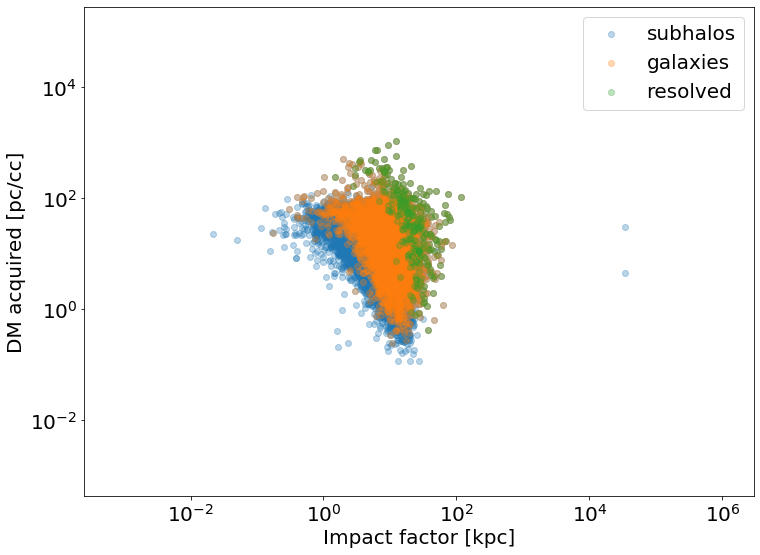

In [219]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)

ax.set_xlabel('Impact factor [kpc/h]',fontsize=20)
ax.set_ylabel('DM acquired [pc/cc/h]',fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(axis='both',which='major',labelsize=20)

ax.scatter(check_sh_IFs,
           check_sh_DMs,alpha=0.3,
           label='subhalos')

ax.scatter(check_gal_IFs,
           check_gal_DMs,alpha=0.3,
           label='galaxies')

ax.scatter(check_wrg_IFs,
           check_wrg_DMs,alpha=0.3,
           label='resolved')

plt.legend(fontsize=20)
plt.show()

[  10.           10.98541142   12.06792641   13.25711366   14.56348478
   15.9985872    17.57510625   19.30697729   21.20950888   23.29951811
   25.59547923   28.11768698   30.88843596   33.93221772   37.2759372
   40.94915062   44.98432669   49.41713361   54.28675439   59.63623317
   65.51285569   71.9685673    79.06043211   86.85113738   95.40954763
  104.81131342  115.13953993  126.48552169  138.94954944  152.64179672
  167.68329368  184.20699693  202.35896477  222.29964825  244.20530945
  268.26957953  294.70517026  323.74575428  355.64803062  390.69399371
  429.19342601  471.48663635  517.94746792  568.9866029   625.05519253
  686.648845    754.31200634  828.64277285  910.29817799 1000.        ]


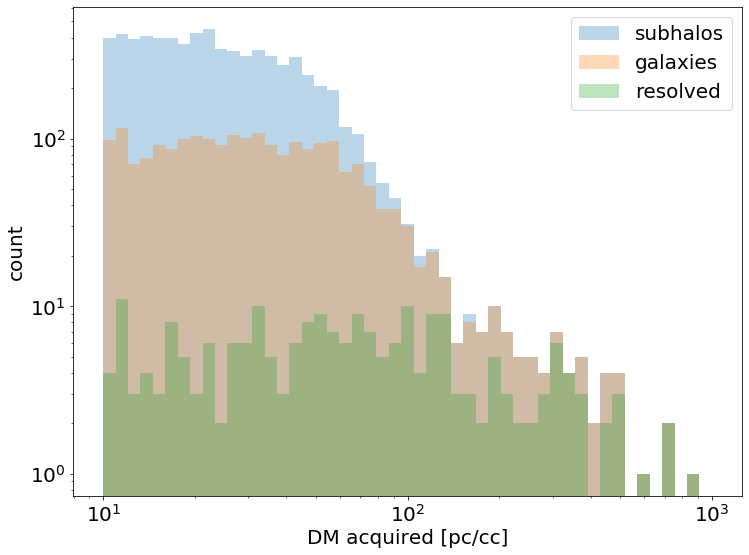

In [220]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)

bins=np.logspace(1,3)
print(bins)

ax.set_xlabel('DM acquired [pc/cc/h]',fontsize=20)
ax.set_ylabel('count',fontsize=20)

ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(axis='both',which='major',labelsize=20)

ax.hist(check_sh_DMs,bins=bins,alpha=0.3,label='subhalos')
ax.hist(check_gal_DMs,bins=bins,alpha=0.3,label='galaxies')
ax.hist(check_wrg_DMs,bins=bins,alpha=0.3,label='resolved')

plt.legend(fontsize=20)
plt.show()